In [96]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import ast

Base Utilizada: https://www.kaggle.com/chuckephron/leagueoflegends

Alunos:

Lucca Silva Medeiros - 2019054773
Gabriel Sacoman Teixeira - 

In [97]:
# Panda Configuration
pd.set_option('display.max_columns', None)

## Análise dos dados disponíveis

Vizualização de todas tabelas disponíveis no dataset

In [98]:
# _columns.csv
columns_data = pd.read_csv("archive/_columns.csv")
columns_data

ColumnName                                  ColumnDescription
0            Address        website address the data is scraped from \n
1             League    League or Tournament the match took place in \n
2               Year                    Year the match took place in \n
3             Season  Spring or Summer depending on which half of th...
4               Type  Season, Playoffs, Regional, or International m...
5        blueTeamTag   Blue Team's tag name (ex. Team SoloMid is TSM...
6            bResult   Result of the match for Blue Team - 1 is a wi...
7            rResult   Result of the match for Red Team - 1 is a win...
8         redTeamTag   Red Team's Tag Name (ex. Team SoloMid is TSM) \n
9         gamelength                          Game length in minutes \n
10          golddiff   Gold difference - computed Blue minus Red - b...
11          goldblue          Blue Team's total gold value by minute \n
12            bKills   List of Blue Team's kills - [Time in minutes,...
13           bTowers   List of minutes that Blue Team destroyed a to...
14           bInhibs   List of minutes that Blue Team destroyed an i...
15          bDragons   List of minutes that Blue Team killed a drago...
16           bBarons   List of minutes that Blue Team killed a baron...
17          bHeralds   List of minutes that Blue Team killed a rift ...
18           goldred           Red Team's total gold value by minute \n
19            rKills   List of Red Team's kills - [Time in minutes, ...
20           rTowers   List of minutes that Red Team destroyed a tow...
21           rInhibs   List of minutes that Red Team destroyed an in...
22          rDragons   List of minutes that Red Team killed a dragon...
23           rBarons   List of minutes that Red Team killed a baron ...
24          rHeralds   List of minutes that Red Team killed a rift h...
25           blueTop   Name of Blue Team's player in the top positio...
26      blueTopChamp   Name of Blue Team's champion in the top posit...
27       goldblueTop   Blue's Top position player's gold value by mi...
28        blueJungle   Name of Blue Team's player in the jungle posi...
29   blueJungleChamp   Name of Blue Team's champion in the jungle po...
30    goldblueJungle   Blue's Jungle position player's gold value by...
31        blueMiddle   Name of Blue Team's player in the middle posi...
32   blueMiddleChamp   Name of Blue Team's champion in the middle po...
33    goldblueMiddle   Blue's Middle position player's gold value by...
34           blueADC   Name of Blue Team's player in the ADC positio...
35      blueADCChamp   Name of Blue Team's champion in the ADC posit...
36       goldblueADC   Blue's ADC position player's gold value by mi...
37       blueSupport   Name of Blue Team's player in the support pos...
38  blueSupportChamp   Name of Blue's champion in the support positi...
39   goldblueSupport    Blue's Support player's gold value by minute \n
40          blueBans   List of champions Blue Team banned (in order) \n
41            redTop   Name of Red Team's player in the top position \n
42       redTopChamp   Name of Red Team's champion in the top positi...
43        goldredTop   Red's Top position player's gold value by min...
44         redJungle   Name of Red Team's player in the jungle posit...
45    redJungleChamp   Name of Red Team's champion in the jungle pos...
46     goldredJungle   Red's Jungle position player's gold value by ...
47         redMiddle   Name of Red Team's player in the middle posit...
48    redMiddleChamp   Name of Red Team's champion in the middle pos...
49     goldredMiddle   Red's Middle position player's gold value by ...
50            redADC   Name of Red Team's player in the ADC position \n
51       redADCChamp   Name of Red Team's champion in the ADC positi...
52        goldredADC   Red's ADC position player's gold value by min...
53   redSupportChamp   Name of Red Team's player in the support posi...
54        redSupport   Name of Red Team's champion

In [99]:
# LeagueofLegends.csv
lol_data = pd.read_csv("archive/LeagueofLegends.csv")
lol_data.head()

League  Year  Season    Type blueTeamTag  bResult  rResult redTeamTag  \
0  NALCS  2015  Spring  Season         TSM        1        0         C9   
1  NALCS  2015  Spring  Season         CST        0        1        DIG   
2  NALCS  2015  Spring  Season         WFX        1        0         GV   
3  NALCS  2015  Spring  Season         TIP        0        1         TL   
4  NALCS  2015  Spring  Season         CLG        1        0         T8   

   gamelength                                           golddiff  \
0          40  [0, 0, -14, -65, -268, -431, -488, -789, -494,...   
1          38  [0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...   
2          40  [0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...   
3          41  [0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...   
4          35  [40, 40, 44, -36, 113, 158, -121, -191, 23, 20...   

                                            goldblue  \
0  [2415, 2415, 2711, 3887, 5068, 6171, 7412, 866...   
1  [2415, 2415, 2705, 4108, 5511, 6797, 7637, 895...   
2  [2415, 2415, 2726, 3794, 4933, 6236, 8109, 965...   
3  [2415, 2415, 2705, 3847, 5398, 6473, 7720, 930...   
4  [2415, 2415, 2710, 3950, 5404, 6666, 7887, 913...   

                                              bKills  \
0  [[10.82, 'C9 Hai', 'TSM Bjergsen', [], 9229, 8...   
1  [[11.104, 'DIG Shiphtur', 'CST Jesiz', ['CST I...   
2  [[5.255, 'GV Keane', 'WFX Pobelter', ['WFX Sho...   
3  [[8.274, 'TL Quas', 'TIP Rhux', ['TIP Apollo']...   
4  [[11.438, 'T8 Dodo8', 'CLG Doublelift', ['CLG ...   

                                             bTowers  \
0  [[27.542, 'MID_LANE', 'BASE_TURRET'], [39.269,...   
1  [[23.239, 'BOT_LANE', 'OUTER_TURRET'], [33.018...   
2  [[15.045, 'BOT_LANE', 'OUTER_TURRET'], [39.566...   
3  [[19.941, 'BOT_LANE', 'OUTER_TURRET'], [38.77,...   
4  [[22.594, 'MID_LANE', 'OUTER_TURRET'], [34.213...   

                                             bInhibs  \
0       [[36.686, 'MID_LANE'], [29.274, 'MID_LANE']]   
1                                                 []   
2  [[37.511, 'TOP_LANE'], [37.38, 'BOT_LANE'], [3...   
3                                                 []   
4                             [[34.069, 'BOT_LANE']]   

                                            bDragons     bBarons bHeralds  \
0                                   [[37.267, None]]          []       []   
1   [[32.545, None], [26.177, None], [19.119, None]]  [[29.255]]       []   
2  [[24.577, None], [37.867, None], [30.87, None]...  [[35.144]]       []   
3                                                 []  [[37.513]]       []   
4                   [[14.589, None], [30.307, None]]  [[32.556]]       []   

                                             goldred  \
0  [2415, 2415, 2725, 3952, 5336, 6602, 7900, 945...   
1  [2415, 2415, 2731, 4126, 5364, 6560, 7789, 893...   
2  [2415, 2415, 2716, 3854, 4899, 6199, 7520, 859...   
3  [2415, 2415, 2720, 3822, 5170, 6479, 7963, 913...   
4  [2375, 2375, 2666, 3986, 5291, 6508, 8008, 932...   

                                              rKills  \
0  [[16.529, 'TSM Lustboy', 'C9 Balls', ['C9 Mete...   
1  [[12.387, 'CST Jesiz', 'DIG Gamsu', ['DIG Ship...   
2  [[8.449, 'WFX Altec', 'GV Cop', ['GV BunnyFuFu...   
3  [[7.768, 'TIP Rush', 'TL IWDominate', ['TL Fen...   
4  [[11.988, 'CLG Doublelift', 'T8 Porpoise8', ['...   

                                             rTowers                 rInhibs  \
0  [[39.23, 'TOP_LANE', 'INNER_TURRET'], [20.681,...                      []   
1  [[19.257, 'MID_LANE', 'OUTER_TURRET'], [15.206...  [[36.813, 'MID_LANE']]   
2  [[24.62, 'MID_LANE', 'OUTER_TURRET'], [30.493,...                      []   
3  [[36.384, 'MID_LANE', 'NEXUS_TURRET'], [31.665...  [[35.867, 'MID_LANE']]   
4  [[11.644, 'MID_LANE', 'OUTER_TURRET'], [12.438...                      []   

                                            rDragons     rBarons rHeralds  \
0    [[17.14, None], [30.934, None], [24.641, None]]  [[29.954]]       []   
1                     

In [100]:
# bans.csv

# Address - website address the data is scraped from
# Team - 'blueBans' or 'redBans'
# ban_1 ... ban_5 - banned champion

bans_data = pd.read_csv("archive/bans.csv")
bans_data.head()

Address      Team     ban_1  \
0  http://matchhistory.na.leagueoflegends.com/en/...  blueBans    Rumble   
1  http://matchhistory.na.leagueoflegends.com/en/...  blueBans  Kassadin   
2  http://matchhistory.na.leagueoflegends.com/en/...  blueBans  JarvanIV   
3  http://matchhistory.na.leagueoflegends.com/en/...  blueBans     Annie   
4  http://matchhistory.na.leagueoflegends.com/en/...  blueBans    Irelia   

       ban_2      ban_3 ban_4 ban_5  
0   Kassadin  Lissandra   NaN   NaN  
1      Sivir  Lissandra   NaN   NaN  
2  Lissandra   Kassadin   NaN   NaN  
3  Lissandra   Kassadin   NaN   NaN  
4   Pantheon   Kassadin   NaN   NaN

In [101]:
# gold.csv

# Address - website address the data is scraped from
# Type - ['golddiff' 'goldblue' 'goldred' 'goldblueTop' 'goldblueJungle'
# 'goldblueMiddle' 'goldblueADC' 'goldblueSupport' 'goldredTop'
# 'goldredJungle' 'goldredMiddle' 'goldredADC' 'goldredSupport']
# min_1 ... min_95 - game time register

gold_data = pd.read_csv("archive/gold.csv")
gold_data.head()

Address      Type  min_1  min_2  \
0  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0      0   
1  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0      0   
2  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0      0   
3  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0      0   
4  http://matchhistory.na.leagueoflegends.com/en/...  golddiff     40     40   

   min_3  min_4  min_5  min_6  min_7  min_8  min_9  min_10  min_11  min_12  \
0    -14    -65   -268   -431   -488   -789   -494    -625   -1044    -313   
1    -26    -18    147    237   -152     18     88    -242     102     117   
2     10    -60     34     37    589   1064   1258     913    1233    1597   
3    -15     25    228     -6   -243    175   -346      16    -258     -57   
4     44    -36    113    158   -121   -191     23     205     156     272   

   min_13  min_14  min_15  min_16  min_17  min_18  min_19  min_20  min_21  \
0    -760    -697    -790    -611     240   845.0   797.0  1422.0   987.0   
1     802    1420    1394    1301    1489  1563.0  1368.0  1105.0   205.0   
2    1575    3046    2922    3074    3626  3466.0  5634.0  5293.0  4597.0   
3    -190    -111    -335      -8     324   428.0  -124.0   768.0  2712.0   
4    -271    -896    -574     177    -425  -730.0  -318.0   478.0   926.0   

   min_22  min_23  min_24  min_25  min_26  min_27  min_28  min_29  min_30  \
0   169.0   432.0   491.0  1205.0  1527.0  1647.0  1847.0  3750.0  4719.0   
1   192.0   587.0   377.0   667.0   415.0  1876.0  1244.0  2130.0  2431.0   
2  4360.0  4616.0  4489.0  4880.0  5865.0  6993.0  7049.0  7029.0  7047.0   
3  1813.0   198.0  1242.0  1245.0  1278.0  1240.0  -664.0 -1195.0 -1157.0   
4   761.0  -286.0   473.0   490.0  1265.0  2526.0  3890.0  4319.0  5121.0   

   min_31  min_32  min_33  min_34   min_35  min_36   min_37   min_38   min_39  \
0  3561.0  3367.0  2886.0  2906.0   4411.0  4473.0   4639.0   4762.0   4686.0   
1   680.0  1520.0   949.0  1894.0   2644.0  3394.0   3726.0   1165.0      NaN   
2  7160.0  7081.0  7582.0  9917.0  10337.0  9823.0  12307.0  13201.0  13924.0   
3 -2161.0 -2504.0 -3873.0 -3688.0  -3801.0 -3668.0  -3612.0  -5071.0  -2825.0   
4  5140.0  5141.0  6866.0  9517.0  11322.0     NaN      NaN      NaN      NaN   

    min_40  min_41  min_42  min_43  min_44  min_45  min_46  min_47  min_48  \
0   6057.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2  13915.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3  -1464.0 -4507.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   min_49  min_50  min_51  min_52  min_53  min_54  min_55  min_56  min_57  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   min_58  min_59  min_60  min_61  min_62  min_63  min_64  min_65  min_66  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   min_67  min_68  min_69  min_70  min_71  min_72  min_73  min_74  min_75  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     Na

In [102]:
# kills.csv
kills_data = pd.read_csv("archive/kills.csv")
kills_data.head()

Address    Team    Time  \
0  http://matchhistory.na.leagueoflegends.com/en/...  bKills  10.820   
1  http://matchhistory.na.leagueoflegends.com/en/...  bKills  16.286   
2  http://matchhistory.na.leagueoflegends.com/en/...  bKills  18.733   
3  http://matchhistory.na.leagueoflegends.com/en/...  bKills  18.880   
4  http://matchhistory.na.leagueoflegends.com/en/...  bKills  27.005   

           Victim          Killer      Assist_1        Assist_2  \
0          C9 Hai    TSM Bjergsen           NaN             NaN   
1  C9 LemonNation  TSM WildTurtle  TSM Santorin    TSM Bjergsen   
2          C9 Hai    TSM Bjergsen  TSM Santorin  TSM WildTurtle   
3       C9 Meteos       TSM Dyrus  TSM Santorin    TSM Bjergsen   
4        C9 Balls    TSM Bjergsen     TSM Dyrus    TSM Santorin   

         Assist_3     Assist_4  x_pos y_pos  
0             NaN          NaN   9229  8469  
1     TSM Lustboy          NaN  13908  5960  
2     TSM Lustboy          NaN   8281  7889  
3  TSM WildTurtle  TSM Lustboy   8522  8895  
4  TSM WildTurtle  TSM Lustboy   8902  7643

In [103]:
# matchinfo.csv
matchinfo_data = pd.read_csv("archive/matchinfo.csv")
matchinfo_data.head()

League  Year  Season    Type blueTeamTag  bResult  rResult redTeamTag  \
0  NALCS  2015  Spring  Season         TSM        1        0         C9   
1  NALCS  2015  Spring  Season         CST        0        1        DIG   
2  NALCS  2015  Spring  Season         WFX        1        0         GV   
3  NALCS  2015  Spring  Season         TIP        0        1         TL   
4  NALCS  2015  Spring  Season         CLG        1        0         T8   

   gamelength  blueTop blueTopChamp  blueJungle blueJungleChamp   blueMiddle  \
0          40    Dyrus       Irelia    Santorin          RekSai     Bjergsen   
1          38     Cris         Gnar     Impaler          Rengar        Jesiz   
2          40  Flaresz     Renekton  ShorterACE          Rengar     Pobelter   
3          41     Rhux       Irelia        Rush        JarvanIV  XiaoWeiXiao   
4          35    Benny         Gnar     Xmithie        JarvanIV         Link   

  blueMiddleChamp     blueADC blueADCChamp blueSupport blueSupportChamp  \
0            Ahri  WildTurtle         Jinx     Lustboy            Janna   
1            Ahri        Mash      Caitlyn       Sheep            Leona   
2            Fizz       Altec        Sivir       Gleeb            Annie   
3         Leblanc      Apollo        Sivir      Adrian           Thresh   
4       Lissandra  Doublelift     Tristana    aphromoo            Janna   

        redTop redTopChamp     redJungle redJungleChamp redMiddle  \
0        Balls        Gnar        Meteos          Elise       Hai   
1        Gamsu      Irelia       Crumbzz       JarvanIV  Shiphtur   
2     Hauntzer        Sion  Saintvicious         LeeSin     Keane   
3         Quas        Gnar    IWDominate           Nunu     Fenix   
4  CaliTrlolz8        Sion     Porpoise8         RekSai  Slooshi8   

  redMiddleChamp        redADC redADCChamp   redSupport redSupportChamp  \
0           Fizz        Sneaky       Sivir  LemonNation          Thresh   
1           Azir        CoreJJ       Corki      KiWiKiD           Annie   
2           Azir           Cop       Corki   BunnyFuFuu           Janna   
3           Lulu         KEITH      KogMaw      Xpecial           Janna   
4           Lulu  Maplestreet8       Corki        Dodo8           Annie   

                                             Address  
0  http://matchhistory.na.leagueoflegends.com/en/...  
1  http://matchhistory.na.leagueoflegends.com/en/...  
2  http://matchhistory.na.leagueoflegends.com/en/...  
3  http://matchhistory.na.leagueoflegends.com/en/...  
4  http://matchhistory.na.leagueoflegends.com/en/...

In [104]:
# monsters.csv
monsters_data = pd.read_csv("archive/monsters.csv")
monsters_data.head()

Address      Team    Time    Type
0  http://matchhistory.na.leagueoflegends.com/en/...  bDragons  37.267  DRAGON
1  http://matchhistory.na.leagueoflegends.com/en/...  bDragons  32.545  DRAGON
2  http://matchhistory.na.leagueoflegends.com/en/...  bDragons  26.177  DRAGON
3  http://matchhistory.na.leagueoflegends.com/en/...  bDragons  19.119  DRAGON
4  http://matchhistory.na.leagueoflegends.com/en/...  bDragons  24.577  DRAGON

In [105]:
# structures.csv
structures_data = pd.read_csv("archive/structures.csv")
structures_data.head()

Address     Team    Time  \
0  http://matchhistory.na.leagueoflegends.com/en/...  bTowers  27.542   
1  http://matchhistory.na.leagueoflegends.com/en/...  bTowers  39.269   
2  http://matchhistory.na.leagueoflegends.com/en/...  bTowers  33.583   
3  http://matchhistory.na.leagueoflegends.com/en/...  bTowers  23.038   
4  http://matchhistory.na.leagueoflegends.com/en/...  bTowers  16.556   

       Lane          Type  
0  MID_LANE   BASE_TURRET  
1  MID_LANE  NEXUS_TURRET  
2  BOT_LANE  INNER_TURRET  
3  TOP_LANE  INNER_TURRET  
4  BOT_LANE  OUTER_TURRET

## Vizualizações genéricas de dados interessantes

In [106]:
# Anos disponiveis
years = lol_data['Year'].unique()
ligas = lol_data['League'].unique()

years.sort()
print(years)
print(ligas)

[2014 2015 2016 2017 2018]
['NALCS' 'EULCS' 'LCK' 'LMS' 'CBLoL' 'TCL' 'OPL' 'CLS' 'LLN' 'LJL' 'LCL'
 'WC' 'MSI' 'IEM' 'RR']


### Anos cobertos 
2014, 2015, 2016, 2017 e 2018

### Ligas Profissionais disponíveis
1. **NALCS (North American League of Legends Championship Series)**: Esta é a liga profissional para o jogo na América do Norte.

2. **EULCS (European League of Legends Championship Series)**: Esta liga representa a região da Europa.

3. **LCK (League of Legends Champions Korea)**: Como o nome sugere, esta é a liga de League of Legends da Coreia do Sul.

4. **LMS (League of Legends Master Series)**: Esta liga incluía equipes de Taiwan, Hong Kong e Macau. Contudo, em 2020, a LMS foi combinada com a Southeast Asia Tour (SEAT) para formar a Pacific Championship Series (PCS).

5. **CBLoL (Campeonato Brasileiro de League of Legends)**: Esta é a principal liga de League of Legends no Brasil.

6. **TCL (Turkish Championship League)**: Esta liga é a competição profissional de League of Legends na Turquia.

7. **OPL (Oceanic Pro League)**: A OPL representava a região da Oceania no cenário profissional de LoL, incluindo países como Austrália e Nova Zelândia. Porém, em 2020, a Riot Games encerrou a OPL.

8. **CLS (Copa Latinoamérica Sur)**: Esta era a liga principal para a região da América Latina Sul. Em 2019, a Riot Games combinou as regiões norte e sul da América Latina em uma única liga, a Liga Latinoamérica (LLA).

9. **LLN (Liga Latinoamérica Norte)**: A LLN era a principal liga da América Latina Norte. Assim como a CLS, foi combinada para formar a Liga Latinoamérica (LLA) em 2019.

10. **LJL (League of Legends Japan League)**: Esta é a liga profissional do Japão.

11. **LCL (League of Legends Continental League)**: Esta é a liga principal da Comunidade dos Estados Independentes, uma região que inclui a Rússia e outros países próximos.

12. **WC (World Championship)**: Este não é uma liga, mas um torneio internacional que acontece anualmente, no qual as equipes de todas as ligas competem para se tornar a campeã mundial de League of Legends.

13. **MSI (Mid-Season Invitational)**: Este é outro torneio internacional que ocorre anualmente no meio da temporada. Equipes de todas as regiões competem neste evento.

14. **IEM (Intel Extreme Masters)**: Este é uma série de torneios internacionais organizados pela ESL, que não são exclusivos para League of Legends e incluem vários outros e-sports.

15. **RR (Rift Rivals)**: Este era um conjunto de torneios internacionais de LoL que ocorriam anualmente, colocando ligas rivais umas contra as outras. Em 2020, a Riot anunciou que não continuaria com os eventos de Rift Rivals.

### Quais foram os campeões de cada line mais pickados de cada ano?
League of Legends, também conhecido como LoL, é um jogo eletrônico de estratégia em tempo real, desenvolvido e publicado pela Riot Games para Microsoft Windows e Mac OS X. É inspirado no modo de jogo Defense of the Ancients, de Warcraft III. Lançado oficialmente em 2009, rapidamente ganhou popularidade em todo o mundo.

O jogo pertence ao gênero MOBA, que significa Multiplayer Online Battle Arena. Nesse tipo de jogo, duas equipes de jogadores competem em uma arena virtual com o objetivo de destruir a estrutura principal da equipe adversária. No caso do League of Legends, as equipes são compostas por cinco jogadores, cada um controlando um personagem, conhecido como "campeão". Cada campeão tem habilidades únicas e pode ser personalizado através da compra de itens e do ganho de experiência durante o jogo.

Por isso é importânte responder aa pergunta "Quais foram os campeões de cada linha mais escolhidos de cada ano?", uma vez que para os jogadores, saber quais campeões são mais escolhidos pode ajudar a entender quais personagens são considerados mais fortes ou mais úteis em cada posição, o que pode influenciar suas próprias escolhas de jogo. Para a comunidade de esports, as estatísticas de escolha de campeões podem indicar quais estratégias são mais populares e bem-sucedidas em um determinado momento, o que pode influenciar o meta do jogo e as decisões de treinamento das equipes profissionais. Para a Riot Games, as estatísticas de escolha de campeões podem ajudar a identificar quais personagens são mais amados pelos jogadores, quais são potencialmente superpotentes e podem necessitar de ajustes de balanceamento, e onde novos campeões poderiam ser introduzidos para diversificar o jogo.

In [107]:
columns_to_filter = ['League', 'Year',
                     'blueMiddleChamp', 'blueADCChamp', 'blueSupportChamp', 'blueTopChamp', 'blueJungleChamp',
                     'redMiddleChamp',  'redADCChamp',  'redSupportChamp',  'redTopChamp',  'redJungleChamp',
                     'Address']

champions_df = lol_data[columns_to_filter]

champions_df.head()

League  Year blueMiddleChamp blueADCChamp blueSupportChamp blueTopChamp  \
0  NALCS  2015            Ahri         Jinx            Janna       Irelia   
1  NALCS  2015            Ahri      Caitlyn            Leona         Gnar   
2  NALCS  2015            Fizz        Sivir            Annie     Renekton   
3  NALCS  2015         Leblanc        Sivir           Thresh       Irelia   
4  NALCS  2015       Lissandra     Tristana            Janna         Gnar   

  blueJungleChamp redMiddleChamp redADCChamp redSupportChamp redTopChamp  \
0          RekSai           Fizz       Sivir          Thresh        Gnar   
1          Rengar           Azir       Corki           Annie      Irelia   
2          Rengar           Azir       Corki           Janna        Sion   
3        JarvanIV           Lulu      KogMaw           Janna        Gnar   
4        JarvanIV           Lulu       Corki           Annie        Sion   

  redJungleChamp                                            Address  
0          Elise  http://matchhistory.na.leagueoflegends.com/en/...  
1       JarvanIV  http://matchhistory.na.leagueoflegends.com/en/...  
2         LeeSin  http://matchhistory.na.leagueoflegends.com/en/...  
3           Nunu  http://matchhistory.na.leagueoflegends.com/en/...  
4         RekSai  http://matchhistory.na.leagueoflegends.com/en/...

In [108]:
years = [2014,2015,2016,2017,2018]

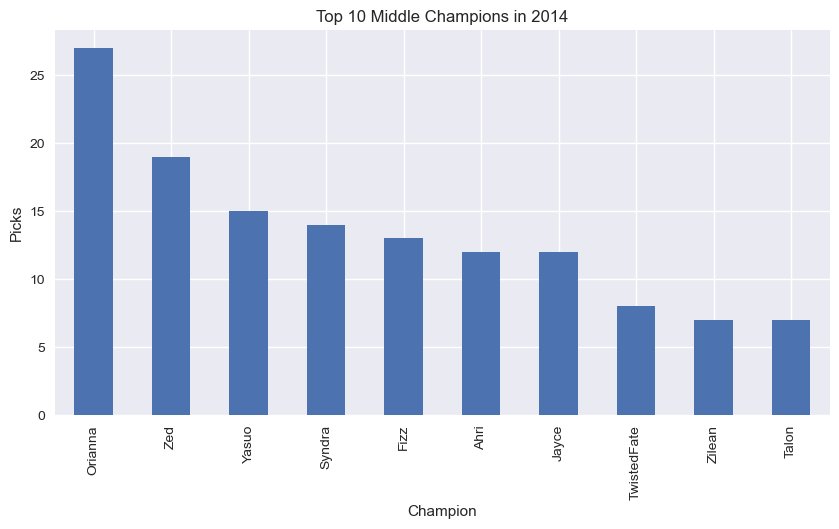

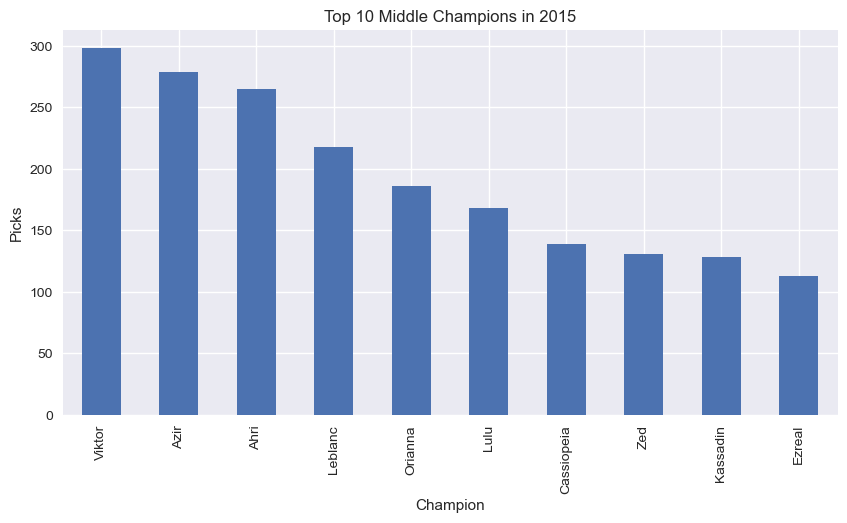

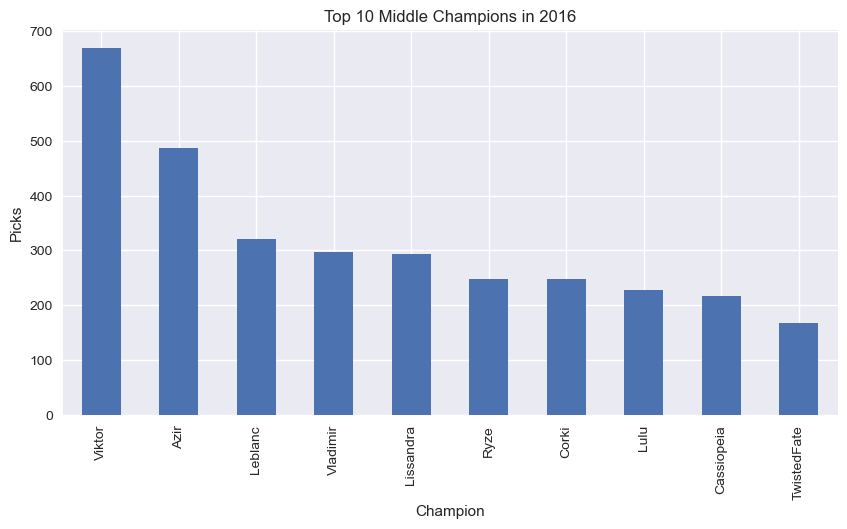

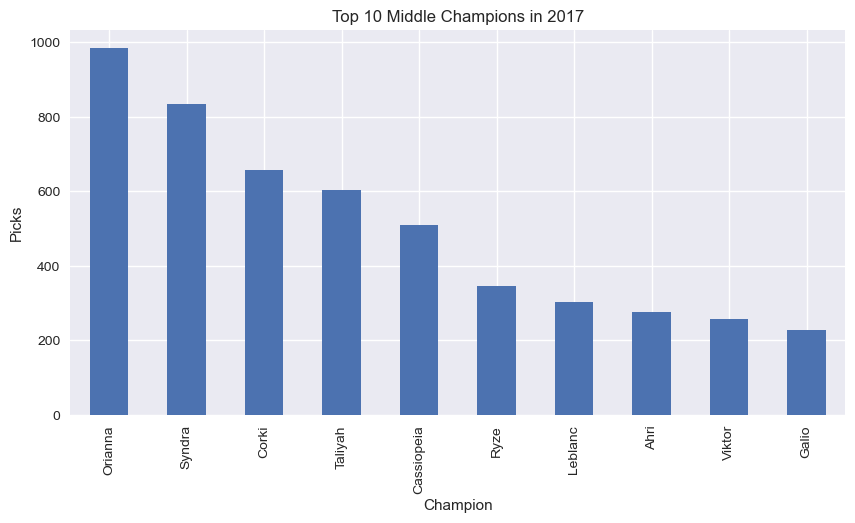

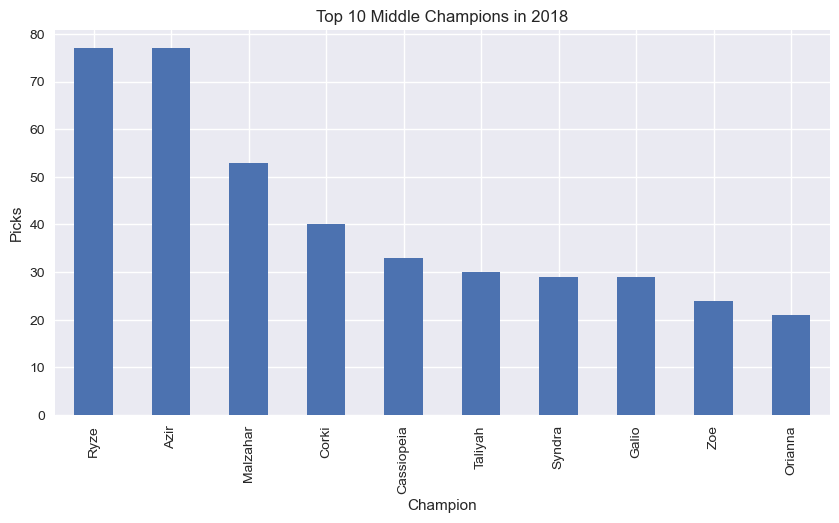

In [109]:
role = 'Middle'

blue_role = 'blue' + role + 'Champ'
red_role = 'red' + role + 'Champ'

for year in years:
    # Get data for the chosen year and role
    data = pd.concat([champions_df[champions_df['Year'] == year][blue_role], 
                      champions_df[champions_df['Year'] == year][red_role]])

    # Get the top 10 champions
    top_champions = data.value_counts().nlargest(10)

    # Plot histogram
    top_champions.plot(kind='bar', figsize=(10,5))
    plt.title(f'Top 10 {role} Champions in {year}')
    plt.xlabel('Champion')
    plt.ylabel('Picks')
    plt.show()
    

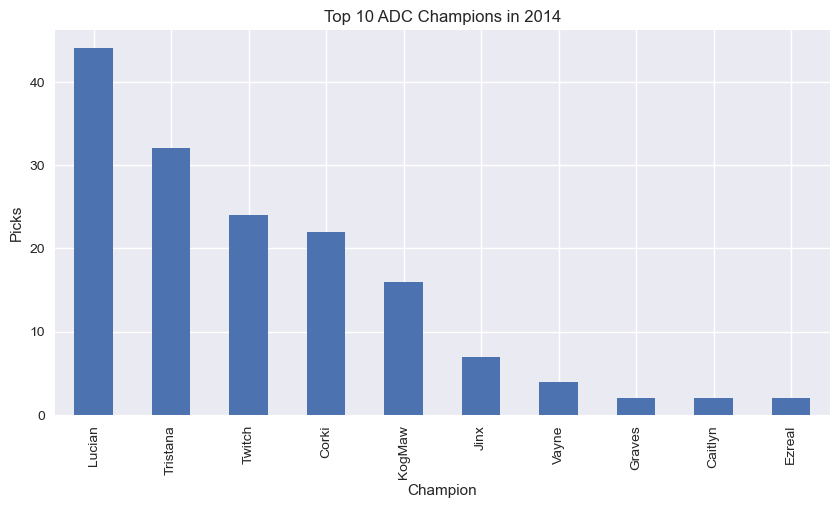

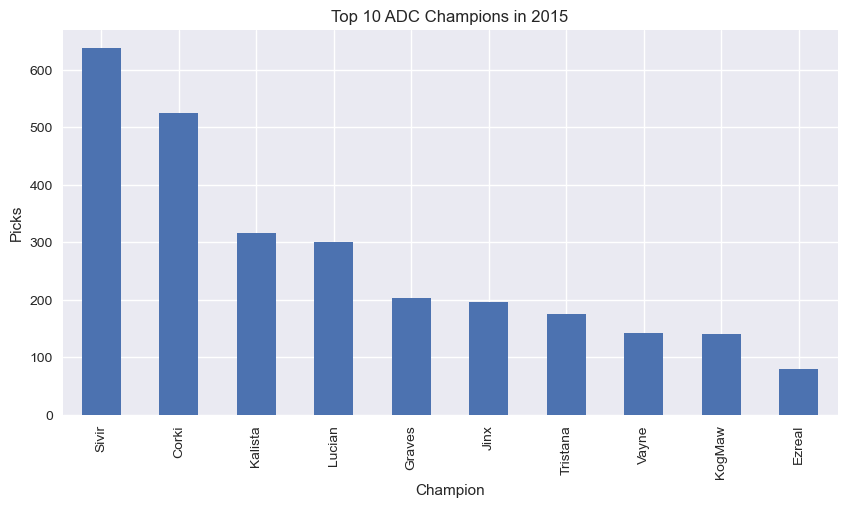

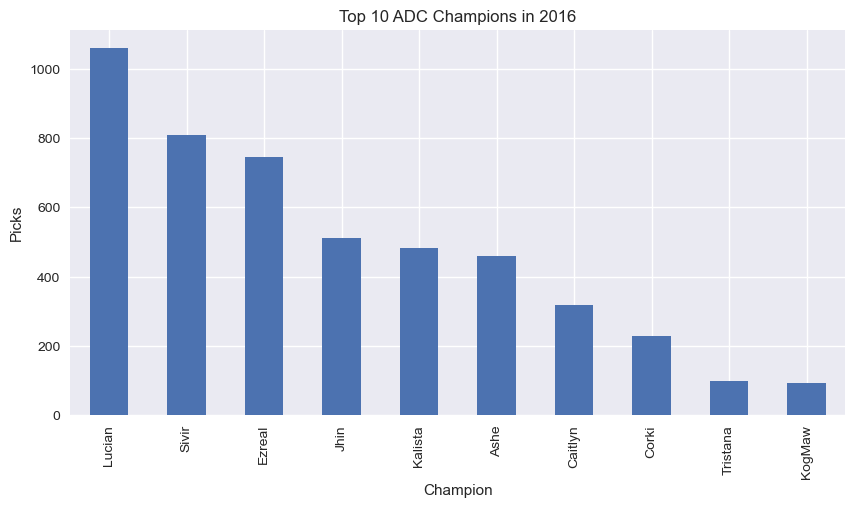

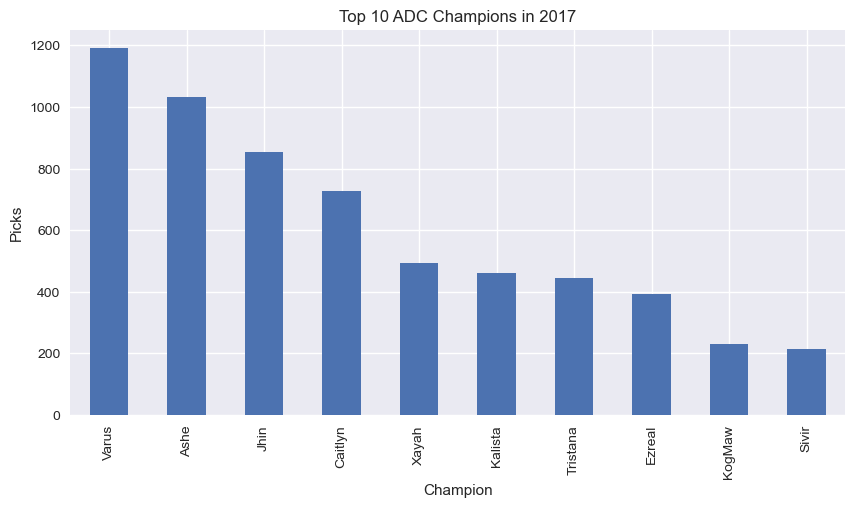

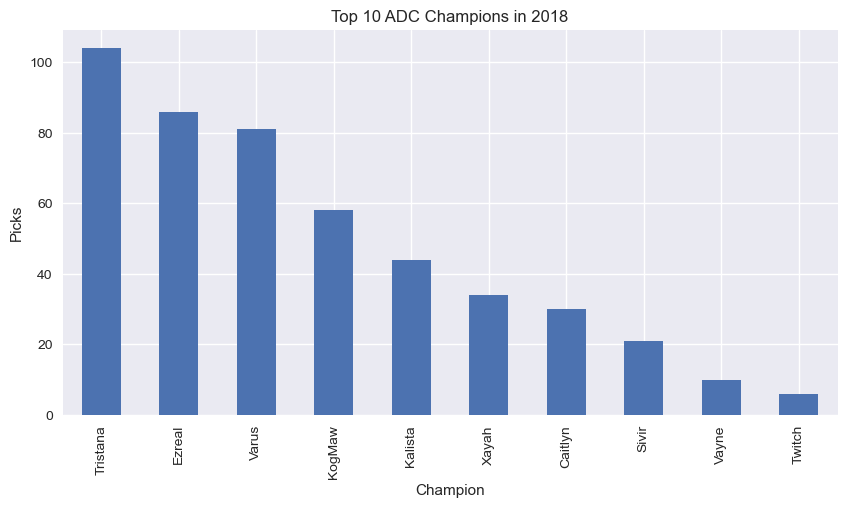

In [110]:
role = 'ADC'

blue_role = 'blue' + role + 'Champ'
red_role = 'red' + role + 'Champ'

for year in years:
    # Get data for the chosen year and role
    data = pd.concat([champions_df[champions_df['Year'] == year][blue_role], 
                      champions_df[champions_df['Year'] == year][red_role]])

    # Get the top 10 champions
    top_champions = data.value_counts().nlargest(10)

    # Plot histogram
    top_champions.plot(kind='bar', figsize=(10,5))
    plt.title(f'Top 10 {role} Champions in {year}')
    plt.xlabel('Champion')
    plt.ylabel('Picks')
    plt.show()

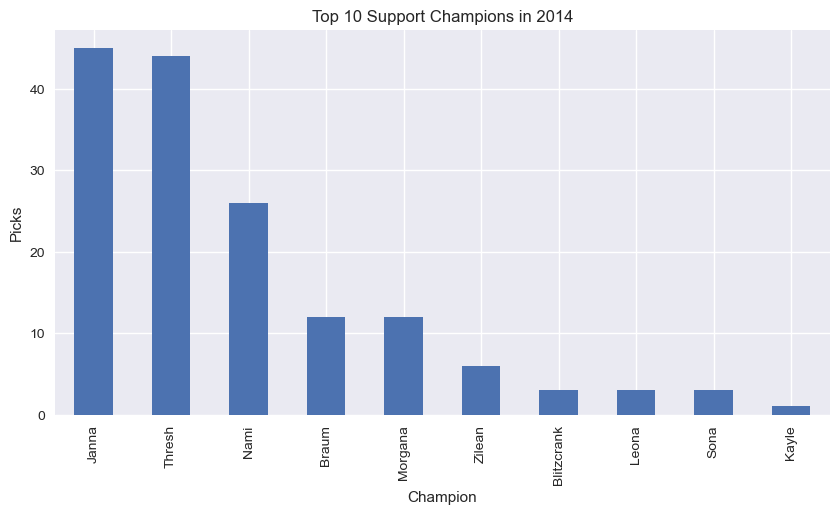

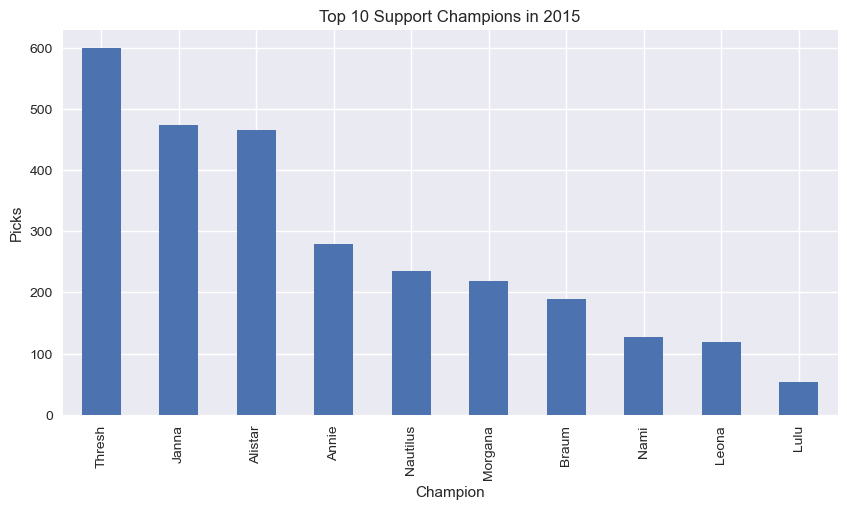

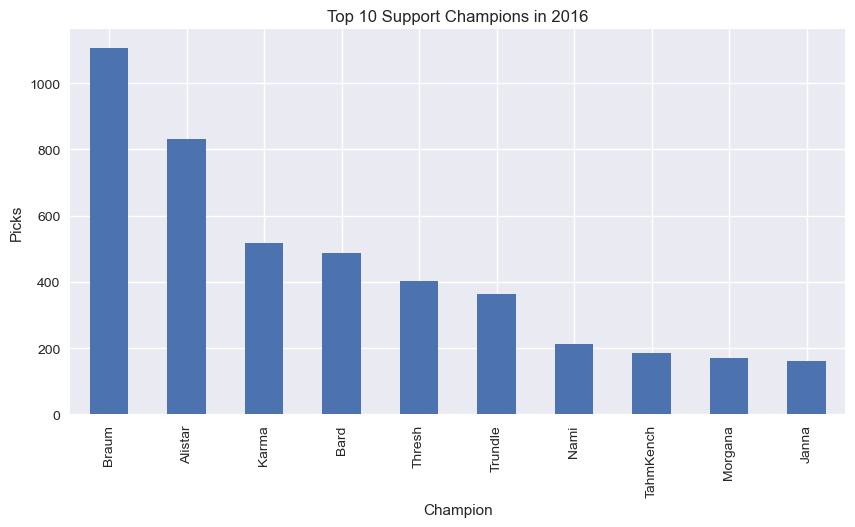

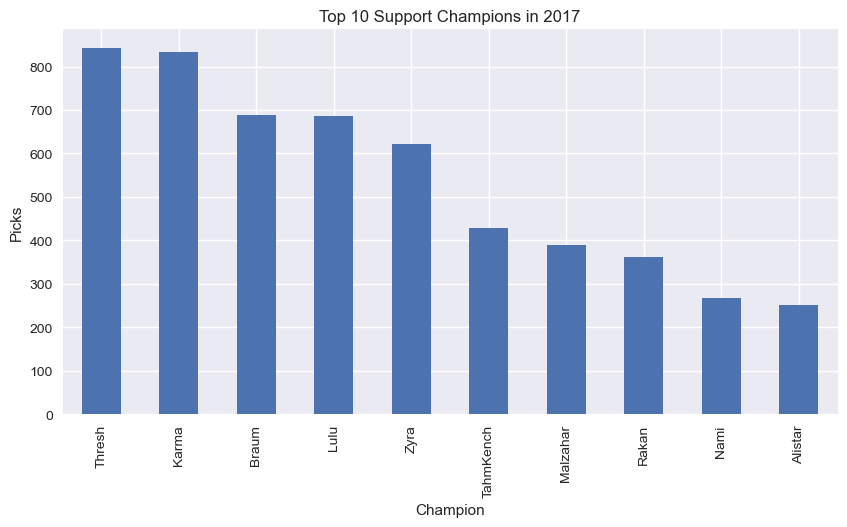

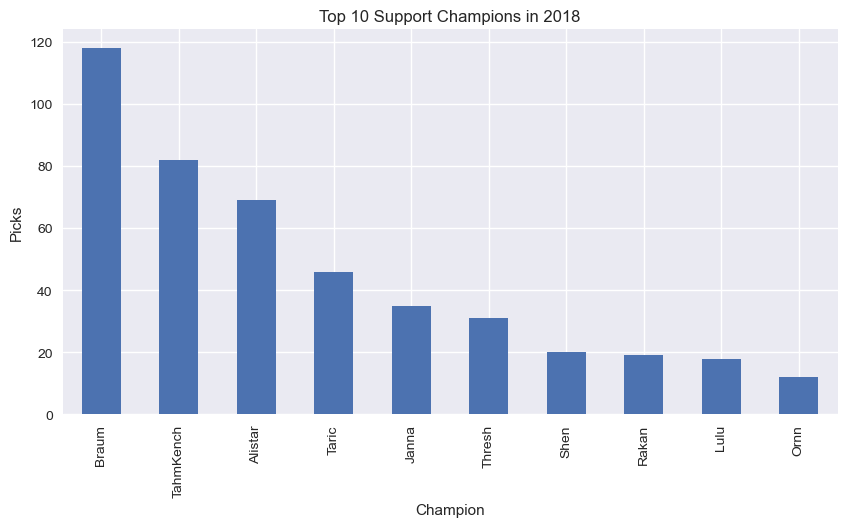

In [111]:
role = 'Support'

blue_role = 'blue' + role + 'Champ'
red_role = 'red' + role + 'Champ'

for year in years:
    # Get data for the chosen year and role
    data = pd.concat([champions_df[champions_df['Year'] == year][blue_role], 
                      champions_df[champions_df['Year'] == year][red_role]])

    # Get the top 10 champions
    top_champions = data.value_counts().nlargest(10)

    # Plot histogram
    top_champions.plot(kind='bar', figsize=(10,5))
    plt.title(f'Top 10 {role} Champions in {year}')
    plt.xlabel('Champion')
    plt.ylabel('Picks')
    plt.show()

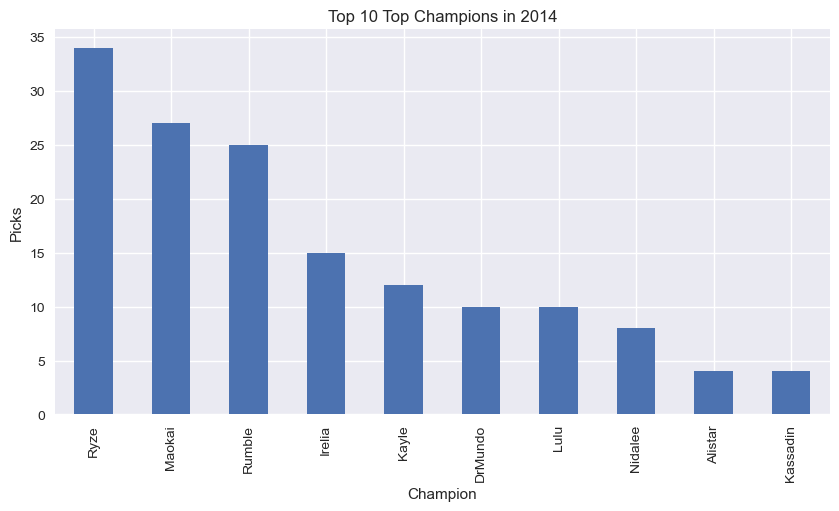

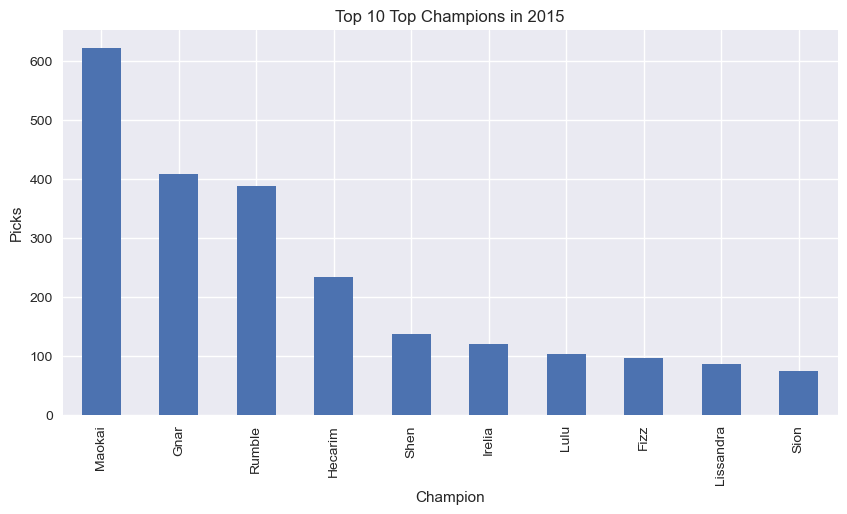

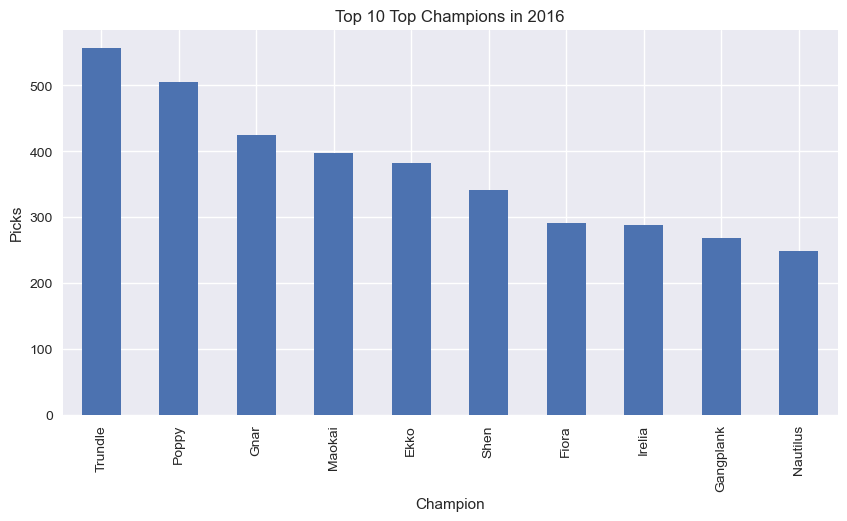

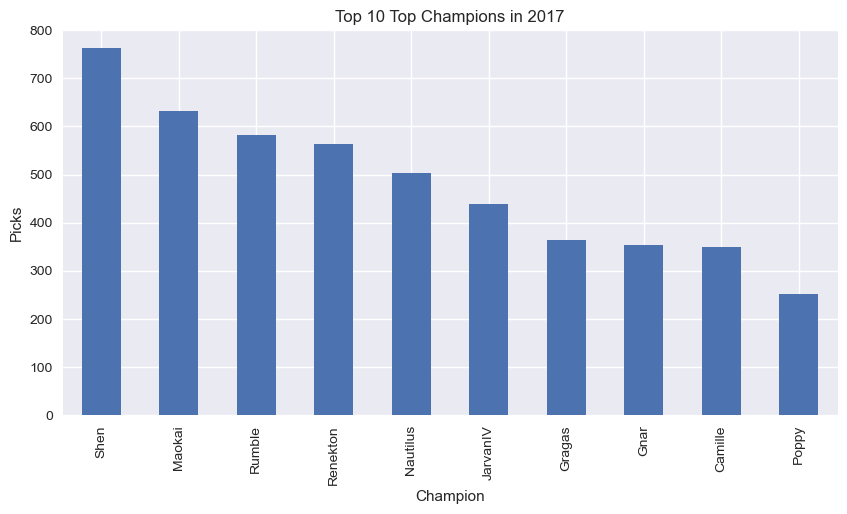

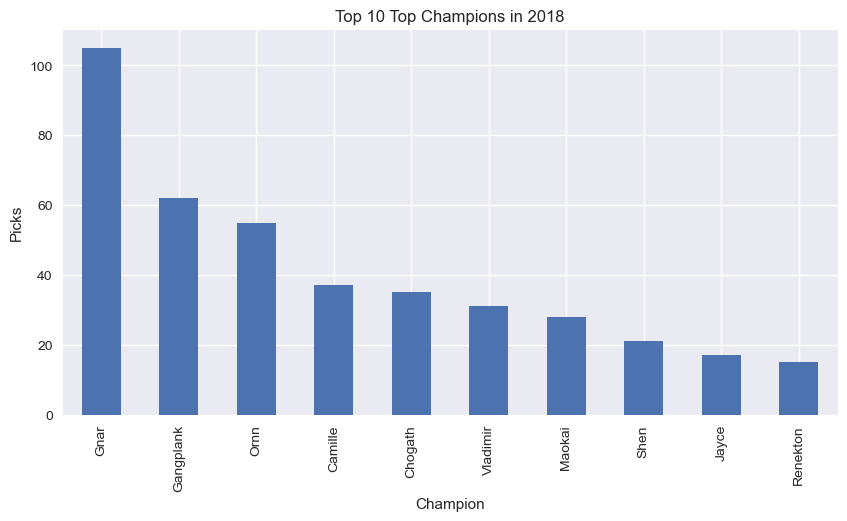

In [112]:
role = 'Top'

blue_role = 'blue' + role + 'Champ'
red_role = 'red' + role + 'Champ'

for year in years:
    data = pd.concat([champions_df[champions_df['Year'] == year][blue_role], 
                      champions_df[champions_df['Year'] == year][red_role]])

    top_champions = data.value_counts().nlargest(10)

    top_champions.plot(kind='bar', figsize=(10,5))
    plt.title(f'Top 10 {role} Champions in {year}')
    plt.xlabel('Champion')
    plt.ylabel('Picks')
    plt.show()

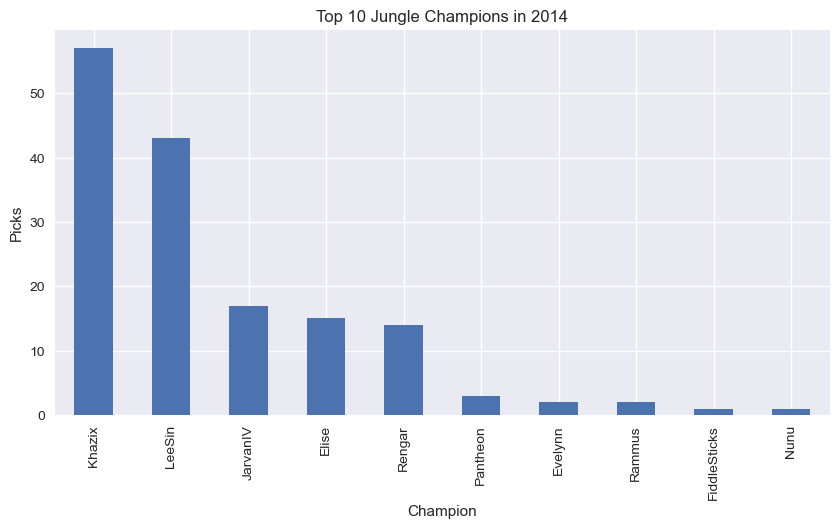

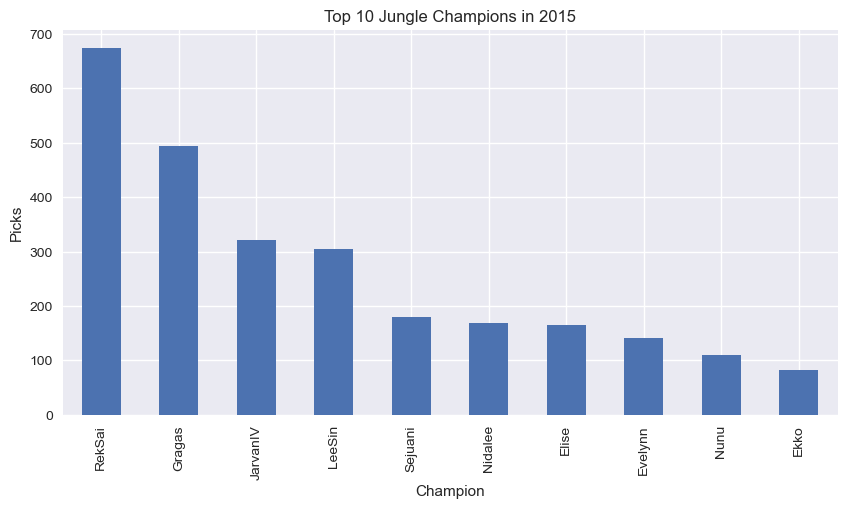

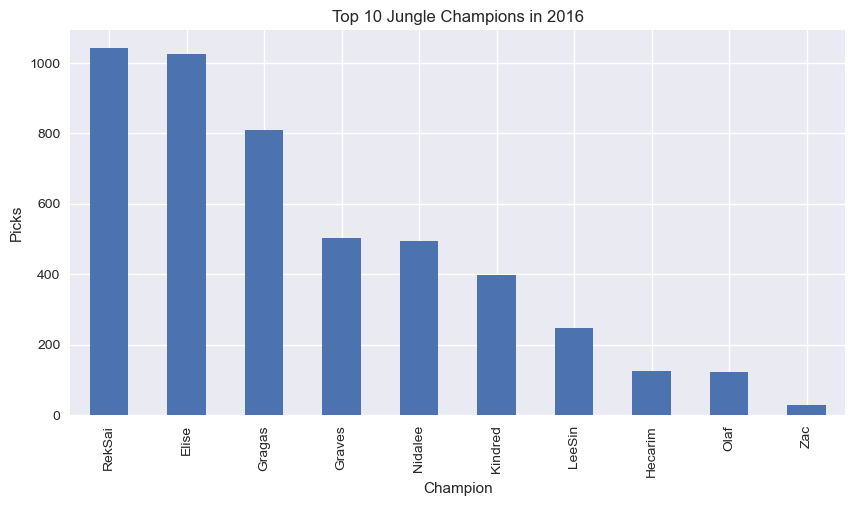

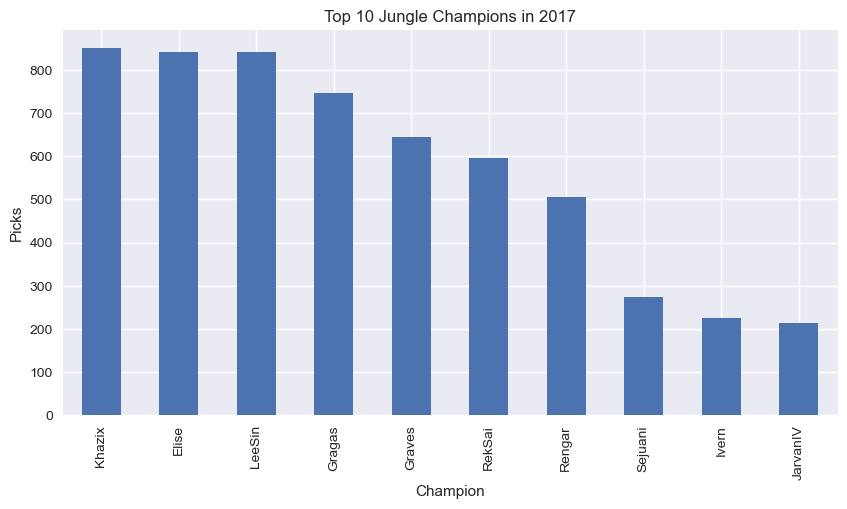

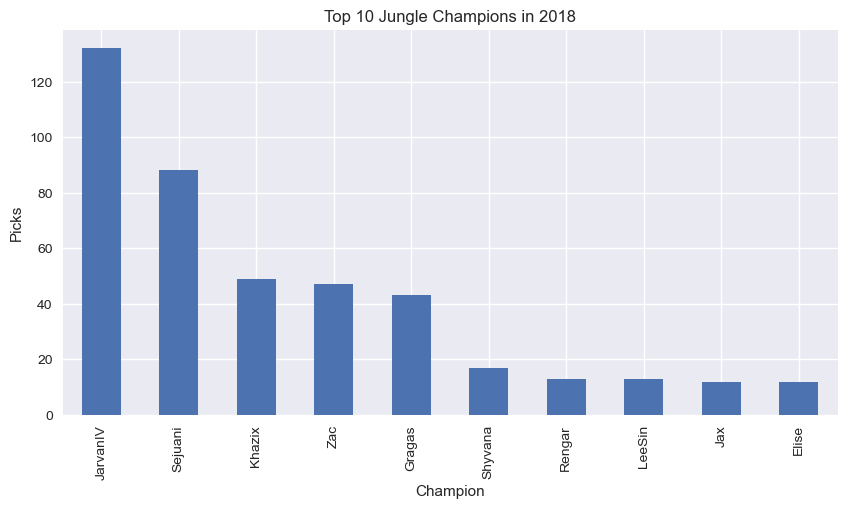

In [113]:
role = 'Jungle'

blue_role = 'blue' + role + 'Champ'
red_role = 'red' + role + 'Champ'

for year in years:
    data = pd.concat([champions_df[champions_df['Year'] == year][blue_role], 
                      champions_df[champions_df['Year'] == year][red_role]])

    top_champions = data.value_counts().nlargest(10)

    top_champions.plot(kind='bar', figsize=(10,5))
    plt.title(f'Top 10 {role} Champions in {year}')
    plt.xlabel('Champion')
    plt.ylabel('Picks')
    plt.show()

## Hipotese 1: O League Of Legends vem se tornando um jogo cada vez mais acelerado.

Como alguém que joga League of Legends desde 2015, observei uma evolução notável no ritmo e na estrutura do jogo. A Riot Games, a empresa por trás do jogo, parece estar constantemente à procura de maneiras de otimizar a jogabilidade e mantê-la fresca para os jogadores. A impressão que eu tenho é que, com o passar dos anos, essas mudanças têm tornado o jogo cada vez mais rápido.

Isso pode ser visto de várias maneiras. Primeiro, houve mudanças no mapa do jogo - o Summoner's Rift - onde alterações nos monstros da selva, nos objetivos neutros e até mesmo na paisagem parecem direcionar os jogadores a um jogo mais agressivo e orientado para a ação. A introdução de objetivos como o Rift Herald, por exemplo, oferece recompensas poderosas que podem ajudar uma equipe a pressionar suas vantagens de maneira mais assertiva.

Em segundo lugar, a Riot Games tem feito ajustes constantes nos campeões, nas habilidades e nos itens disponíveis no jogo. Muitas dessas mudanças parecem favorecer um estilo de jogo mais agressivo e ofensivo. Novos campeões são frequentemente lançados com kits de habilidades que permitem jogadas de alto impacto e grande mobilidade, e as alterações de balanceamento tendem a favorecer a agressão e o confronto direto.

Além disso, as alterações nas estruturas de ligas e recompensas competitivas incentivam os jogadores a buscarem vitórias mais rápidas, em vez de partidas prolongadas. O sistema de escalada de classificação também passou por reformulações ao longo dos anos, muitas das quais parecem favorecer jogos mais rápidos e decisivos.

No geral, parece que a Riot Games está direcionando League of Legends para um ritmo de jogo mais acelerado. Enquanto alguns jogadores apreciam essa mudança, outros podem preferir a estratégia e o ritmo mais medidos das versões anteriores do jogo. Isso é parte da natureza dinâmica de um jogo online em constante evolução. Cada mudança traz novos desafios e oportunidades, e cabe a cada jogador adaptar-se para continuar a desfrutar do jogo.

Logo, vamos analisar os principais aspectos e estudar sobre essa hipótese

### Analisando o tempo da partida
Somente analisando o tempo médio e a mediana das partidas não é suficiente para concluir a hipótese de que o League of Legends está se tornando mais ágil ou rápido. A duração média e a mediana das partidas, pelo menos entre os anos de 2014 e 2018, variaram, mas não mostraram uma tendência clara e consistente de diminuição ao longo do tempo.

Por exemplo, a duração média das partidas aumentou de 36,65 minutos em 2014 para 38,33 minutos em 2015, depois caiu para 37,04 minutos em 2016, novamente caiu para 36,36 minutos em 2017, e finalmente aumentou para 37,64 minutos em 2018. Similarmente, a mediana das durações das partidas não mostrou uma diminuição consistente ao longo do tempo.

In [114]:
mean_game_length_by_year = lol_data.groupby('Year')['gamelength'].mean()
print(mean_game_length_by_year)

Year
2014    36.653846
2015    38.331551
2016    37.040096
2017    36.358502
2018    37.643154
Name: gamelength, dtype: float64


In [115]:
median_game_lenght_by_year = lol_data.groupby('Year')['gamelength'].median()
print(median_game_lenght_by_year)

Year
2014    36.0
2015    38.0
2016    36.0
2017    35.0
2018    36.0
Name: gamelength, dtype: float64


### Histogramas do tempo de cada partida por anos
Os histogramas também mostram que o o tempo médio das partidas se manteve com um comportamento muito proximo em todos os anos, com leves resalvas nos anos finais onde parece que partidas abaixo dos 30 minutos foram mais comuns que nos demais anos

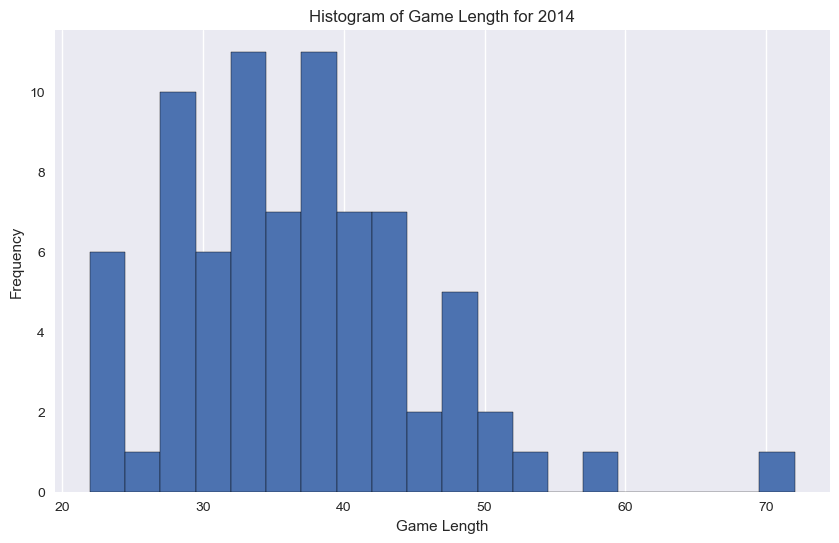

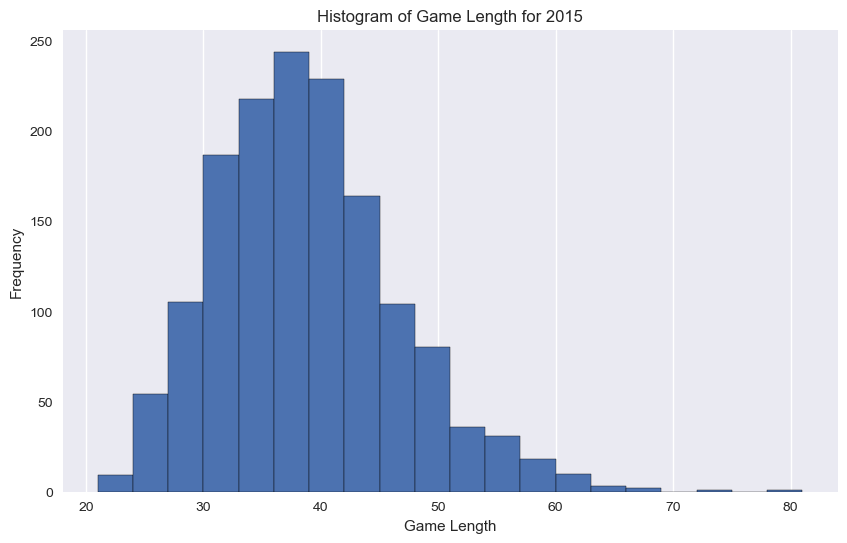

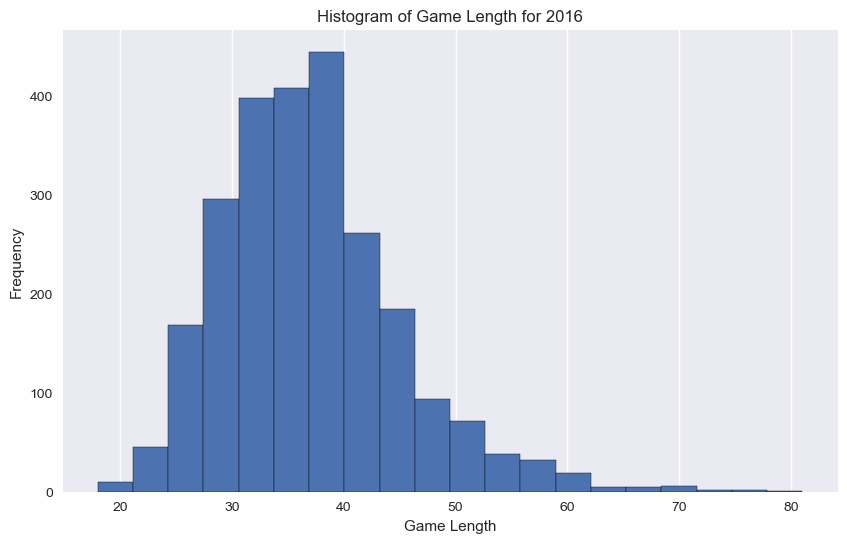

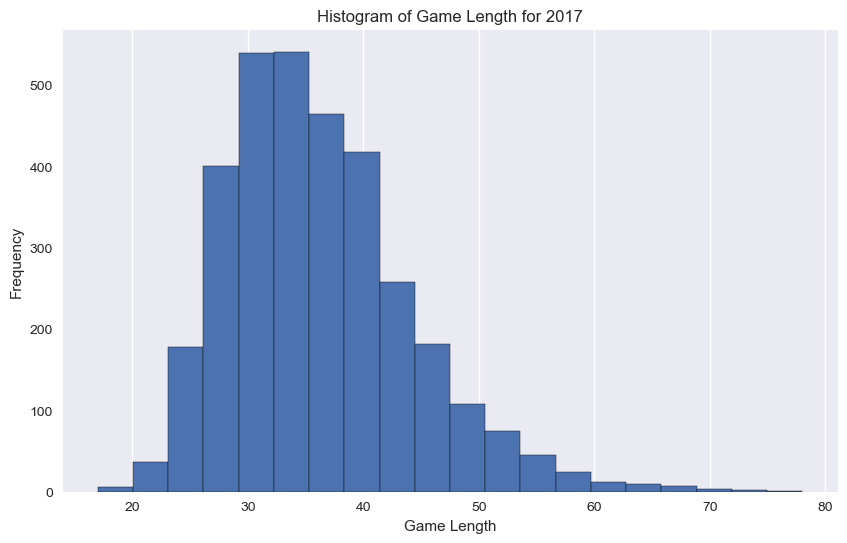

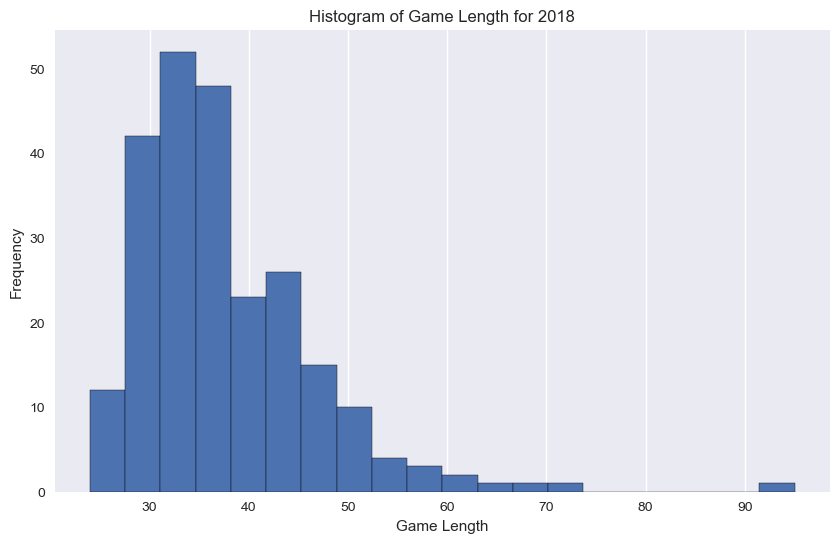

In [116]:
years.sort()
for year in years:
    plt.figure(figsize=(10, 6))
    lol_data[lol_data['Year'] == year]['gamelength'].plot(kind='hist', bins=20, edgecolor='black')
    plt.title(f'Histogram of Game Length for {year}')
    plt.xlabel('Game Length')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

### Analisando a diferença de ouro final da partida

In [117]:
print(lol_data.loc[1, 'golddiff'])

[0, 0, -26, -18, 147, 237, -152, 18, 88, -242, 102, 117, 802, 1420, 1394, 1301, 1489, 1563, 1368, 1105, 205, 192, 587, 377, 667, 415, 1876, 1244, 2130, 2431, 680, 1520, 949, 1894, 2644, 3394, 3726, 1165]


In [118]:
final_gold_diff = lol_data.copy()

#Pegando o ultimo valor ( diferenca de gold no final da partida )

final_gold_diff = lol_data.copy()
final_gold_diff['golddiff'] = final_gold_diff['golddiff'].apply(
    lambda x: ast.literal_eval(x)[-1] if isinstance(x, str) and len(ast.literal_eval(x)) > 0 else None
)

final_gold_diff = final_gold_diff[['Year', 'golddiff']]
final_gold_diff.head()

Year  golddiff
0  2015      6057
1  2015      1165
2  2015     13915
3  2015     -4507
4  2015     11322

In [119]:
# Modularizando 'golddiff' pois nao importa se for red ou blue side
final_gold_diff['golddiff'] = final_gold_diff['golddiff'].abs()

# Calculando a média, mediana e desvio padrão de 'golddiff' por ano
mean_gold_diff = final_gold_diff.groupby('Year')['golddiff'].mean()
median_gold_diff = final_gold_diff.groupby('Year')['golddiff'].median()
std_gold_diff = final_gold_diff.groupby('Year')['golddiff'].std()

summary_gold_diff = pd.DataFrame({
    'Mean Gold Diff': mean_gold_diff,
    'Median Gold Diff': median_gold_diff,
    'Standard Deviation Gold Diff': std_gold_diff,
})

print(summary_gold_diff)

      Mean Gold Diff  Median Gold Diff  Standard Deviation Gold Diff
Year                                                                
2014    14521.564103           15313.5                   5473.192026
2015    11297.500668           11697.5                   4891.880646
2016     9993.021251           10268.0                   4496.495373
2017    10162.898520           10612.0                   4384.298270
2018     9698.282158            9985.0                   4467.834800


Os dados resultantes mostram uma tendência decrescente tanto na diferença média de ouro como na mediana. Isso pode ser interpretado de várias maneiras em relação à hipótese de que o jogo está se tornando mais ágil.

Jogos mais competitivos: A diminuição da diferença de ouro pode indicar que as partidas estão se tornando mais competitivas, com menos disparidades significativas entre as equipes no final do jogo. Isso pode ser um resultado direto de melhorias na estratégia de jogo, habilidades dos jogadores e compreensão geral do jogo ao longo do tempo.

Mecânicas de jogo mais rápidas: Uma menor diferença de ouro pode sugerir que as equipes estão fechando os jogos mais rapidamente quando obtêm uma vantagem, o que poderia apoiar a hipótese de um jogo mais ágil. Em outras palavras, se uma equipe consegue uma vantagem, ela pode ser capaz de usar essa vantagem para terminar o jogo mais rapidamente, o que limitaria a quantidade de ouro que a equipe adversária poderia ganhar.

Mudanças na economia do jogo: A Riot Games tem feito várias alterações na economia do jogo ao longo dos anos, incluindo a maneira como o ouro é ganho. Isso pode afetar a diferença de ouro final e refletir um meta de jogo mais rápido.

No entanto, a redução da diferença de ouro ao longo do tempo não fornece uma evidência definitiva de um jogo mais rápido. Pode-se argumentar que, na verdade, indica partidas mais equilibradas e competitivas. Além disso, a diferença de ouro não é o único indicador de um jogo mais rápido ou ágil - outros fatores, como a duração das partidas, as estratégias utilizadas, e as mudanças nos campeões e nos itens também devem ser considerados. Portanto, embora esses dados possam apoiar parcialmente a ideia de um jogo mais ágil, a interpretação pode variar dependendo de outros fatores contextuais.

### Analisando as kills totais no final da partida

In [120]:
# Convert 'bKills' and 'rKills' from string to list
a = ast.literal_eval(lol_data.loc[0, 'bKills'])
b = ast.literal_eval(lol_data.loc[0, 'rKills'])

# Print the length of 'a' and 'b'
print(len(a), len(b))

16 9


In [121]:
# Convert 'bKills' from string to list
lol_kills = lol_data.copy()
lol_kills['bKills'] = lol_kills['bKills'].apply(ast.literal_eval)
lol_kills['rKills'] = lol_kills['rKills'].apply(ast.literal_eval)

# Count the number of kills
lol_kills['kill_count'] = lol_kills['bKills'].apply(len) + lol_kills['rKills'].apply(len)

total_kills = lol_kills[['Year', 'kill_count']]

total_kills.head()

Year  kill_count
0  2015          25
1  2015          19
2  2015          30
3  2015          31
4  2015          32

In [122]:
# Calculando a média, mediana e desvio padrão de 'kills' por ano
mean_total_kills = total_kills.groupby('Year')['kill_count'].mean()
median_total_kills = total_kills.groupby('Year')['kill_count'].median()
std_total_kills = total_kills.groupby('Year')['kill_count'].std()

summary_total_kills = pd.DataFrame({
    'Mean total_kills': mean_total_kills,
    'Median total_kills': median_total_kills,
    'Standard Deviation total_kills': std_total_kills,
})

print(summary_total_kills)

      Mean total_kills  Median total_kills  Standard Deviation total_kills
Year                                                                      
2014         28.641026                30.0                        9.928281
2015         27.849599                27.0                        9.563628
2016         23.884924                23.0                        8.673051
2017         25.018423                24.0                        9.105622
2018         19.311203                19.0                        7.152406


Os dados resultantes indicam uma tendência decrescente no número médio e mediano de kills totais em partidas profissionais de League of Legends de 2014 a 2018. Isso pode ser interpretado de várias maneiras em relação à hipótese de que o jogo está se tornando mais ágil:

Menos confrontos diretos: A diminuição no número total de kills pode sugerir que as partidas estão se tornando menos centradas em confrontos diretos (team fights) e mais focadas em objetivos e controle do mapa. Isso poderia ser um resultado de mudanças nas estratégias de jogo ou nas próprias mecânicas do jogo.

Jogabilidade mais estratégica: Um menor número de kills também pode sugerir que o jogo se tornou mais estratégico ao longo do tempo, com os jogadores evitando lutas desnecessárias e focando em objetivos que podem resultar em vitórias mais rápidas. Isso poderia, de certa forma, apoiar a hipótese de um jogo mais ágil, pois as equipes podem estar trabalhando para encerrar as partidas mais rapidamente.

Partidas mais curtas: Como foi mencionado anteriormente, uma diminuição no número total de kills pode ser um indicativo de partidas mais curtas, já que haveria menos tempo para acumular um grande número de kills. No entanto, a partir dos dados resultantes anteriormente, a duração média e a mediana das partidas não parecem ter diminuído significativamente ao longo do tempo.

## Heatmap das kills em todos os jogos por ano

In [123]:
import datashader as ds
from datashader import transfer_functions as tf

In [124]:
df = kills_data.copy()
df = df.drop(['Address', 'Team', 'Victim', 'Killer', 'Assist_1', 'Assist_2', 'Assist_3', 'Assist_4'], axis=1)
df = df.rename(columns={'Time': 'time'})
df = df.loc[df.x_pos != 'TooEarly']
df = df.loc[df.x_pos.notnull()]
df.x_pos = df.x_pos.apply(lambda x: int(x))
df.y_pos = df.y_pos.apply(lambda y: int(y))

df.head()

time  x_pos  y_pos
0  10.820   9229   8469
1  16.286  13908   5960
2  18.733   8281   7889
3  18.880   8522   8895
4  27.005   8902   7643

In [125]:
# Set 'Address' as index for both dataframes
df1 = kills_data.copy()
df2 = lol_data.copy()

# df1.info() 191069 entries
# df2.info() 7620 entries

df1.set_index('Address', inplace=True)
df2.set_index('Address', inplace=True)

# Merge the dataframes on the index ('Address')
kills_with_year = df1.merge(df2['Year'], left_index=True, right_index=True)

# merged_df.info() 191069 entries
kills_with_year = kills_with_year.reset_index()
kills_with_year = kills_with_year[['Year', 'Team', 'x_pos', 'y_pos']]
kills_with_year.head()

Year    Team x_pos  y_pos
0  2017  bKills  5382  13984
1  2017  bKills  6919  13542
2  2017  bKills  7952   8297
3  2017  bKills  7038   8316
4  2017  bKills  8020  12168

In [126]:
kills_years = kills_with_year['Year'].unique()
kills_years.sort()
kills_years

array([2014, 2015, 2016, 2017, 2018])

In [127]:
s_years = {2014: 100, 2015: 1, 2016: 0.1, 2017: 0.1, 2018: 50}

In [128]:
kills_with_year['x_pos'] = pd.to_numeric(kills_with_year['x_pos'], errors='coerce')
kills_with_year['y_pos'] = pd.to_numeric(kills_with_year['y_pos'], errors='coerce')

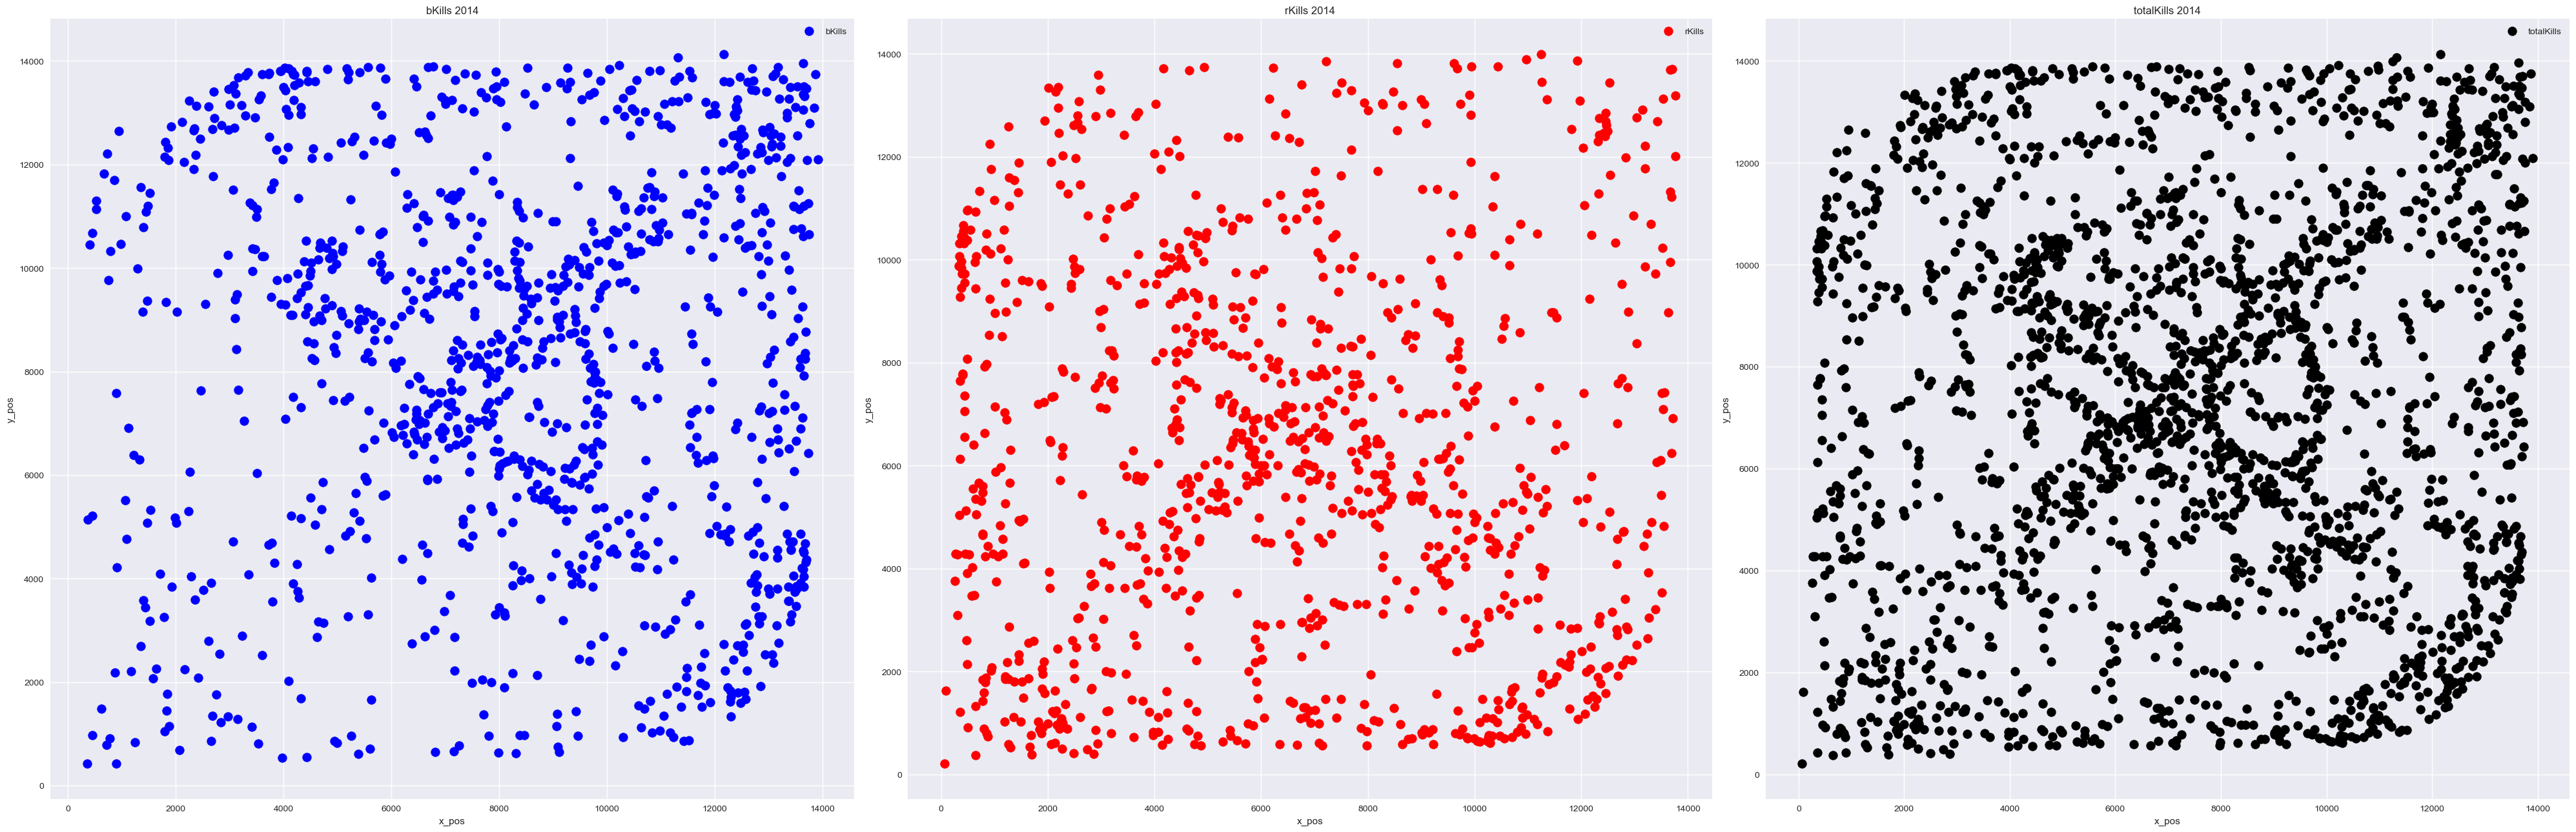

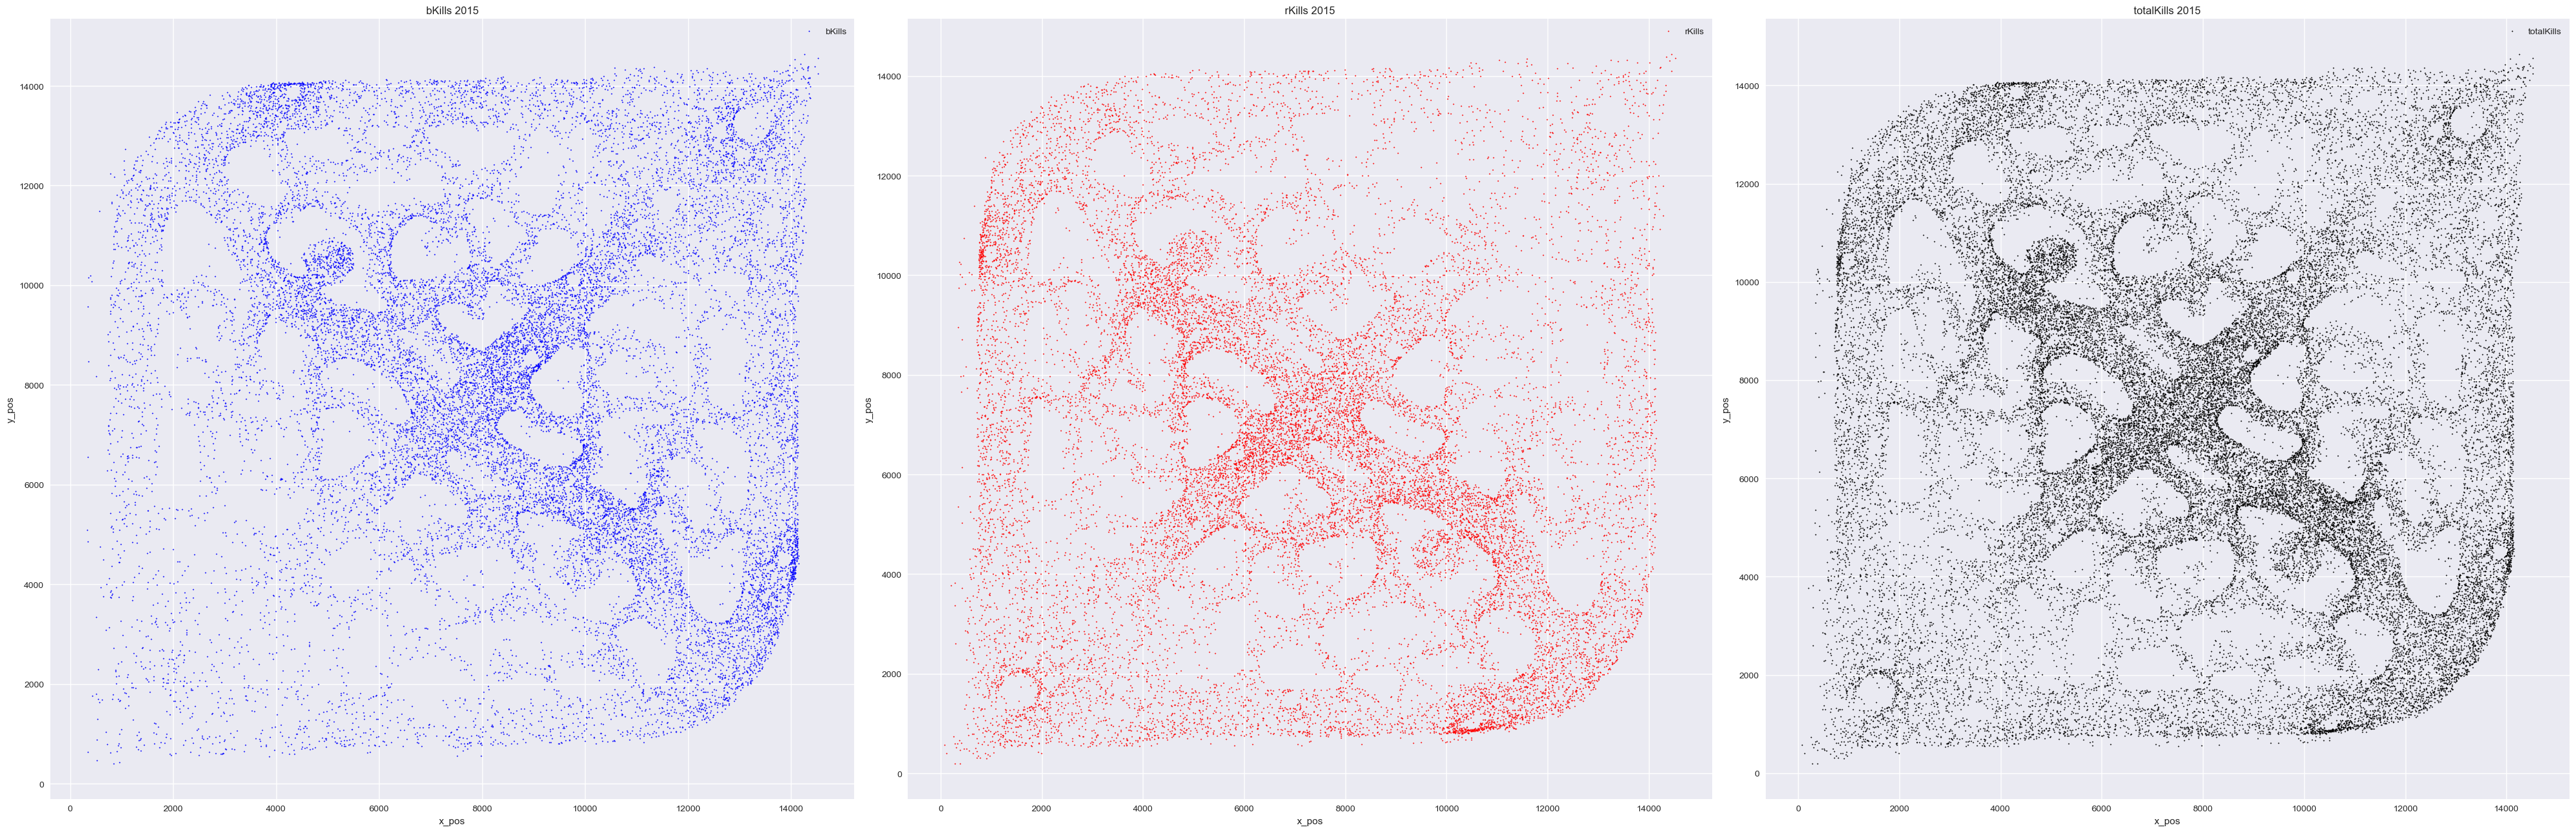

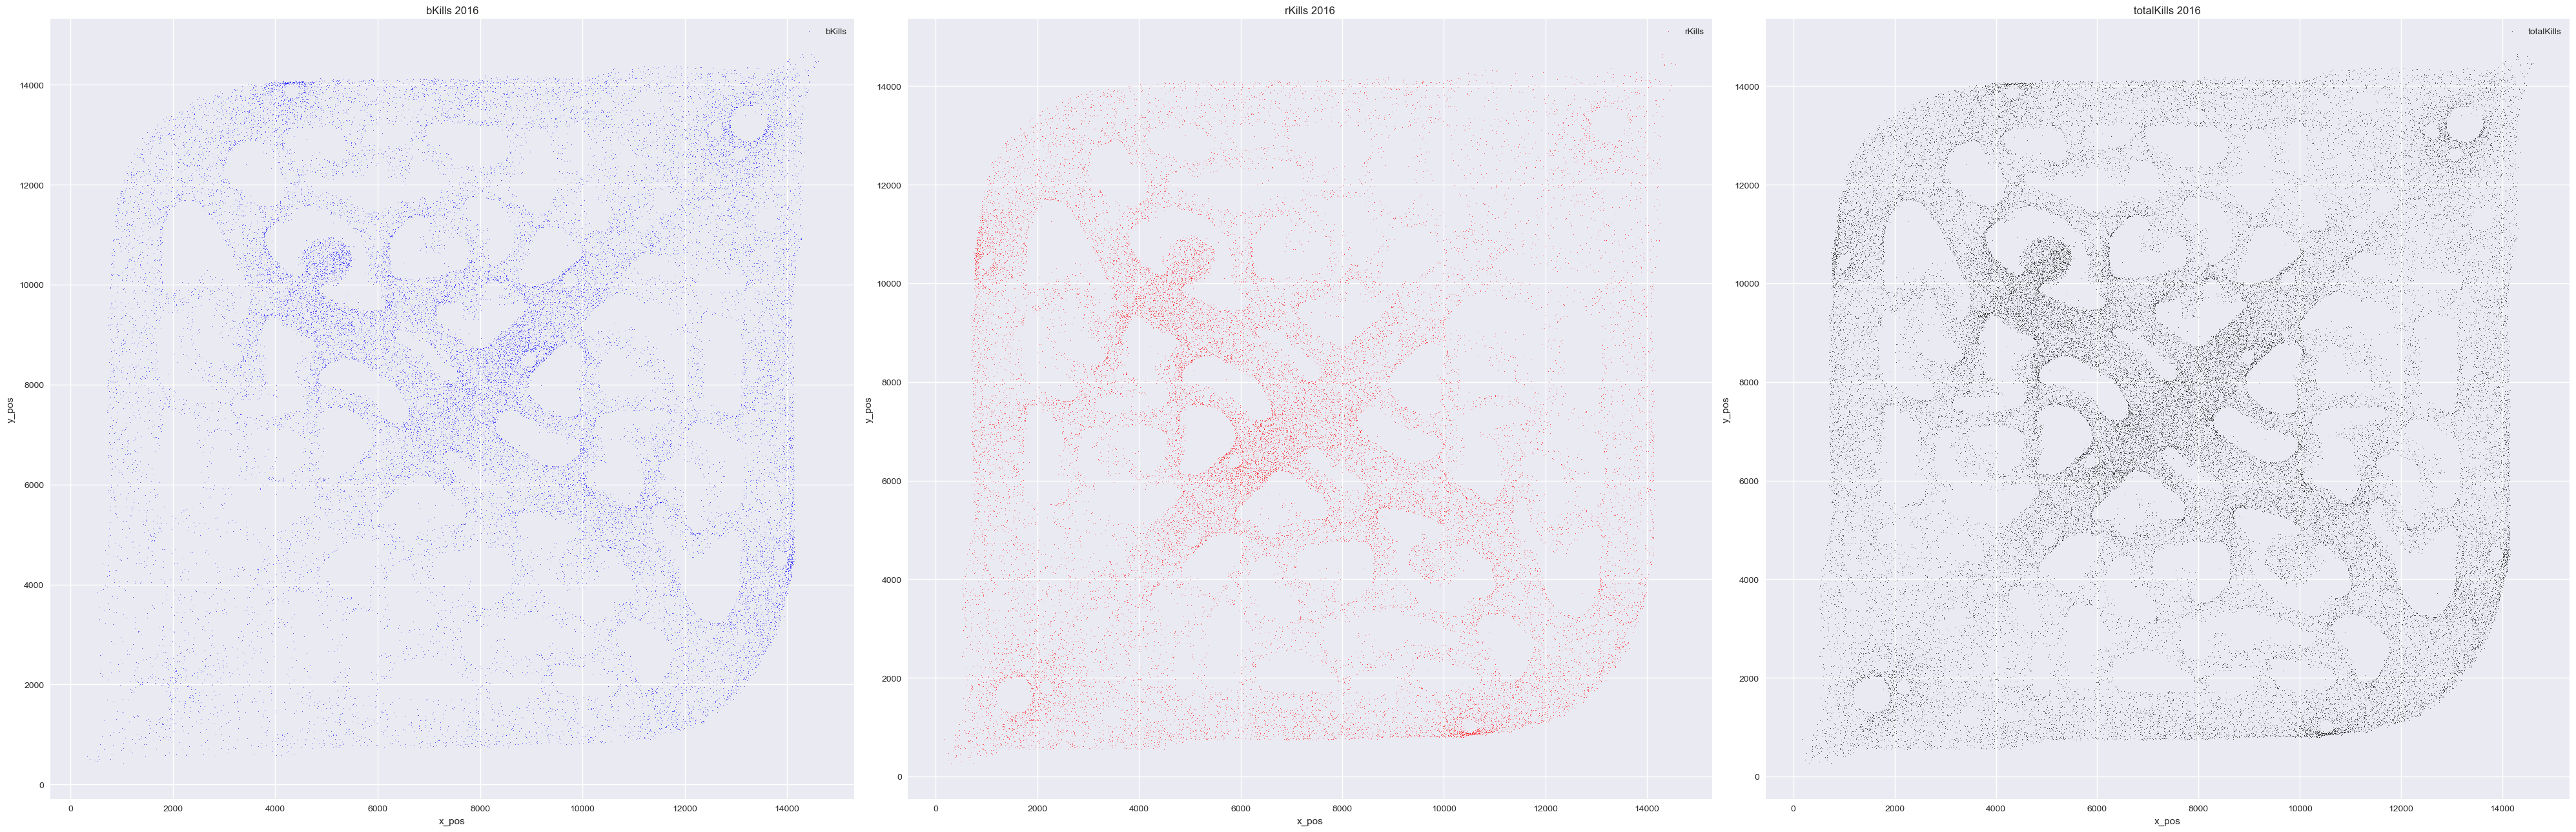

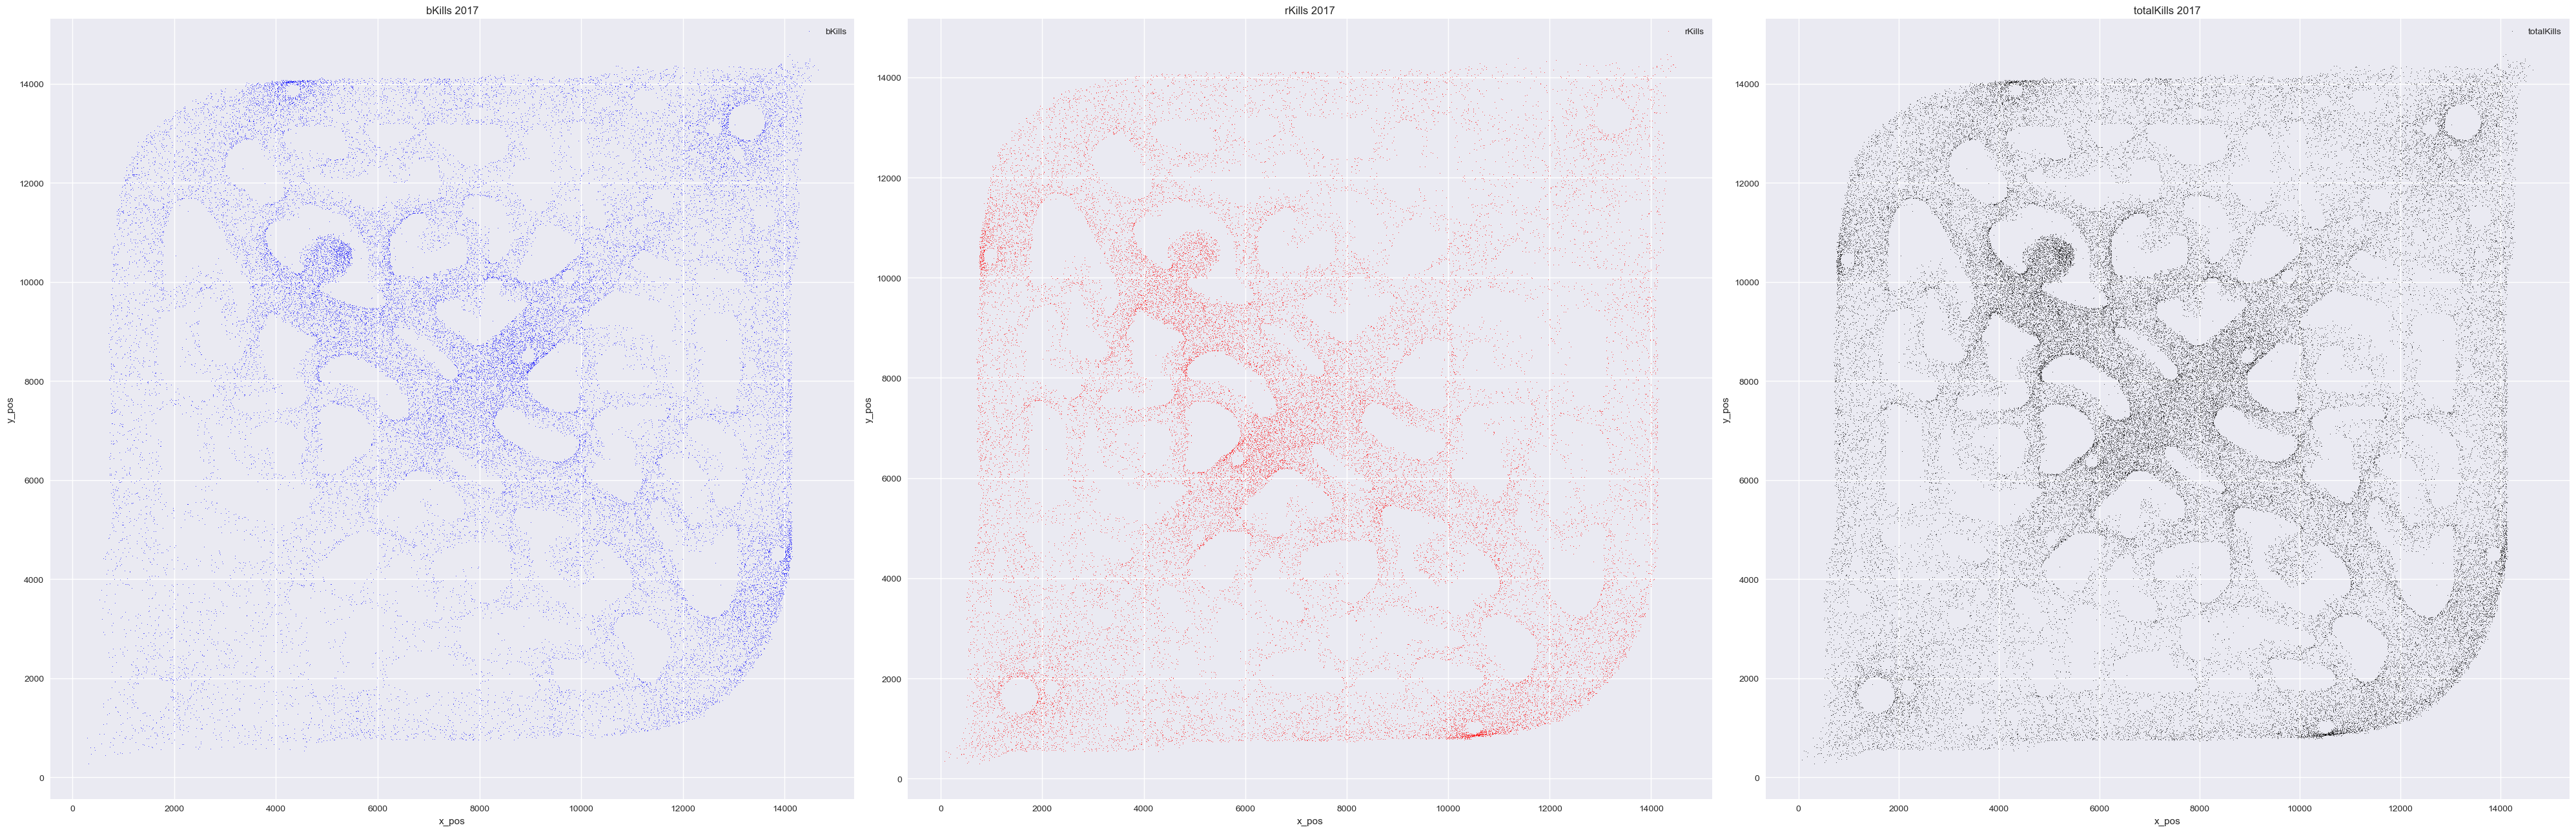

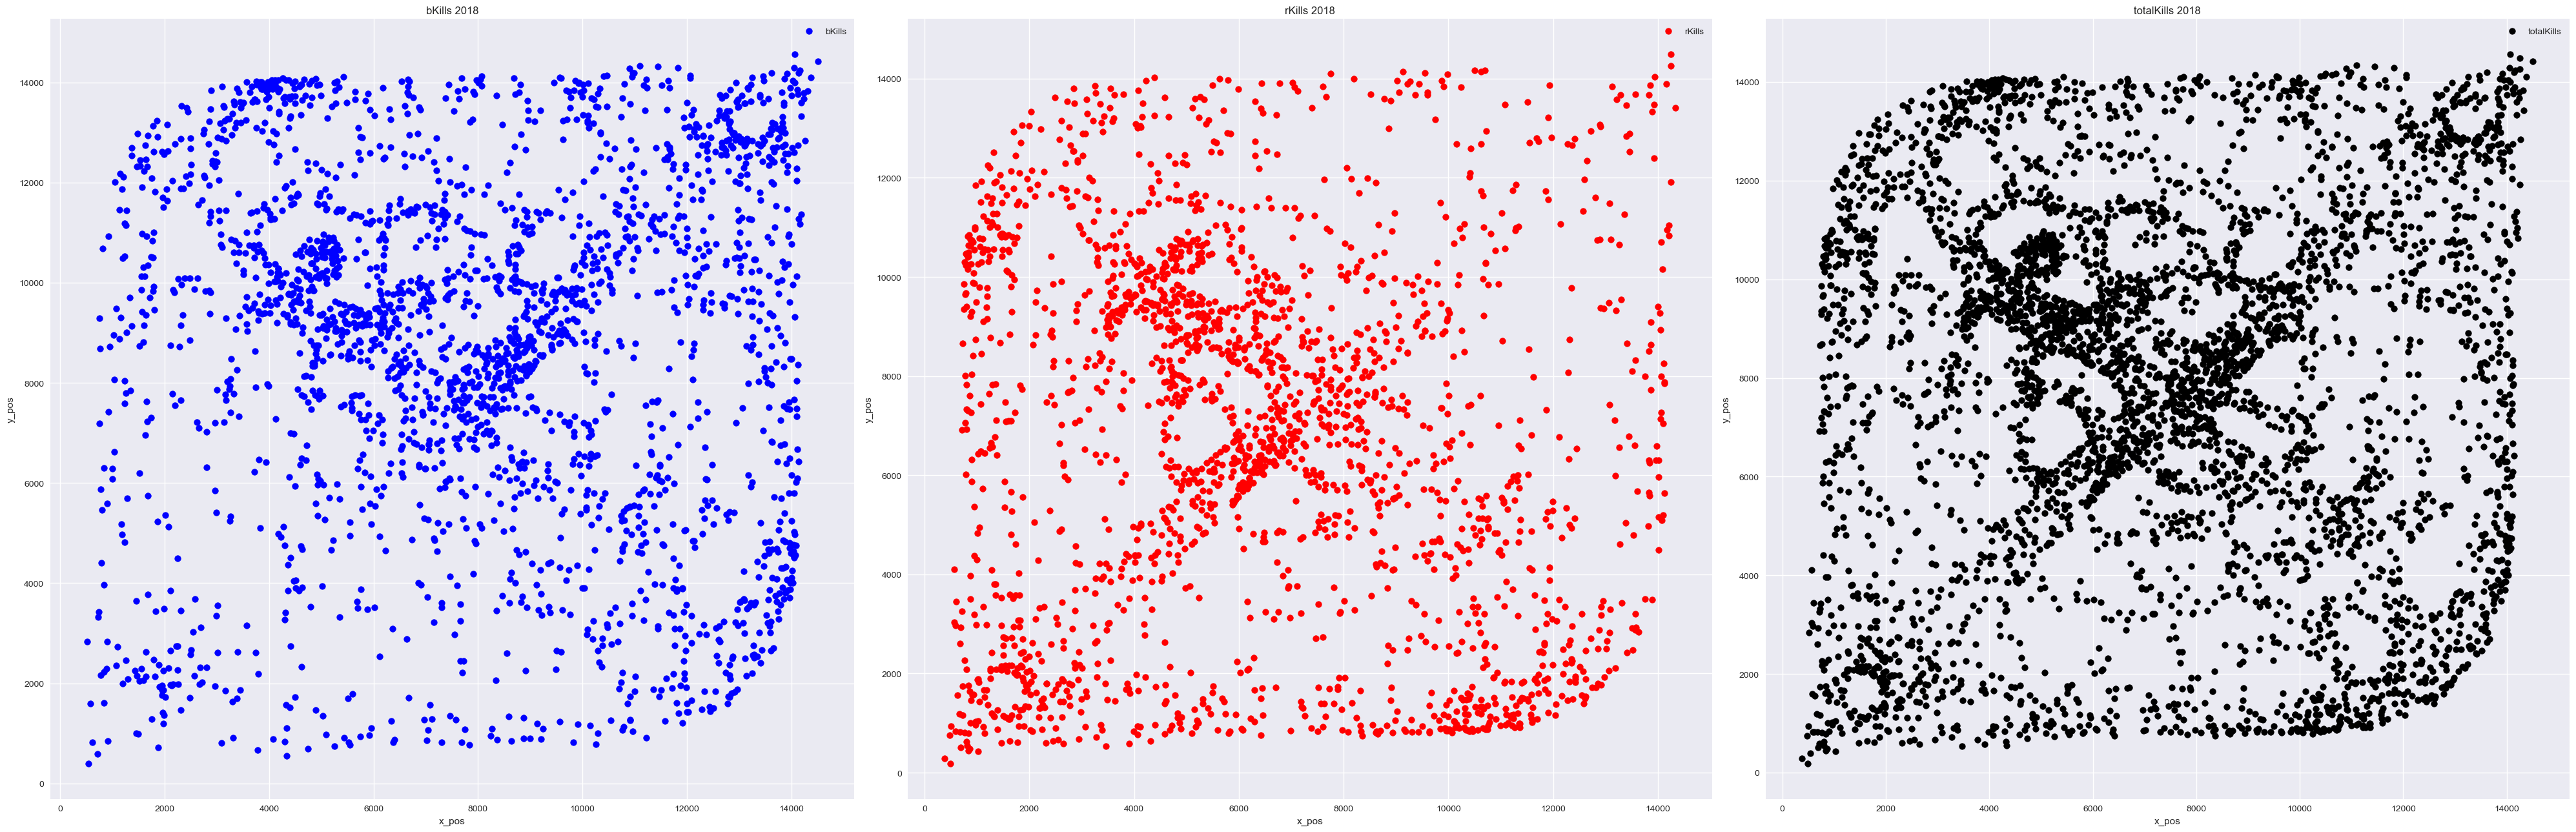

In [129]:
for year in kills_years:
    year_data = kills_with_year[kills_with_year['Year'] == year]

    # Split the DataFrame into bKills and rKills
    bKills = year_data[year_data['Team'] == 'bKills']
    rKills = year_data[year_data['Team'] == 'rKills']

    # Create a figure with two subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(40, 13))

    # Plotting bKills in the first subplot
    ax1.scatter(bKills['x_pos'], bKills['y_pos'], color='blue', label='bKills', marker='o', s=s_years[year])
    ax1.set_xlabel('x_pos')
    ax1.set_ylabel('y_pos')
    ax1.set_title('bKills ' + str(year))
    ax1.legend()

    # Plotting rKills in the second subplot
    ax2.scatter(rKills['x_pos'], rKills['y_pos'], color='red', label='rKills', marker='o', s=s_years[year])
    ax2.set_xlabel('x_pos')
    ax2.set_ylabel('y_pos')
    ax2.set_title('rKills ' + str(year))
    ax2.legend()
    
    # Plotting totalKills in the third subplot
    ax3.scatter(year_data['x_pos'], year_data['y_pos'], color='black', label='totalKills', marker='o', s=s_years[year])
    ax3.set_xlabel('x_pos')
    ax3.set_ylabel('y_pos')
    ax3.set_title('totalKills ' + str(year))
    ax3.legend()

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()


A partir desses heatmaps pode se concluir que sempre há uma tendencia da concentração de mortes serem nos objetivos principais do mapa: line mid e os pitchs dos monstros especiais que são vitais para se criar vantagens durante o game.

## Conclusão Hipótese 1
Baseado nos conjuntos de dados analisados e principais aspectos do jogo - tempo médio de jogo, diferença de ouro e número total de kills em partidas profissionais de League of Legends ao longo dos anos - podemos concluir que a hipótese de que o jogo está se tornando mais ágil é parcialmente apoiada, mas também pode ser interpretada de outras maneiras.

Tempo médio de jogo: Os dados não mostraram uma diminuição consistente no tempo médio de jogo entre 2014 e 2018. Embora tenham ocorrido flutuações ao longo dos anos, não houve uma tendência clara para partidas mais curtas. Portanto, este conjunto de dados não suporta fortemente a hipótese.

Diferença de ouro: A diferença média de ouro ao final das partidas diminuiu ao longo do tempo, o que pode sugerir que as partidas estão se tornando mais equilibradas ou que as equipes estão se tornando mais eficientes em encerrar os jogos quando obtêm uma vantagem. Isso poderia ser interpretado como um indício de um jogo mais ágil, mas também pode ser um sinal de competições mais acirradas e jogos mais equilibrados.

Número total de kills: O número médio de kills por partida também diminuiu, o que pode indicar uma mudança em direção a um estilo de jogo mais estratégico, focado em objetivos em vez de confrontos diretos. Isso pode sugerir um jogo mais ágil em termos de estratégia, mas também pode indicar um movimento em direção a um jogo mais cauteloso e tático.

Portanto, embora haja algumas evidências que possam sugerir um ritmo de jogo mais rápido, as interpretações podem variar. As mudanças observadas podem ser o resultado de uma variedade de fatores, incluindo mudanças nas mecânicas do jogo, estratégias de equipe e a evolução da cena profissional de League of Legends. Cada uma dessas métricas oferece uma visão única do ritmo do jogo, mas nenhuma delas fornece uma resposta definitiva por si só.

Como em muitos aspectos da análise de dados, a interpretação desses resultados depende muito do contexto e pode ser influenciada por uma variedade de fatores que vão além dos dados brutos. Mais pesquisas, incluindo a análise de outras métricas e a consideração das mudanças específicas nas mecânicas e na meta do jogo ao longo do tempo, poderiam fornecer insights adicionais.

## Hipotese 2: Há campeões que tem uma taxa de vitória significativamente maior

A compreensão das escolhas de campeões (picks) e seu impacto nos resultados das partidas é um aspecto crucial a ser considerado em League of Legends. A seleção de campeões desempenha um papel fundamental no desenvolvimento de estratégias de equipe e no desfecho dos jogos. Nossa hipótese surge da necessidade de investigar se certos campeões possuem uma taxa de vitória significativamente superior em relação aos demais, o que poderia fornecer informações valiosas para os jogadores ao tomarem decisões de seleção. Com base em estudos anteriores, suspeitamos que determinados campeões populares ou considerados fortes possam ter uma vantagem competitiva em comparação aos outros. Portanto, nosso objetivo é confirmar essa hipótese por meio da exploração de um conjunto de dados de campeões do League of Legends e da análise das relações entre as escolhas de campeões e os resultados das partidas. A confirmação dessa hipótese pode oferecer perspectivas valiosas para a estratégia de seleção de campeões e contribuir para uma compreensão aprimorada do metagame do League of Legends.

### Montando o dataframe para análise

In [130]:
import pandas as pd

columns_to_filter_blue_side = ['League', 'Year', 'blueMiddleChamp', 'blueADCChamp', 'blueSupportChamp', 'blueTopChamp', 'blueJungleChamp', 'bResult']
columns_to_filter_red_side = ['League', 'Year', 'redMiddleChamp', 'redADCChamp', 'redSupportChamp', 'redTopChamp', 'redJungleChamp', 'rResult']

champions_df_blue_side = lol_data[columns_to_filter_blue_side]
champions_df_red_side = lol_data[columns_to_filter_red_side]

# Realizando melt no dataframe do blue side
champions_df_blue_melted = pd.melt(champions_df_blue_side, id_vars=['League', 'Year', 'bResult'], var_name='Position', value_name='Champion')

# Realizando melt no dataframe do red side
champions_df_red_melted = pd.melt(champions_df_red_side, id_vars=['League', 'Year', 'rResult'], var_name='Position', value_name='Champion')

# Concatenando os dois dataframes
champions_df = pd.concat([champions_df_blue_melted, champions_df_red_melted])

# Renomeando a coluna de resultado
champions_df.rename(columns={'bResult': 'Result'}, inplace=True)
champions_df['Result'] = champions_df['Result'].fillna(champions_df['rResult'])

# Removendo as colunas desnecessárias
champions_df.drop(['League', 'Year', 'rResult'], axis=1, inplace=True)

# Resetando o index
champions_df.reset_index(drop=True, inplace=True)

champions_df


Result         Position   Champion
0         1.0  blueMiddleChamp       Ahri
1         0.0  blueMiddleChamp       Ahri
2         1.0  blueMiddleChamp       Fizz
3         0.0  blueMiddleChamp    Leblanc
4         1.0  blueMiddleChamp  Lissandra
...       ...              ...        ...
76195     1.0   redJungleChamp    XinZhao
76196     1.0   redJungleChamp      Ivern
76197     1.0   redJungleChamp    Evelynn
76198     0.0   redJungleChamp   JarvanIV
76199     1.0   redJungleChamp   JarvanIV

[76200 rows x 3 columns]

### Verificando a consistência dos dados

In [131]:
# Somatória dos valores nulos
missing_values = champions_df.isnull().sum()
print("Valores faltantes:\n", missing_values)

# Contando as ocorrências
data_consistency = champions_df['Champion'].value_counts()
print("Consistência dos dados:\n", data_consistency)


Valores faltantes:
 Result      0
Position    0
Champion    0
dtype: int64
Consistência dos dados:
 Champion
Gragas          2555
RekSai          2330
Braum           2115
Elise           2065
Thresh          1923
                ... 
MonkeyKing         4
Volibear           4
Garen              2
FiddleSticks       2
Tryndamere         1
Name: count, Length: 140, dtype: int64


### Obtendo a taxa de vitórias

In [132]:
# Calculando o win rate para cada campeão
average_win_rate = champions_df.groupby('Champion')['Result'].mean().reset_index()
average_win_rate.rename(columns={'Result': 'Win Rate'}, inplace=True)

# Ordenando em ordem descendente
average_win_rate.sort_values(by='Win Rate', ascending=False, inplace=True)

average_win_rate

Champion  Win Rate
115    Tryndamere  1.000000
38   Heimerdinger  0.666667
131       XinZhao  0.666667
8     AurelionSol  0.642857
88         Rammus  0.619048
..            ...       ...
133        Yorick  0.250000
28   Fiddlesticks  0.222222
111         Teemo  0.166667
33          Garen  0.000000
127      Volibear  0.000000

[140 rows x 2 columns]

### Montando o gráfico

In [133]:
# Definindo o estilo do plot
plt.style.use('seaborn-v0_8')
palette = sns.color_palette('Set2')

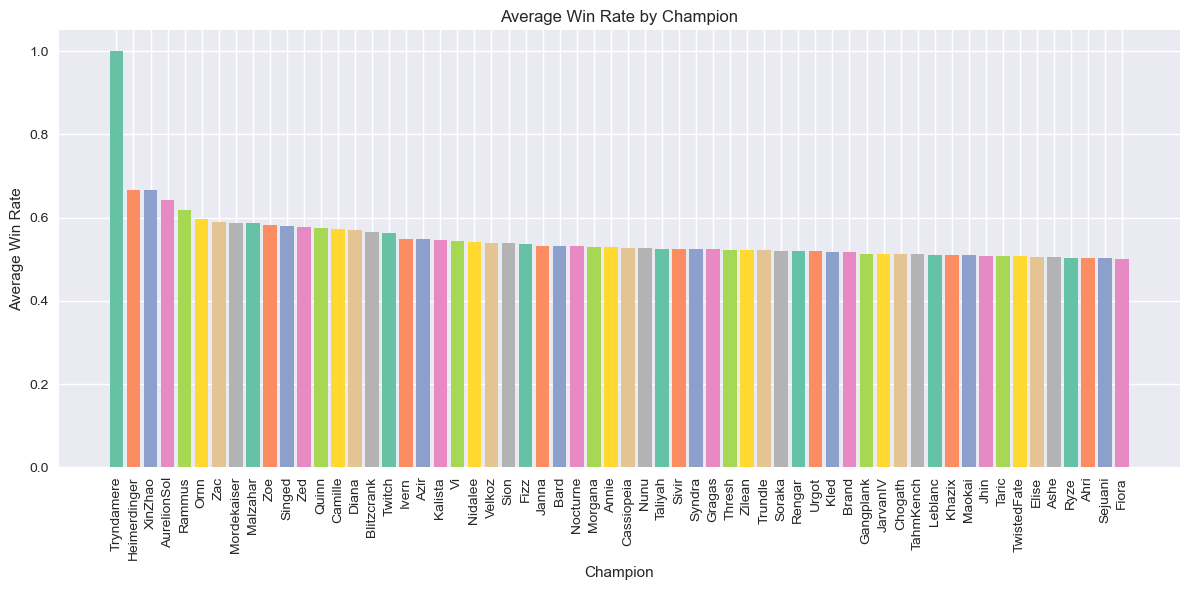

In [134]:
plt.figure(figsize=(12, 6))

# Plotando o gráfico de barras
plt.bar(average_win_rate['Champion'][:60], average_win_rate['Win Rate'][:60], color=palette)
plt.xticks(rotation=90)
plt.xlabel('Champion')
plt.ylabel('Average Win Rate')
plt.title('Average Win Rate by Champion')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Como podemos ver no gráfico acima, não ficou muito bom a visualização por conta de dois fatores:
- Temos campeões que foram jogados uma única vez ou poucas vezes e ganharam, com isso, campeões que são mais escolhidos acabam saindo penalizados.
- Outro fator é que temos muitos mais dados no eixo X do que no eixo Y, faz sentido rotacionar o plot

Enfim, vamos fazer um histograma de quantas vezes cada campeão aparece

In [135]:
champions_count = champions_df['Champion'].value_counts()
print(champions_count)

Champion
Gragas          2555
RekSai          2330
Braum           2115
Elise           2065
Thresh          1923
                ... 
MonkeyKing         4
Volibear           4
Garen              2
FiddleSticks       2
Tryndamere         1
Name: count, Length: 140, dtype: int64


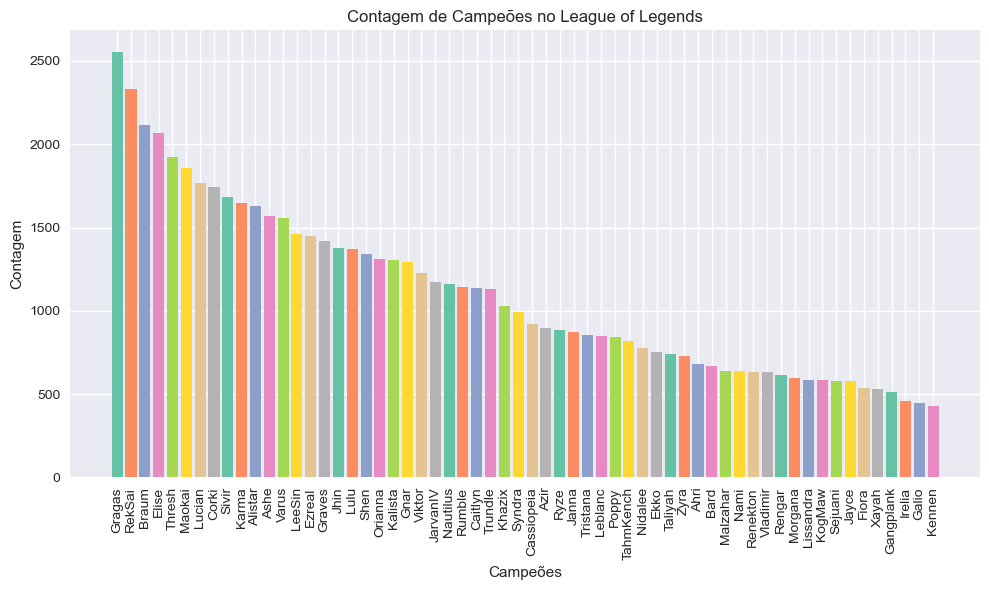

In [136]:
plt.figure(figsize=(10, 6))
plt.bar(champions_count.index[:60], champions_count.values[:60], color=palette)
plt.xticks(rotation=90)
plt.xlabel('Campeões')
plt.ylabel('Contagem')
plt.title('Contagem de Campeões no League of Legends')
plt.tight_layout()
plt.show()

Como você pode notar, a visualização ainda está comprometida, há muitos campeões no eixo X, com isso fica difícil analisar. A metodologia que vou seguir é definir um Threshold, ou seja, um número mínimo de ocorrências do campeão para que eu considere ele na minha análise. Isso pode ser útil para ignorar campeões menos relevantes.

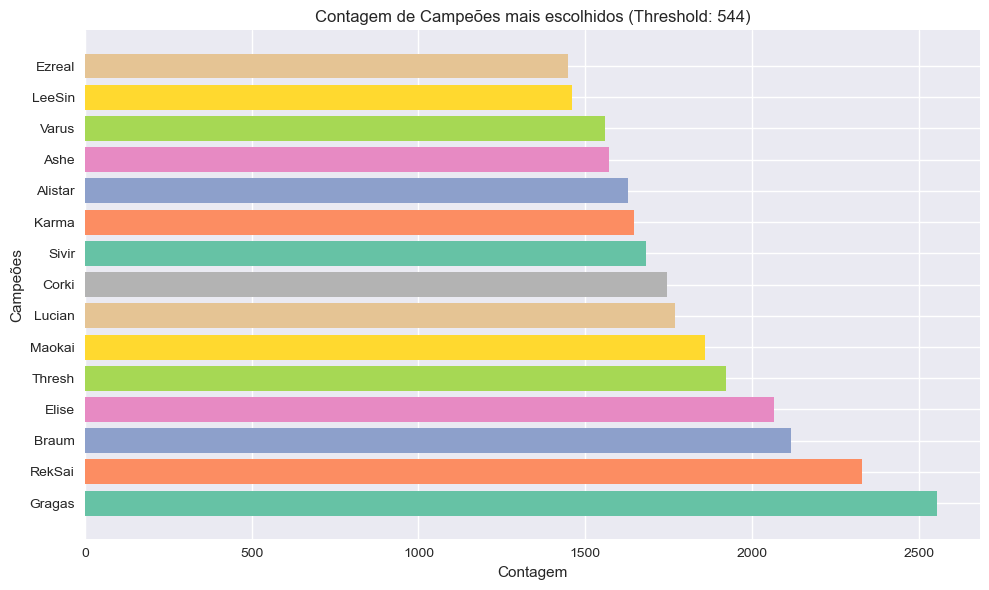

In [137]:
# Calculando a média de picks
media_picks = champions_count.mean()

# Definindo o threshold com base na media
threshold = int(media_picks)

# Filtrando os campeões com base no threshold
filtered_champions = champions_count[champions_count >= threshold].sort_values(ascending=False)

# Plotando o histograma
plt.figure(figsize=(10, 6))
plt.barh(filtered_champions.index[:15], filtered_champions.values[:15], color=palette)
plt.xlabel('Contagem')
plt.ylabel('Campeões')
plt.title(f'Contagem de Campeões mais escolhidos (Threshold: {threshold})')
plt.tight_layout()
plt.show()

Agora temos uma visão muito mais claro de quais são os campeões mais escolhidos! Agora é interessante a gente analisar o win rate desses campeões, vamos ver se de fato eles tem uma taxa de vitória maior. Para isso, vou pegar os resultados dos campeões no df filtered_champions, criar um novo dataframe com esses resultados e depois analisar o win rate.

In [138]:
# Obtendo os dados correspondentes aos campeões filtrados
filtered_data = champions_df.loc[champions_df['Champion'].isin(filtered_champions.index)]

# Calculando a contagem de vitórias e o número total de ocorrências para cada campeão
wins_count = filtered_data.groupby('Champion')['Result'].sum()
total_count = filtered_data['Champion'].value_counts()

# Calculando a taxa de vitória (win rate)
win_rate = (wins_count / total_count) * 100

# Ordenando por win rate
win_rate = win_rate.sort_values(ascending=False)

print(win_rate)

Champion
Malzahar      58.777429
Azir          54.838710
Kalista       54.594181
Nidalee       54.064516
Janna         53.264605
Bard          53.143713
Morgana       52.941176
Cassiopeia    52.711497
Taliyah       52.503383
Sivir         52.497027
Syndra        52.467271
Gragas        52.446184
Thresh        52.262090
Trundle       52.170062
Rengar        51.948052
JarvanIV      51.323655
TahmKench     51.219512
Leblanc       51.003542
Khazix        50.970874
Maokai        50.967742
Jhin          50.799419
Elise         50.556901
Ashe          50.508906
Ryze          50.396376
Ahri          50.294118
Sejuani       50.172414
Shen          50.074627
Gnar          50.038730
Lissandra     50.000000
Rumble        49.956255
Tristana      49.824150
Caitlyn       49.823633
Zyra          49.589041
Varus         49.294872
Nautilus      49.180328
Alistar       49.109883
Corki         48.853211
Poppy         48.632580
Ekko          48.609272
Braum         48.368794
RekSai        48.326180
Ezreal 

Como podemos ver, estes campeões estão com o win rate em sua grande parte entre 44% e 59%, vamos plotar um gráfico para ter uma visualização melhor.

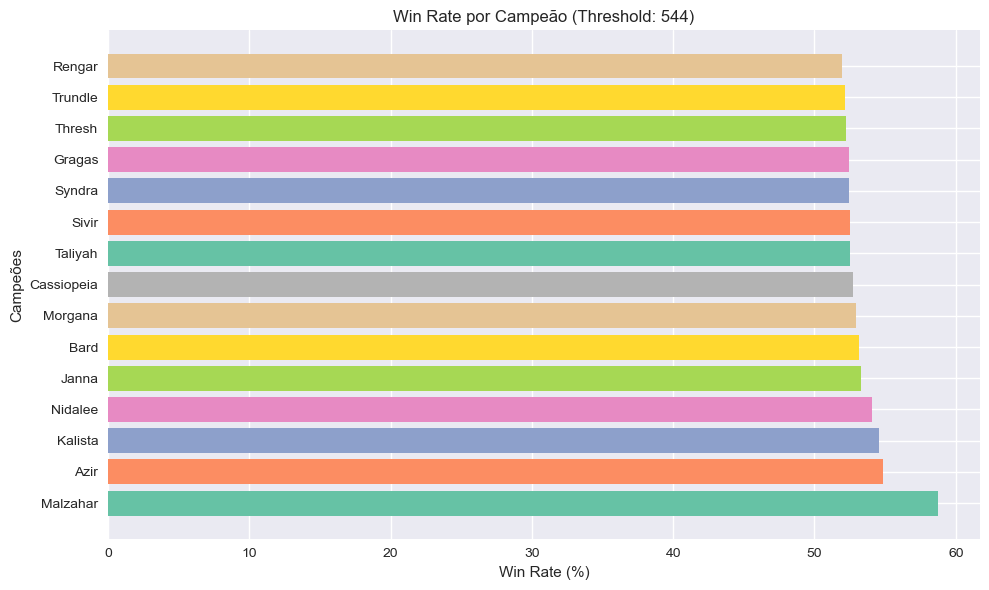

In [139]:
# Plotando o histograma com Seaborn
plt.figure(figsize=(10, 6))
plt.barh(win_rate.index[:15], win_rate.values[:15], color=palette)

plt.xlabel('Win Rate (%)')
plt.ylabel('Campeões')
plt.title(f'Win Rate por Campeão (Threshold: {threshold})')

plt.tight_layout()
plt.show()

Apenas analisar o win rate dos campeões com mais de 1000 ocorrências não é muito válido, quero relizar um teste de hipótese para verificar se há de fato uma diferença significativa de win rate. Para isso, vou pegar o Malzahar e o Azir (campeões com maior win rate) e comparar.

A hipótese nula (H0) é a hipótese de que não há diferença significativa entre o win rate do Malzahar e o win rate do Azir. Em outras palavras, a média de win rate para ambos os campeões é igual.

A hipótese alternativa (H1) é a hipótese de que há uma diferença significativa entre o win rate do Malzahar e o win rate do Azir. Em outras palavras, a média de win rate para pelo menos um dos campeões é diferente.

In [140]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

# Contagem de vitórias e o número total de ocorrências para a Kalista
wins_malzahar = champions_df.loc[champions_df['Champion'] == 'Malzahar', 'Result'].sum()
total_malzahar = champions_df.loc[champions_df['Champion'] == 'Malzahar', 'Result'].count()

# Contagem de vitórias e o número total de ocorrências para a Sivir
wins_azir = champions_df.loc[champions_df['Champion'] == 'Azir', 'Result'].sum()
total_azir = champions_df.loc[champions_df['Champion'] == 'Azir', 'Result'].count()

# Realizando o teste de proporção
count = np.array([wins_malzahar, wins_azir])
nobs = np.array([total_malzahar, total_azir])

z_score, p_value = proportions_ztest(count, nobs)

# Verificando o resultado do teste
alpha = 0.05

print(f'p-valor {p_value}, alpha: {alpha}')

p-valor 0.12486987685447219, alpha: 0.05


Ao realizar o teste de hipótese para comparar o win rate (taxa de vitória) do campeão Malzahar com o campeão Azir, obtivemos um p-valor de 0.125, considerando um nível de significância de 0.05. Com base nesses resultados, não encontramos evidências estatísticas suficientes para rejeitar a hipótese nula de que não há diferença significativa no win rate entre o Malzahar e o Azir. Isso sugere que a diferença observada no win rate entre esses dois campeões pode ter ocorrido simplesmente devido a flutuações aleatórias nos dados. Portanto, não podemos afirmar com confiança estatística que o Malzahar possui uma taxa de vitória significativamente maior do que o Azir.

É importante ressaltar que os resultados de win rate podem ser influenciados por diversos fatores, tais como estratégias de jogo, atualizações de balanceamento e preferências dos jogadores. Portanto, é recomendado realizar análises adicionais e considerar outras variáveis antes de tirar conclusões definitivas sobre a superioridade de um campeão em relação ao outro.

### Conclusão Hipótese 2

Portanto, a conclusão enfatiza que, com base nos resultados do teste de hipótese, não há evidências adequadas para sustentar a hipótese de que determinados campeões têm uma taxa de vitória significativamente maior do que outros. No entanto, é importante ressaltar que existem vários fatores que podem influenciar os resultados e que uma análise mais abrangente requer a consideração de outras variáveis e a realização de investigações suplementares.

## Hipotese 3: O Blue Side é o lado mais fácil de jogar no League of Legends.

**Motivação**: Jogo o jogo a quase 10 anos e sempre existiu a discussão de qual lado é o mais facil de se jogar. Um dos principais argumentos para afirmar que o lado azul é mais fácil de jogar é o controle da câmera do jogo. No League of Legends, a câmera padrão fica posicionada do lado azul do mapa, o que permite aos jogadores terem uma visão mais ampla do campo de batalha, especialmente ao controlar campeões com habilidades de longo alcance. Essa visão privilegiada pode tornar o posicionamento e a tomada de decisões mais fáceis para os jogadores no lado azul, pelo menos essa é a minha impressão e a de pessoas da comunidade. Essa discussão também se estendem a outros jogos como no xadrez, com a ideia de __"First-move advantage in chess"__, onde existe a ideia de que as peças brancas possam levar uma certa vantagem por iniciarem o movimento no tabuleiro. É importante ressaltar que o equilíbrio do jogo é uma preocupação constante para os desenvolvedores do League of Legends. Ao longo dos anos, foram implementadas várias mudanças e atualizações para garantir que os dois lados do mapa tenham oportunidades equilibradas de vitória. Mas existem outros fatores que podem impactar nessa percepção e é isso que estou buscando entender.


### Analisando qual o lado tem mais vitórias ao longo dos anos em todas as ligas competitivas


In [141]:
# Colunas relevantes: 'League', 'Year', 'bResult', 'rResult'
columns_to_filter = ['League', 'Year', 'bResult', 'rResult']
filtered_data = lol_data[columns_to_filter]

# Contar as vitórias do lado Azul (bResult = 1) agrupadas por ano
blue_wins = filtered_data[filtered_data['bResult'] == 1].groupby('Year').size().reset_index(name='BlueWins')

# Contar as vitórias do lado Vermelho (rResult = 1) agrupadas por ano
red_wins = filtered_data[filtered_data['rResult'] == 1].groupby('Year').size().reset_index(name='RedWins')

# Juntando dados de vitórias do lado Azul e Vermelho com base no ano, preenchendo valores ausentes com zero
merged_data = pd.merge(blue_wins, red_wins, on='Year', how='outer').fillna(0)

merged_data['DominantSide'] = 'Blue'
merged_data.loc[merged_data['RedWins'] > merged_data['BlueWins'], 'DominantSide'] = 'Red'
total_blue_wins = merged_data['BlueWins'].sum()
total_red_wins = merged_data['RedWins'].sum()

print("Total de vitórias do lado Azul:", total_blue_wins)
print("Total de vitórias do lado Vermelho:", total_red_wins)
print("Lado com mais vitórias ao longo dos anos:", "Azul" if total_blue_wins > total_red_wins else "Vermelho")


Total de vitórias do lado Azul: 4146
Total de vitórias do lado Vermelho: 3474
Lado com mais vitórias ao longo dos anos: Azul


### Taxa de vitória mais alta ao longo dos anos para cada lado (Blue Side ou Red Side) em cada uma das ligas competitivas:


In [142]:
# Dados por liga 
grouped_data = lol_data.groupby('League')

# Iteração sobre cada liga e seu respectivo grupo de dados
for league, group in grouped_data:

    # Cálculo da taxa de vitória do lado Azul para a liga atual
    blue_win_rate = (group['bResult'].sum() / len(group)) * 100

    # Cálculo da taxa de vitória do lado Vermelho para a liga atual
    red_win_rate = (group['rResult'].sum() / len(group)) * 100

    if blue_win_rate > red_win_rate:
        winning_side = 'Azul'
        win_rate = blue_win_rate
    else:
        winning_side = 'Vermelho'
        win_rate = red_win_rate

    print(f"Na liga {league}, o lado com a maior taxa de vitória é o {winning_side}: {win_rate}% \n")



Na liga CBLoL, o lado com a maior taxa de vitória é o Azul: 54.48504983388705% 

Na liga CLS, o lado com a maior taxa de vitória é o Azul: 52.57142857142857% 

Na liga EULCS, o lado com a maior taxa de vitória é o Azul: 53.59417652411283% 

Na liga IEM, o lado com a maior taxa de vitória é o Azul: 55.072463768115945% 

Na liga LCK, o lado com a maior taxa de vitória é o Azul: 55.08650519031142% 

Na liga LCL, o lado com a maior taxa de vitória é o Azul: 54.44839857651246% 

Na liga LJL, o lado com a maior taxa de vitória é o Azul: 52.32558139534884% 

Na liga LLN, o lado com a maior taxa de vitória é o Azul: 54.132231404958674% 

Na liga LMS, o lado com a maior taxa de vitória é o Azul: 53.72750642673522% 

Na liga MSI, o lado com a maior taxa de vitória é o Azul: 58.55855855855856% 

Na liga NALCS, o lado com a maior taxa de vitória é o Azul: 54.71698113207547% 

Na liga OPL, o lado com a maior taxa de vitória é o Azul: 51.52838427947598% 

Na liga RR, o lado com a maior taxa de vitór

#### Levantando o % de vitórias de cada lado para cada uma das ligas para facilitar a comparação

In [143]:
# Dados por liga 
grouped_data = lol_data.groupby('League')

# Levantando o percentual em cada uma das ligas para comparação
for league, group in grouped_data:
    blue_win_rate = (group['bResult'].sum() / len(group)) * 100
    red_win_rate = (group['rResult'].sum() / len(group)) * 100
    
    print(f"Na liga {league}, a taxa de vitória do lado Azul é: {blue_win_rate:.2f}%")
    print(f"Na liga {league}, a taxa de vitória do lado Vermelho é: {red_win_rate:.2f}%")
    print()

Na liga CBLoL, a taxa de vitória do lado Azul é: 54.49%
Na liga CBLoL, a taxa de vitória do lado Vermelho é: 45.51%

Na liga CLS, a taxa de vitória do lado Azul é: 52.57%
Na liga CLS, a taxa de vitória do lado Vermelho é: 47.43%

Na liga EULCS, a taxa de vitória do lado Azul é: 53.59%
Na liga EULCS, a taxa de vitória do lado Vermelho é: 46.41%

Na liga IEM, a taxa de vitória do lado Azul é: 55.07%
Na liga IEM, a taxa de vitória do lado Vermelho é: 44.93%

Na liga LCK, a taxa de vitória do lado Azul é: 55.09%
Na liga LCK, a taxa de vitória do lado Vermelho é: 44.91%

Na liga LCL, a taxa de vitória do lado Azul é: 54.45%
Na liga LCL, a taxa de vitória do lado Vermelho é: 45.55%

Na liga LJL, a taxa de vitória do lado Azul é: 52.33%
Na liga LJL, a taxa de vitória do lado Vermelho é: 47.67%

Na liga LLN, a taxa de vitória do lado Azul é: 54.13%
Na liga LLN, a taxa de vitória do lado Vermelho é: 45.87%

Na liga LMS, a taxa de vitória do lado Azul é: 53.73%
Na liga LMS, a taxa de vitória do 

### Plotando gráfico de percentual de vitória em cada um dos lados para cada uma das ligas competitivas

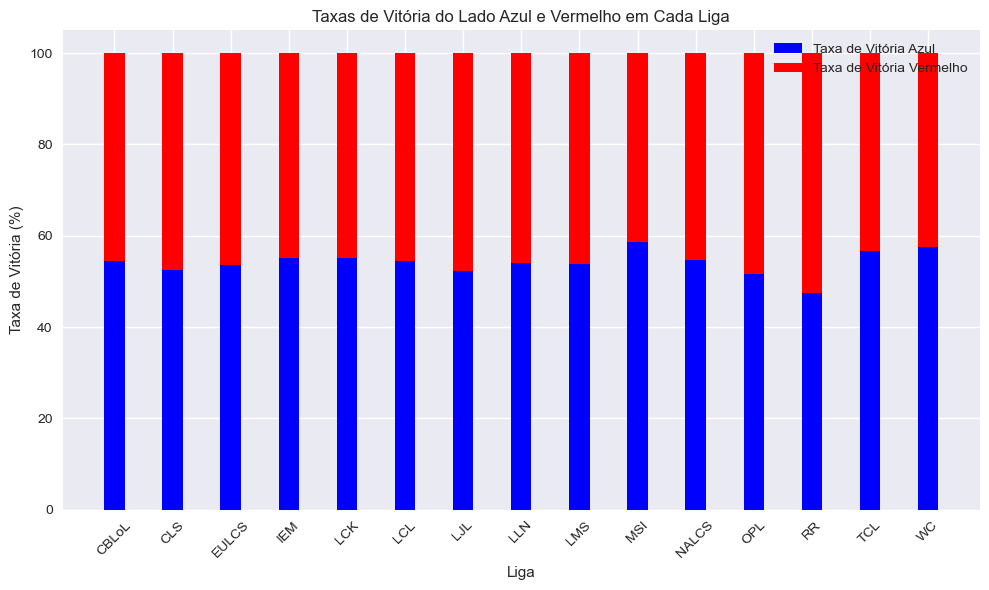

In [144]:
# Dados por liga (League)
grouped_data = lol_data.groupby('League')

# Armazenar as taxas de vitória do lado Azul e Vermelho e as respectivas ligas
blue_win_rates = []
red_win_rates = []
leagues = []

for league, group in grouped_data:    
    blue_win_rate = (group['bResult'].sum() / len(group)) * 100
    red_win_rate = (group['rResult'].sum() / len(group)) * 100
    
    # Armazenando as taxas de vitória e liga atual nas respectivas listas
    blue_win_rates.append(blue_win_rate)
    red_win_rates.append(red_win_rate)
    leagues.append(league)

plt.figure(figsize=(10, 6))

# Configuração dos eixos e barras do gráfico
x = range(len(leagues))
width = 0.35
plt.bar(x, blue_win_rates, width, label='Taxa de Vitória Azul', color='blue')
plt.bar(x, red_win_rates, width, label='Taxa de Vitória Vermelho', color='red', bottom=blue_win_rates)
plt.xticks(x, leagues, rotation=45)
plt.xlabel('Liga')
plt.ylabel('Taxa de Vitória (%)')
plt.title('Taxas de Vitória do Lado Azul e Vermelho em Cada Liga')

# Adição da legenda e ajuste de layout
plt.legend()
plt.tight_layout()

# Exibição do gráfico
plt.show()


A análise dos gráficos torna mais fácil de verificar que em basicamente todas as ligas e campeonatos o lado azul demonstra ter uma predominancia de vitórias. No mundial WC(League of Legends World Championship), que é o campeonato mais importante do jogo, também temos um alto percentual de vitórias do lado Azul (57.47%), Esses resultados contradizem a expectativa de que, em um ambiente competitivo tão elevado, o lado em que os jogadores estão posicionados não deveria exercer um impacto significativo nas chances de vitória. No entanto, os dados mostram claramente que o lado azul mantém uma vantagem considerável mesmo nesse contexto, apesar de contar apenas com os melhores jogadores do mundo.

### Analisando o percentual de vitórias de cada lado, em cada um dos anos para cada uma das ligas 

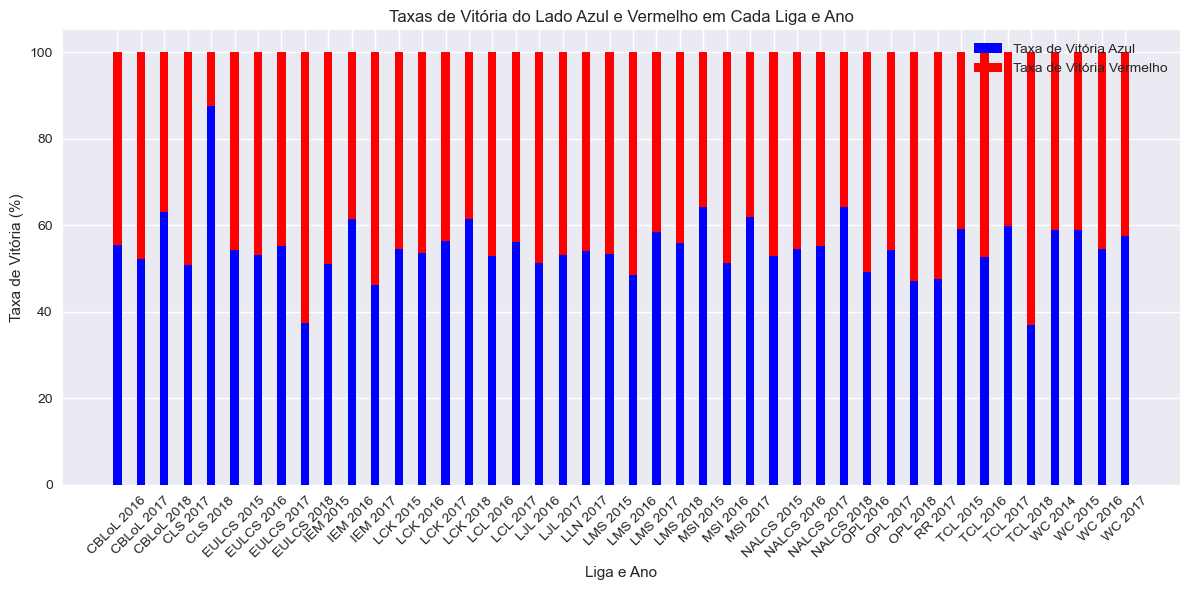

In [145]:
# Dados por liga (League) e ano (Year)
grouped_data = lol_data.groupby(['League', 'Year'])

blue_win_rates = []
red_win_rates = []
leagues_years = []

# Combinação de liga e ano para verificiar o % de Wins
for (league, year), group in grouped_data:
    blue_win_rate = (group['bResult'].sum() / len(group)) * 100
    red_win_rate = (group['rResult'].sum() / len(group)) * 100
    
    blue_win_rates.append(blue_win_rate)
    red_win_rates.append(red_win_rate)
    leagues_years.append(f"{league} {year}")


plt.figure(figsize=(12, 6))

x = range(len(leagues_years))
width = 0.35
plt.bar(x, blue_win_rates, width, label='Taxa de Vitória Azul', color='blue')
plt.bar(x, red_win_rates, width, label='Taxa de Vitória Vermelho', color='red', bottom=blue_win_rates)

plt.xticks(x, leagues_years, rotation=45)
plt.xlabel('Liga e Ano')
plt.ylabel('Taxa de Vitória (%)')
plt.title('Taxas de Vitória do Lado Azul e Vermelho em Cada Liga e Ano')

plt.legend()
plt.tight_layout()

plt.show()


### Visualziação do percentual de vitórias para cada uma das ligas

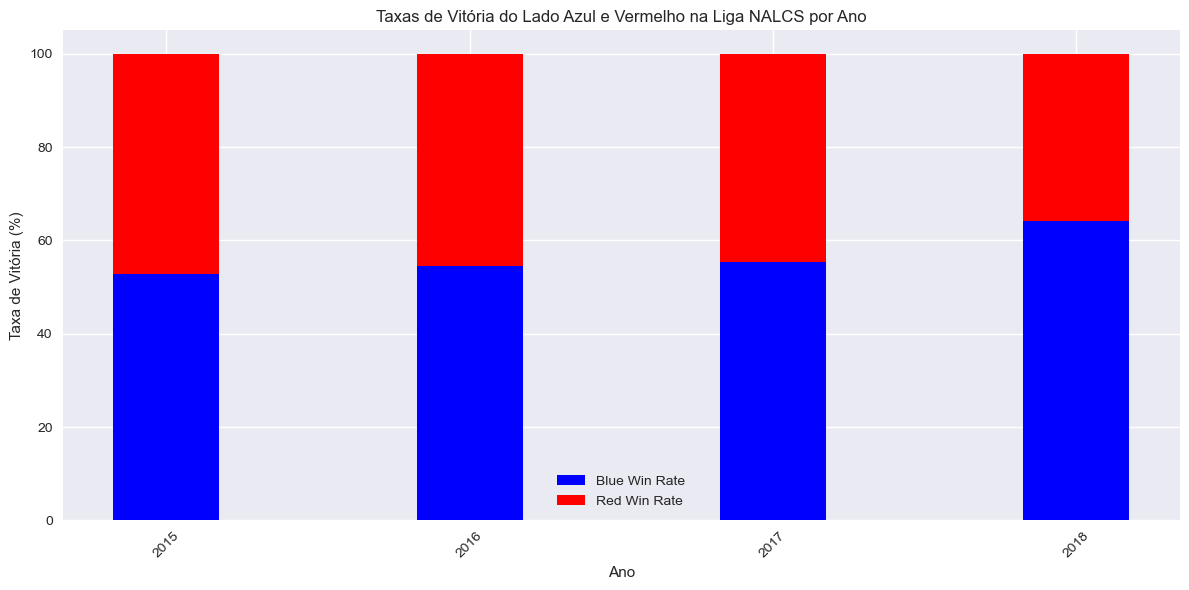

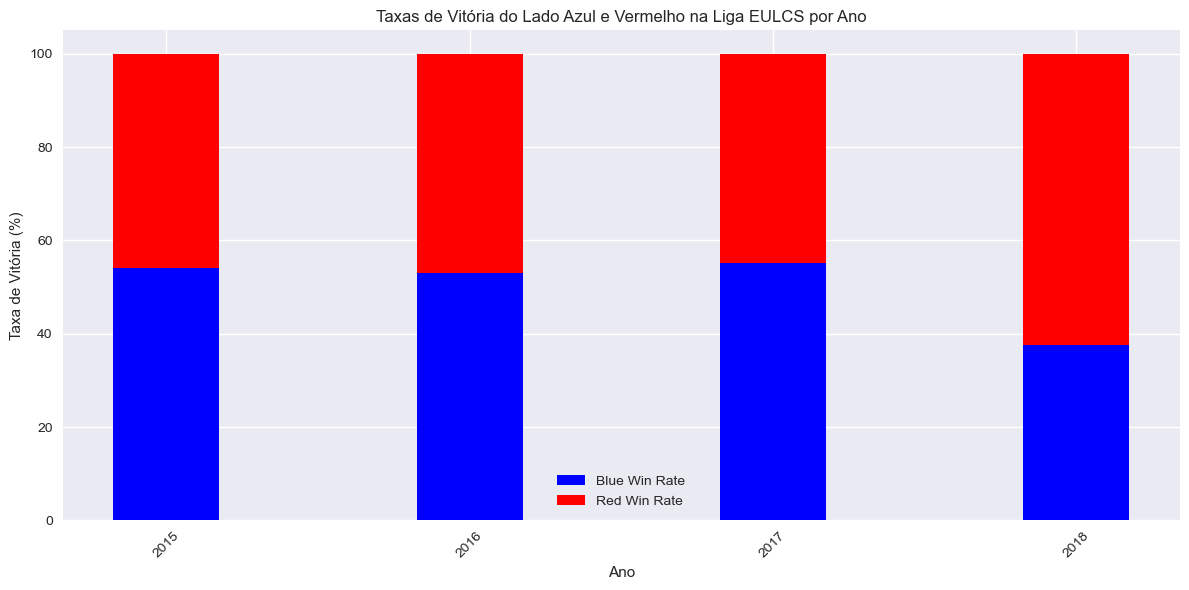

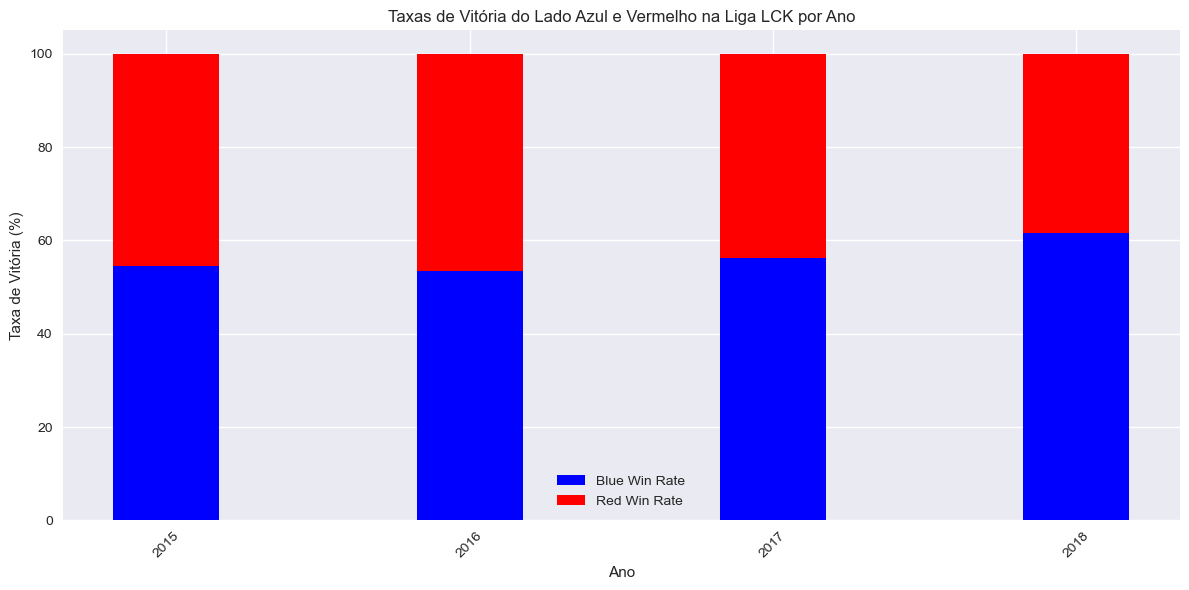

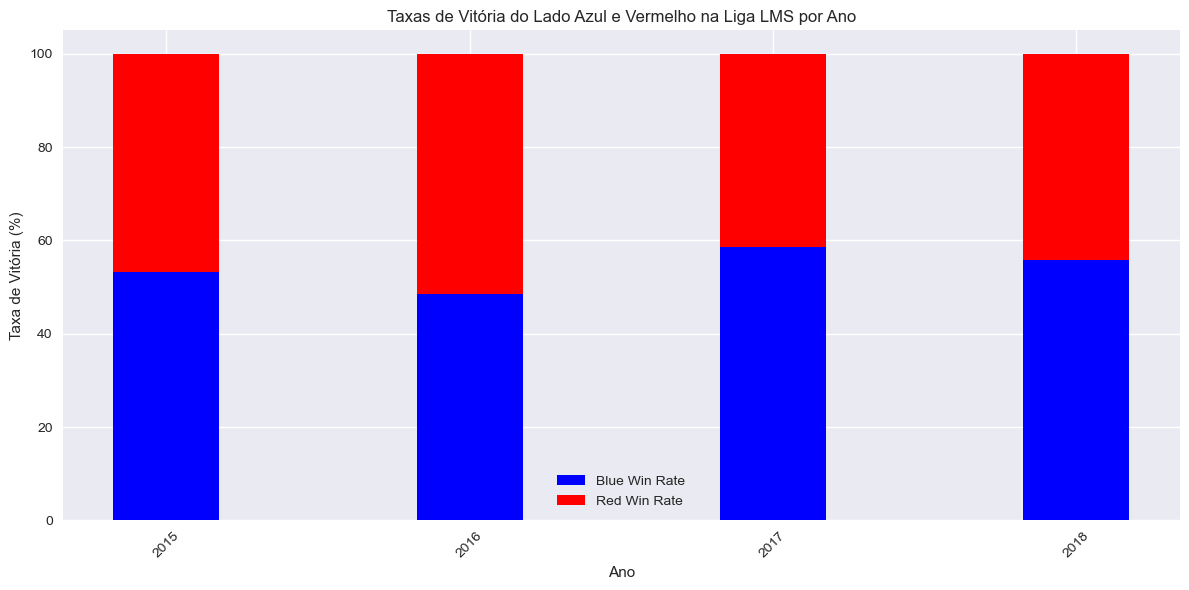

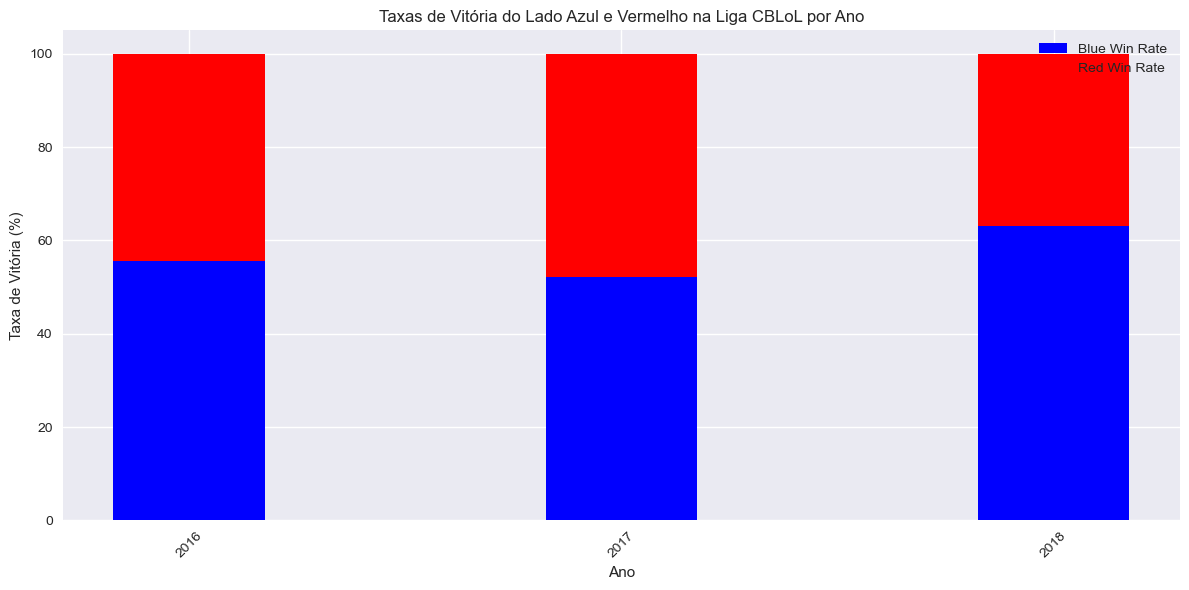

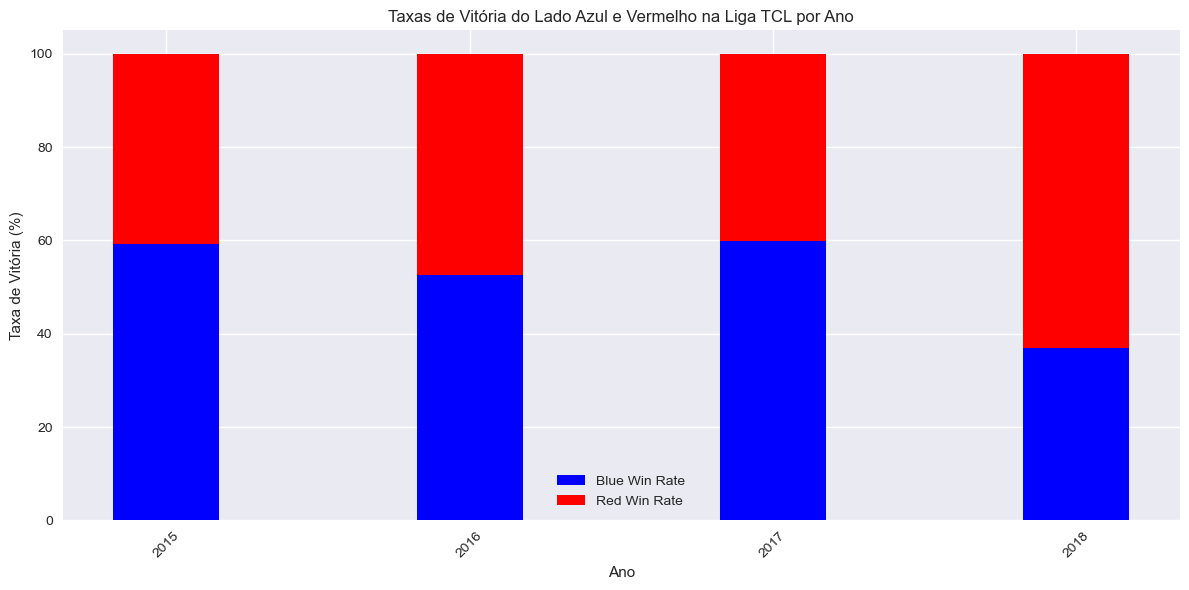

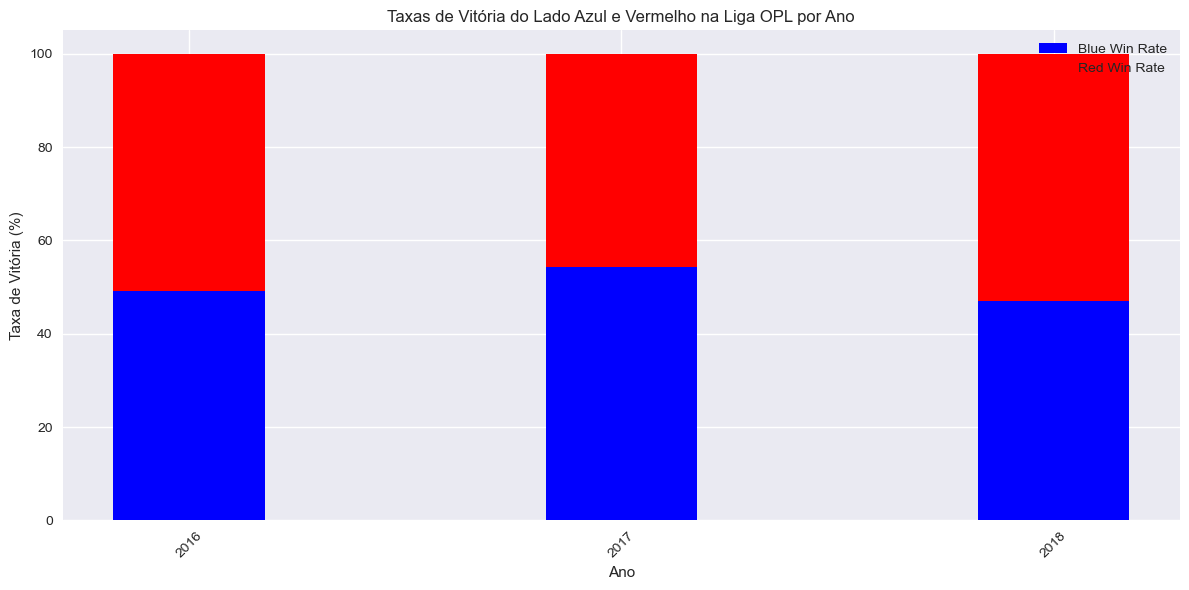

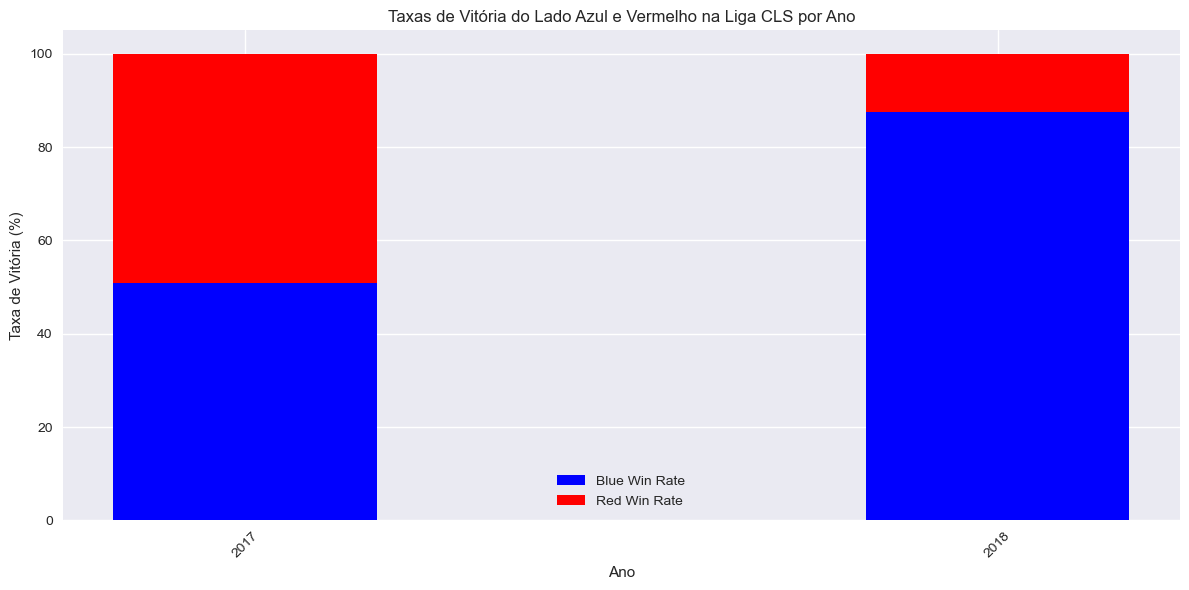

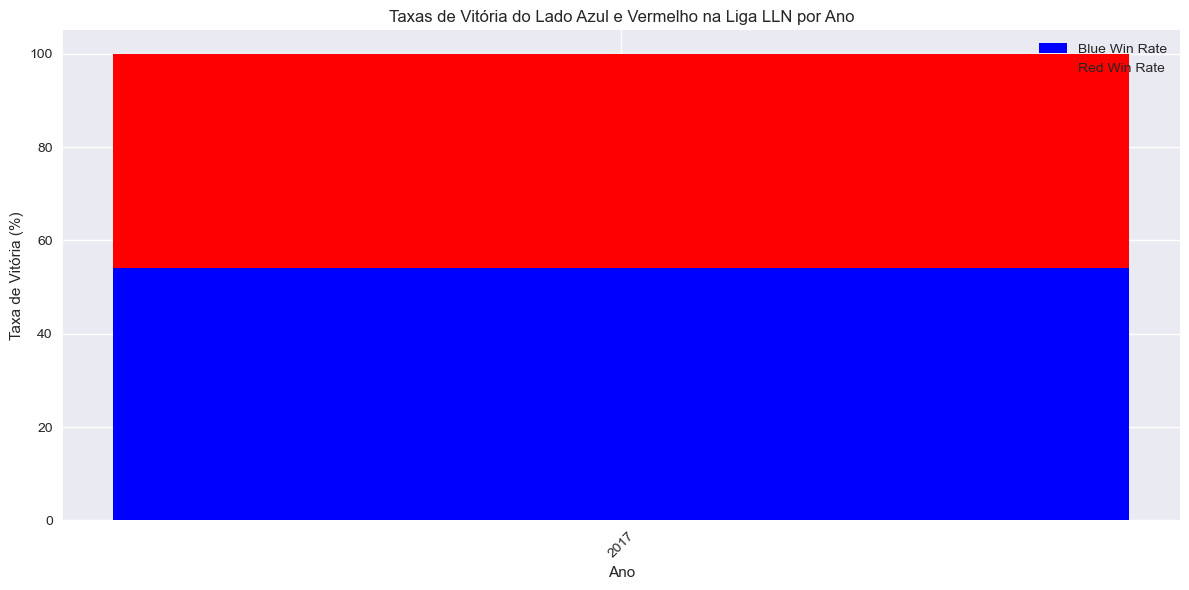

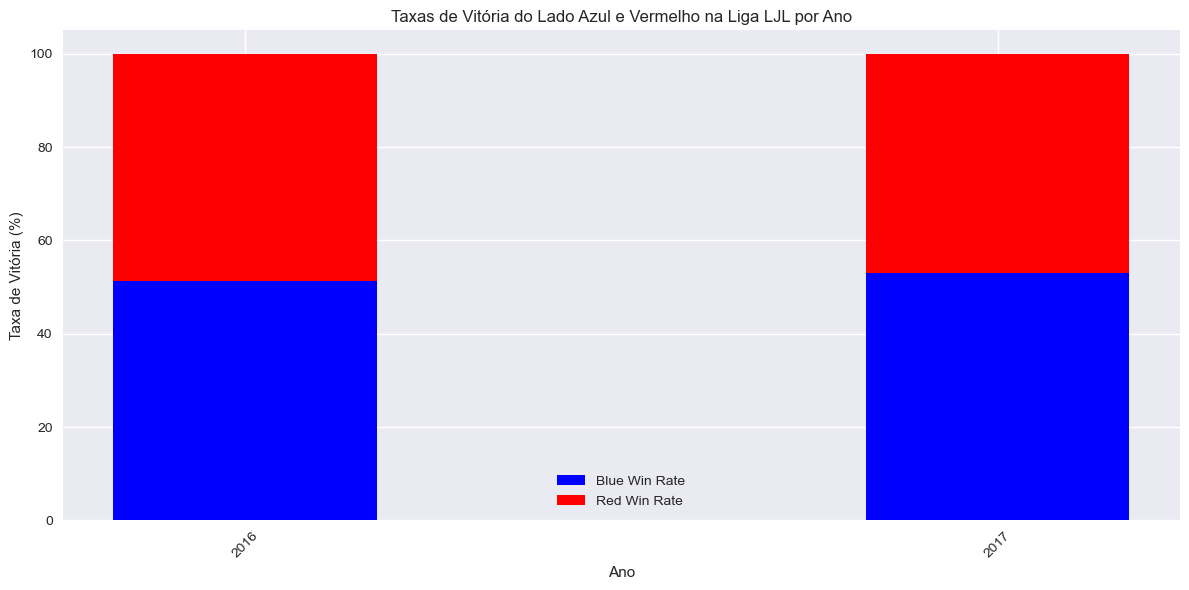

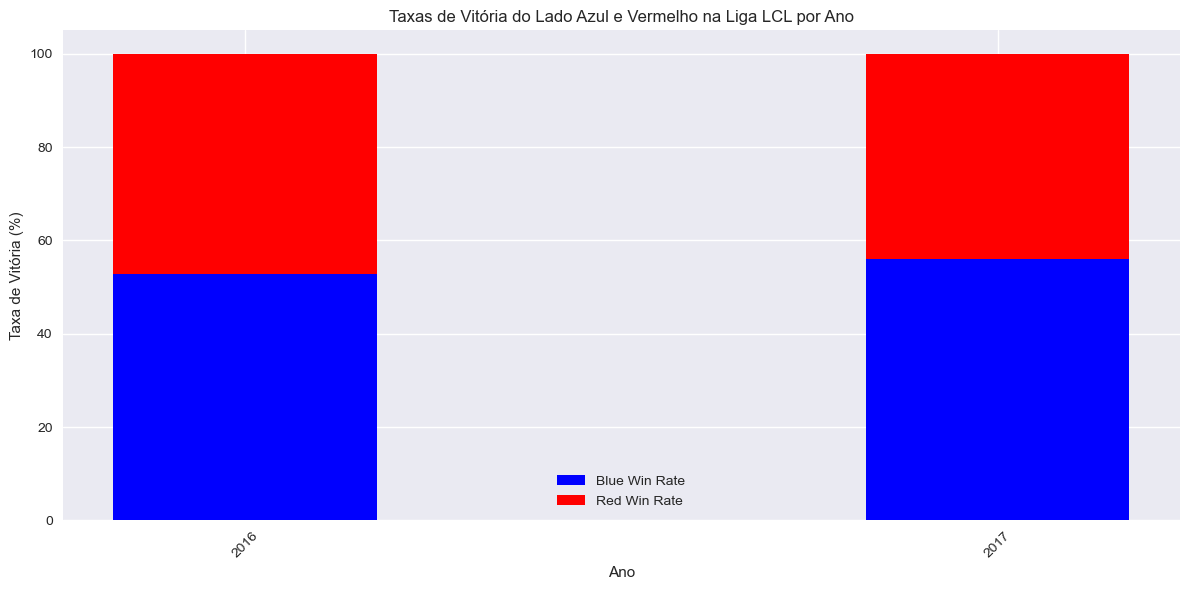

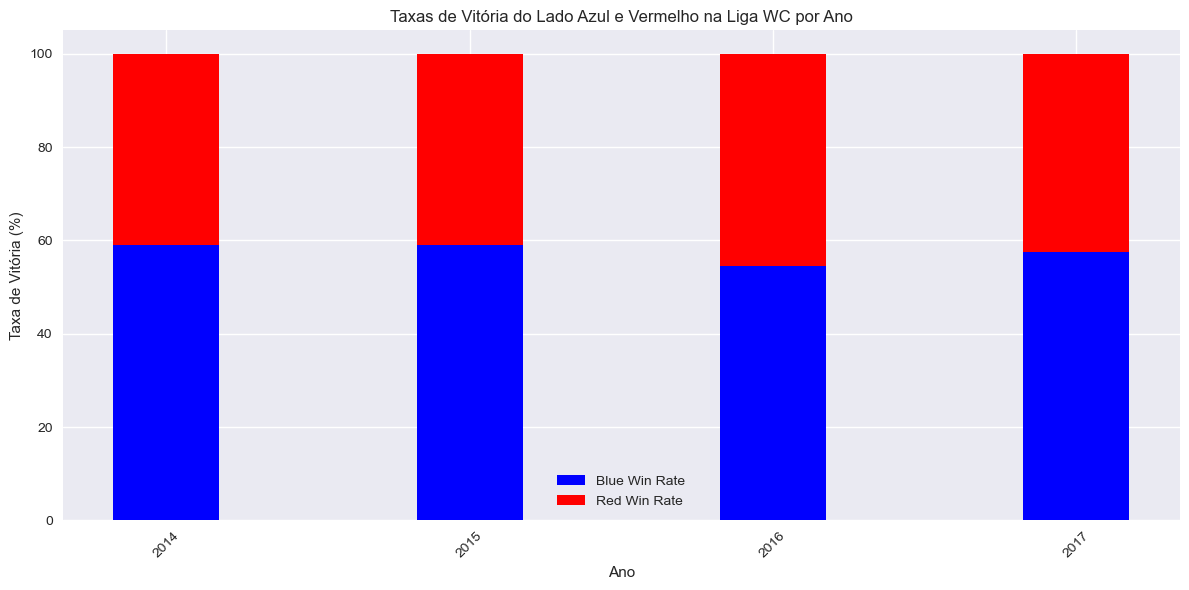

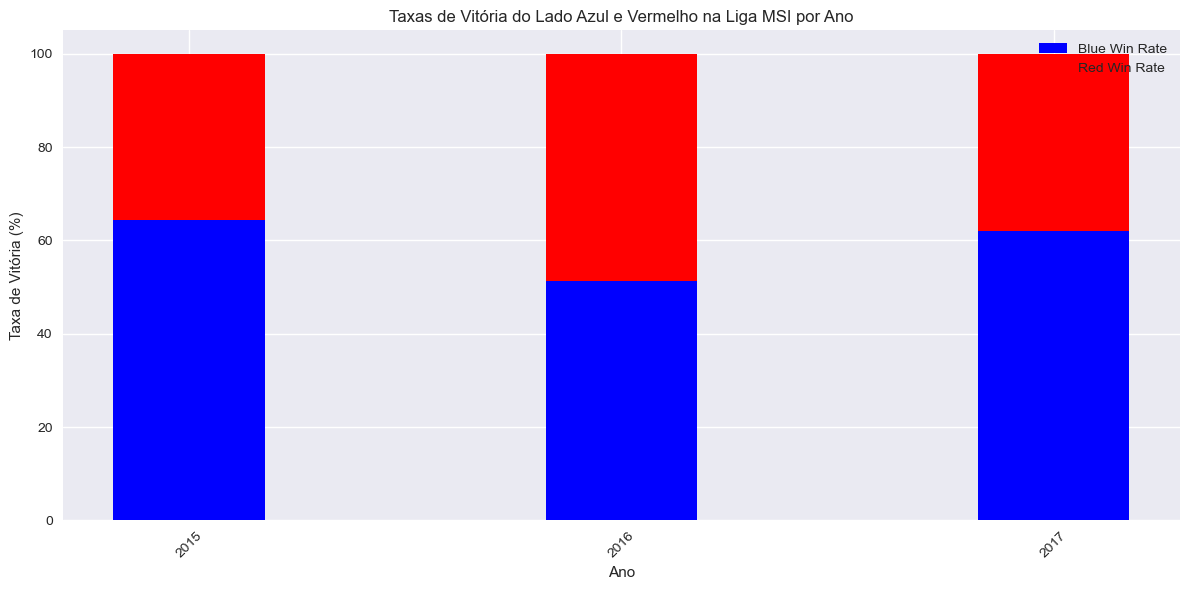

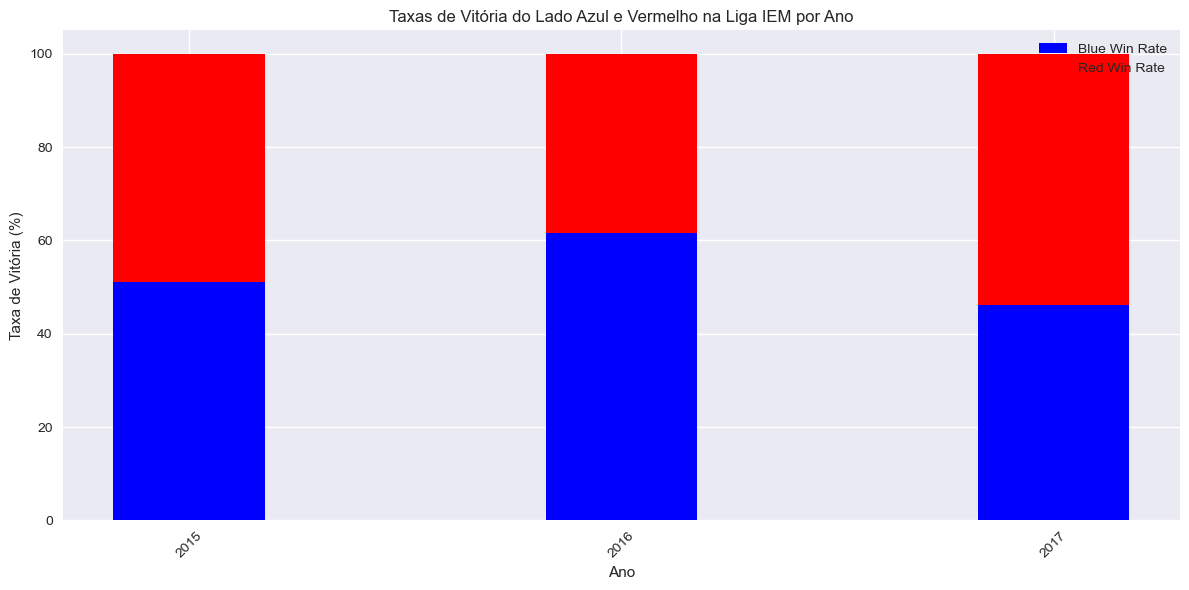

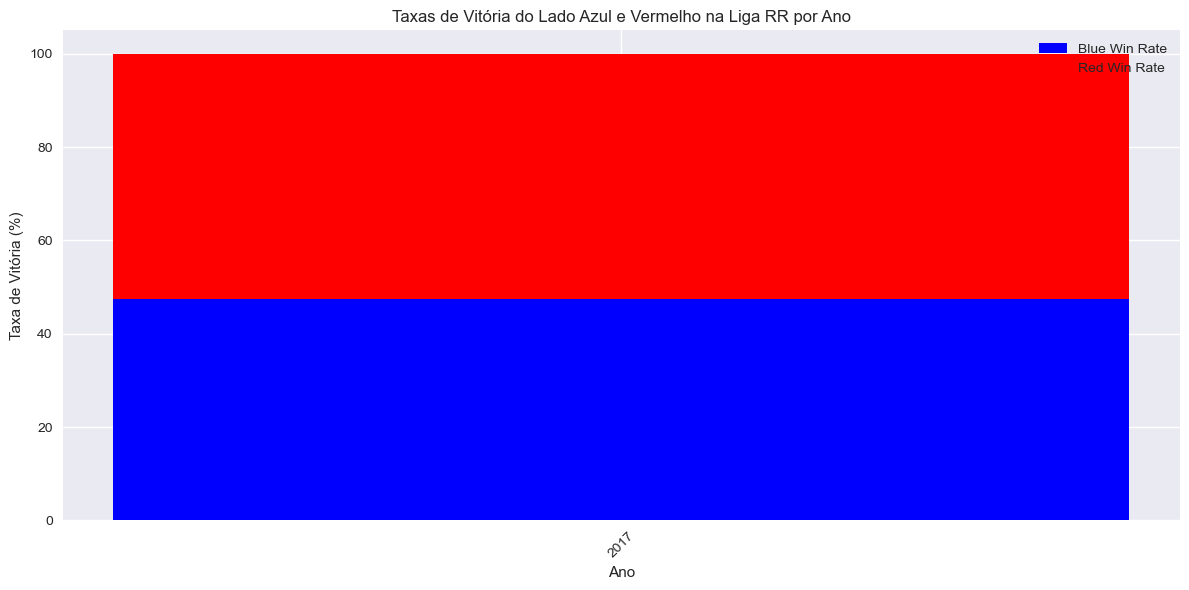

In [146]:
# Ligas presentes nos dados
unique_leagues = lol_data['League'].unique()

for league in unique_leagues:
    
    # Filtrando os dados apenas para a liga atual e agrupando por ano 
    grouped_data = lol_data[lol_data['League'] == league].groupby('Year')
    
    blue_win_rates = []
    red_win_rates = []
    years = []
    
    # Iteração em cada um dos anos
    for year, group in grouped_data:        
        blue_win_rate = (group['bResult'].sum() / len(group)) * 100        
        red_win_rate = (group['rResult'].sum() / len(group)) * 100
        
        blue_win_rates.append(blue_win_rate)
        red_win_rates.append(red_win_rate)
        years.append(year)
    
    plt.figure(figsize=(12, 6))
    
    x = range(len(years))
    width = 0.35
    plt.bar(x, blue_win_rates, width, label='Blue Win Rate', color='blue')
    plt.bar(x, red_win_rates, width, label='Red Win Rate', color='red', bottom=blue_win_rates)
    
    plt.xticks(x, years, rotation=45)
    plt.xlabel('Ano')
    plt.ylabel('Taxa de Vitória (%)')
    plt.title(f'Taxas de Vitória do Lado Azul e Vermelho na Liga {league} por Ano')
    plt.legend()
    plt.tight_layout()
    
    plt.show()


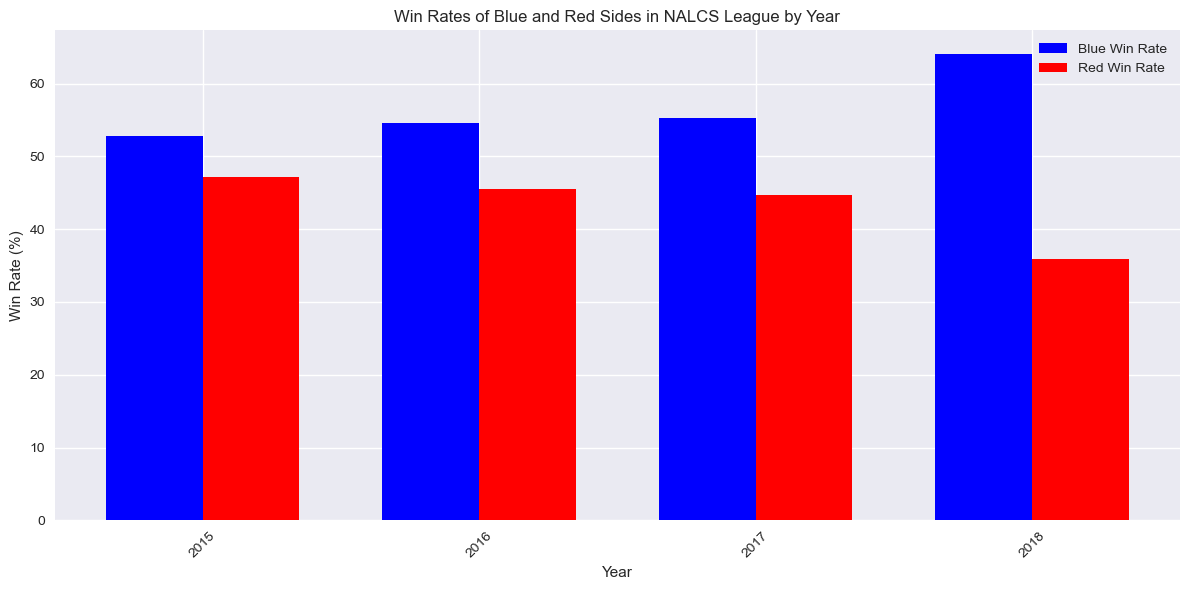

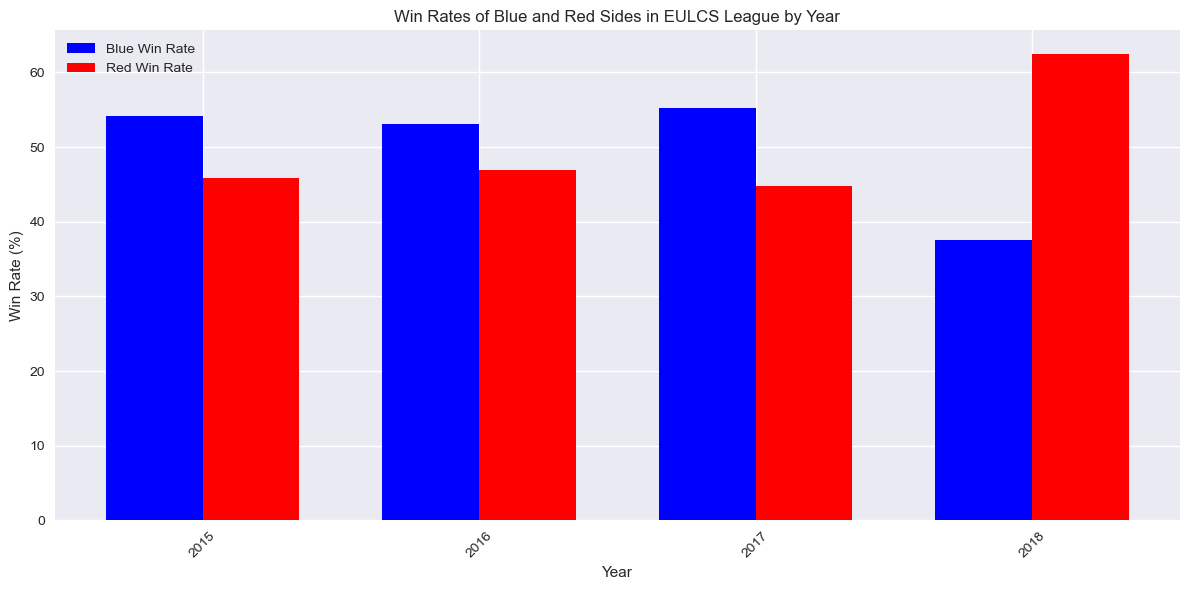

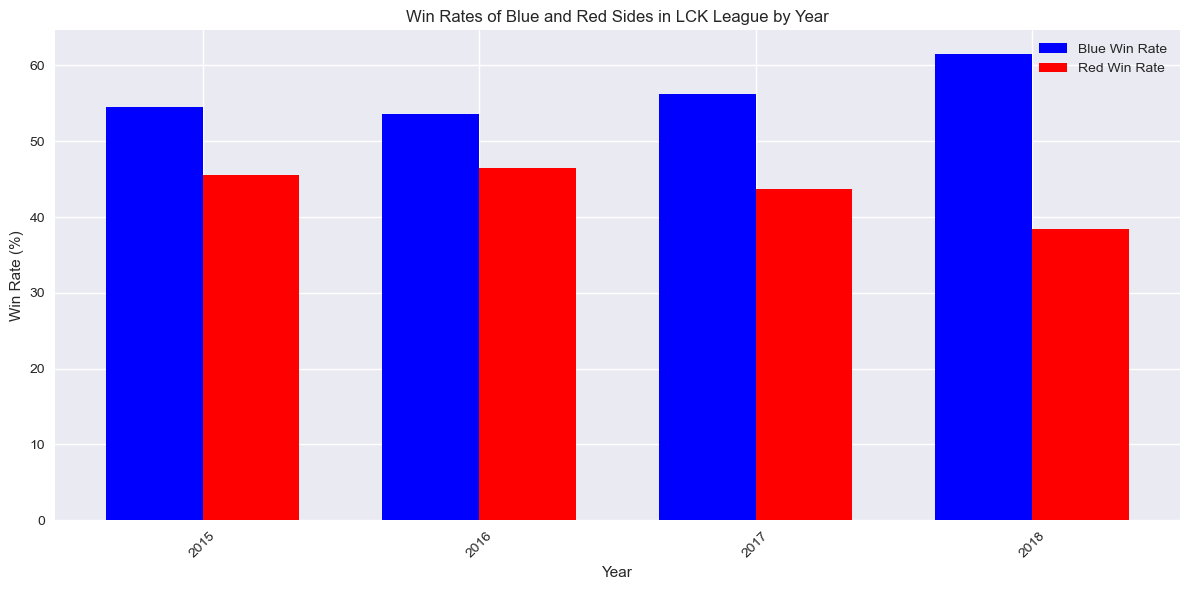

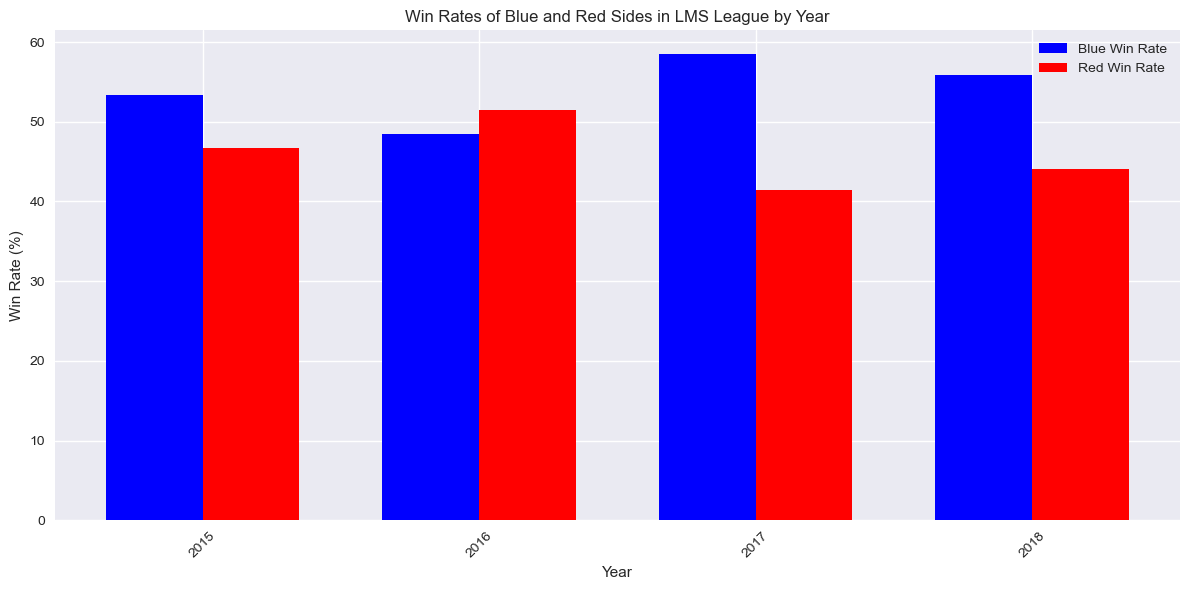

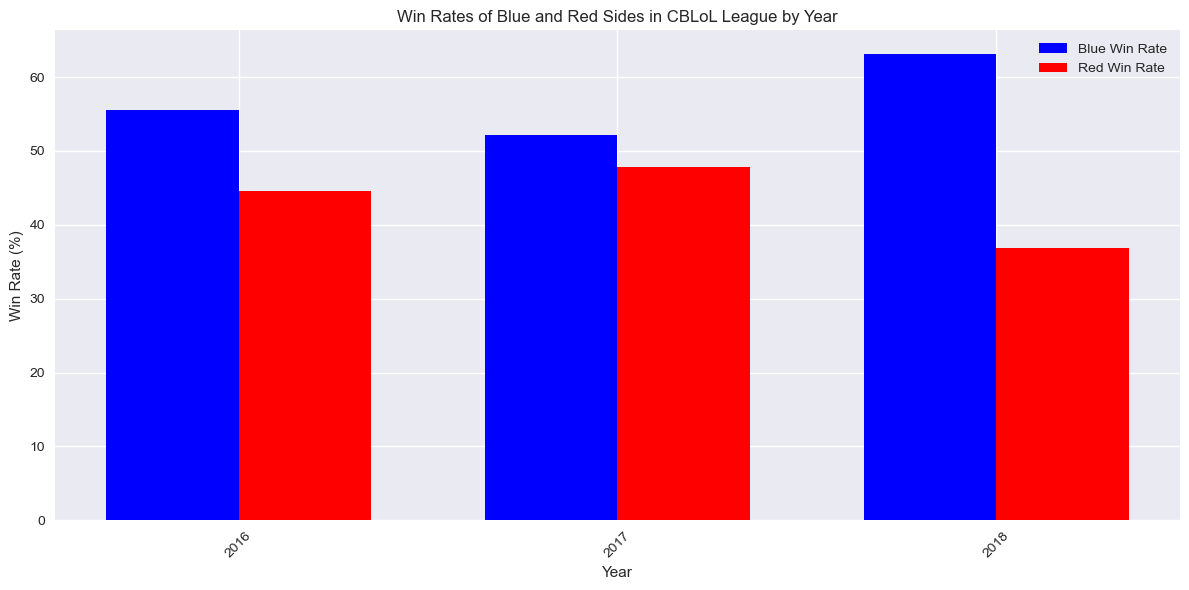

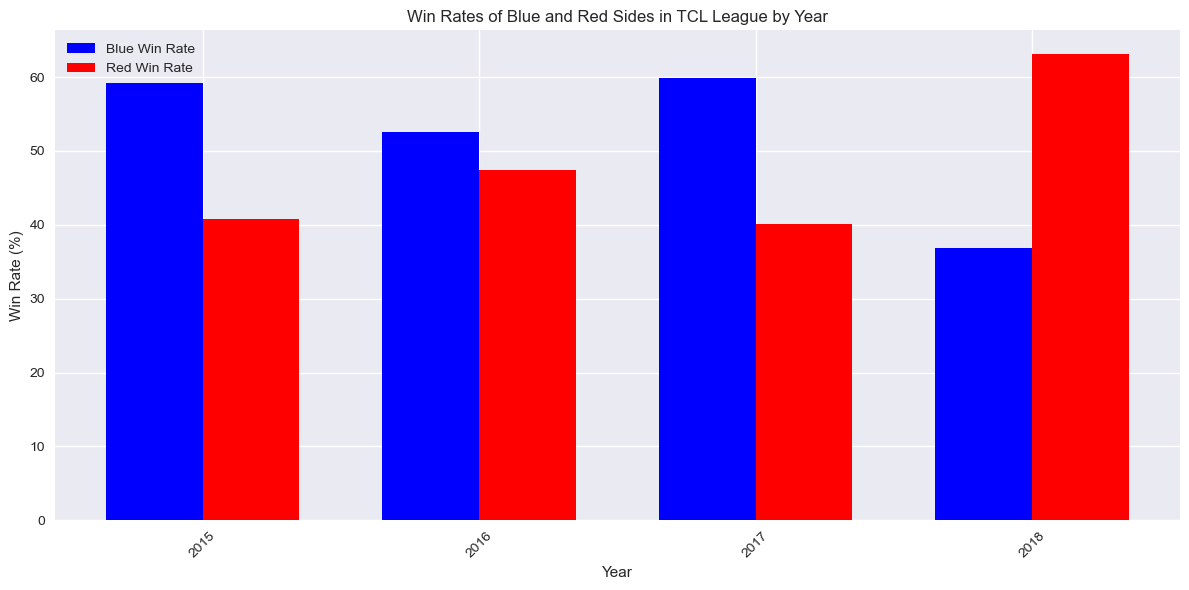

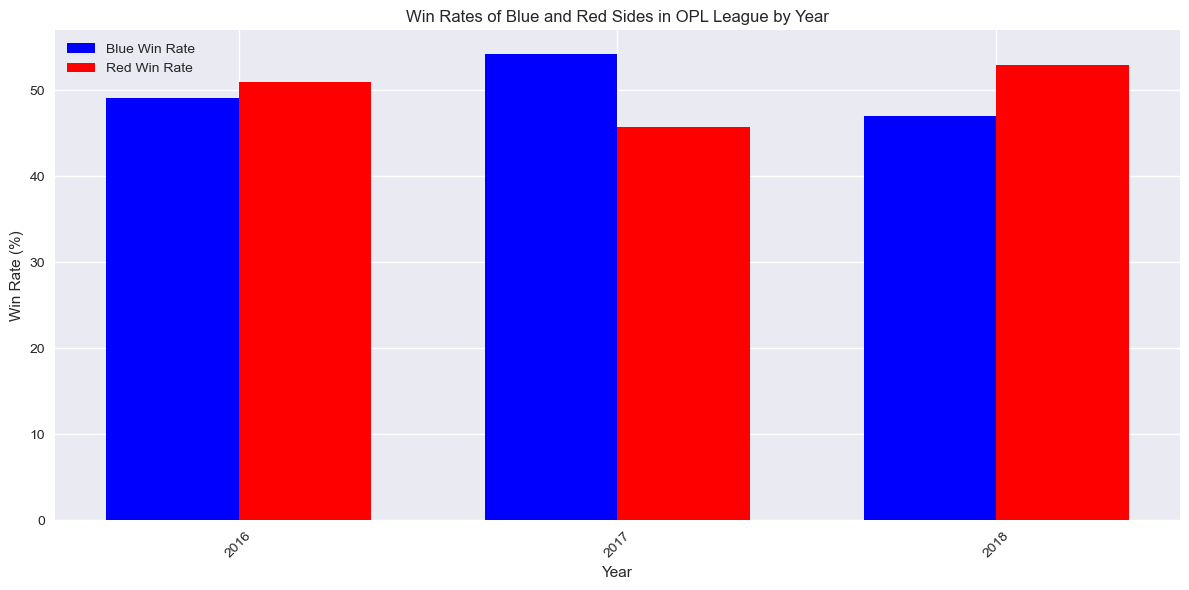

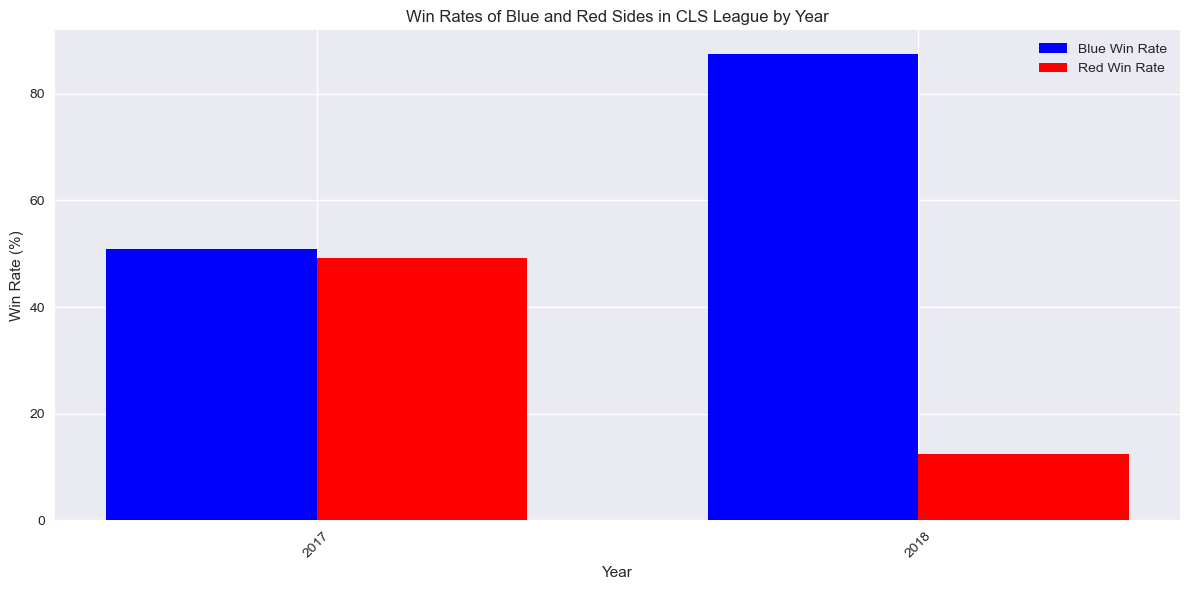

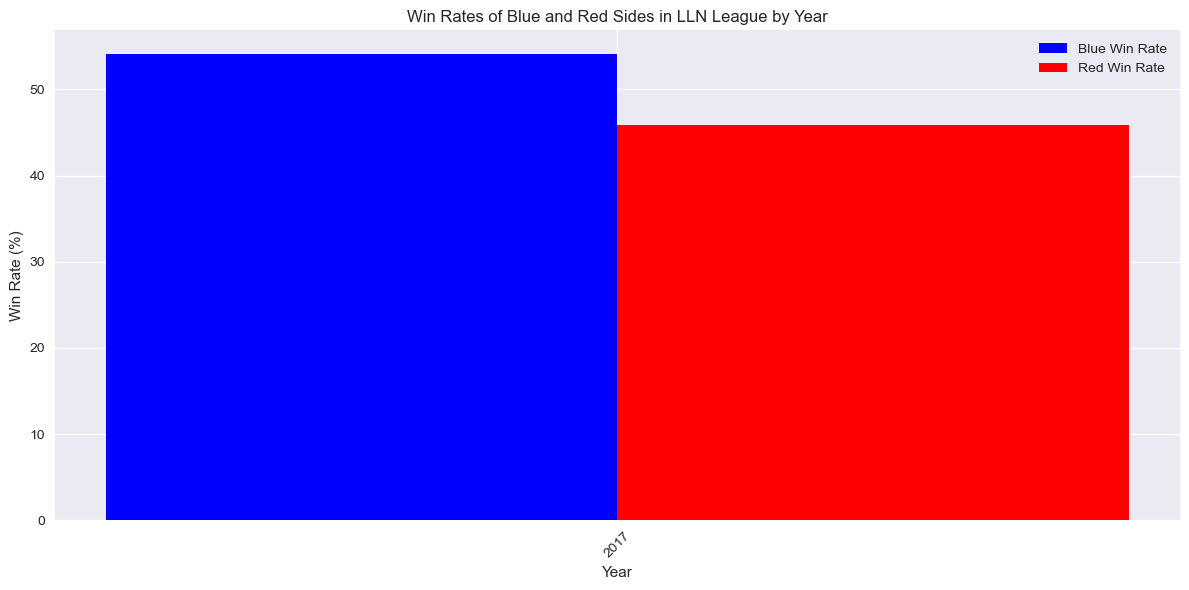

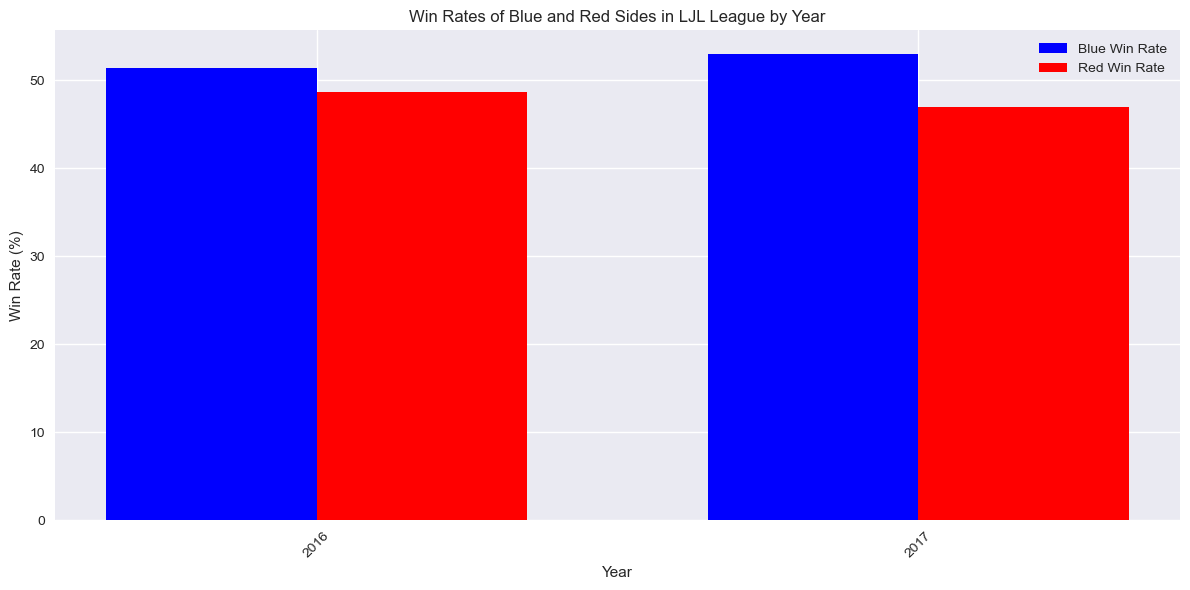

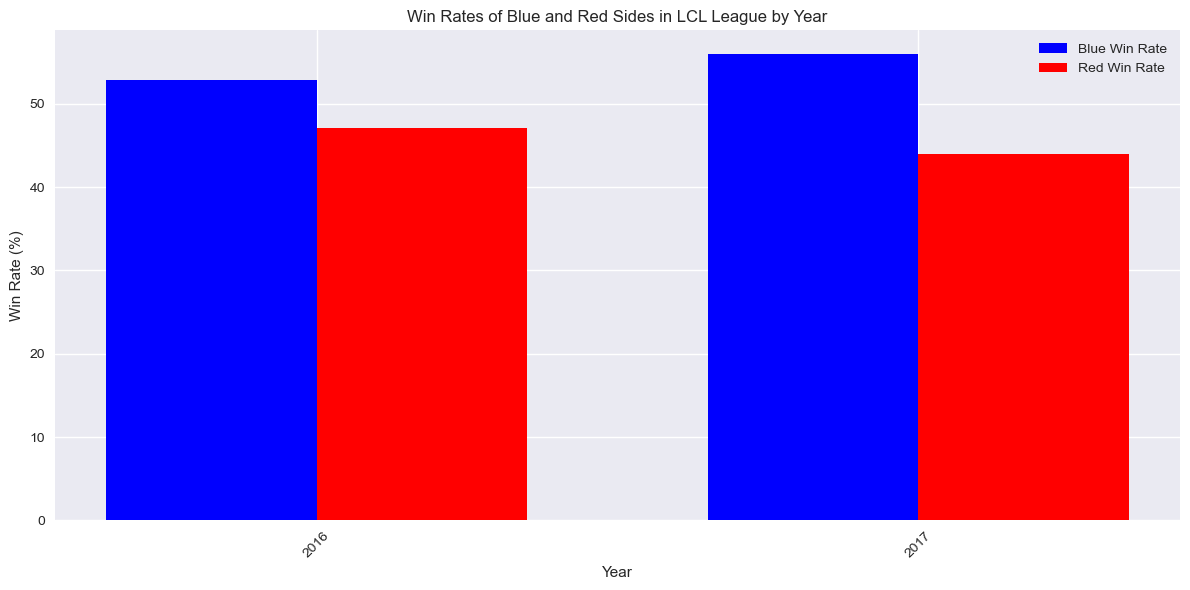

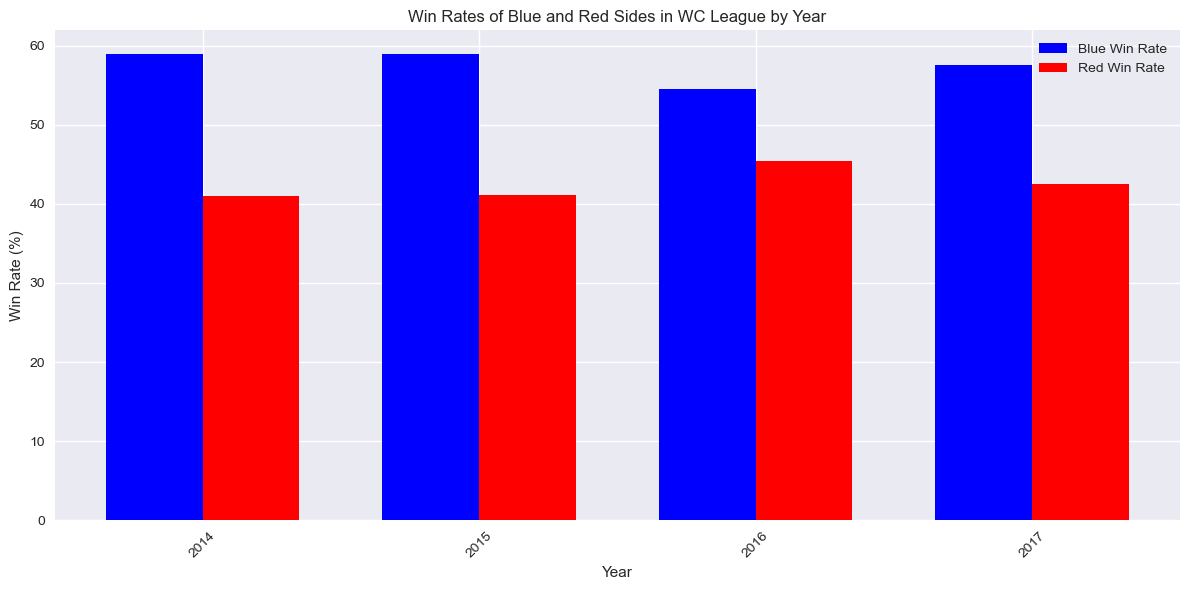

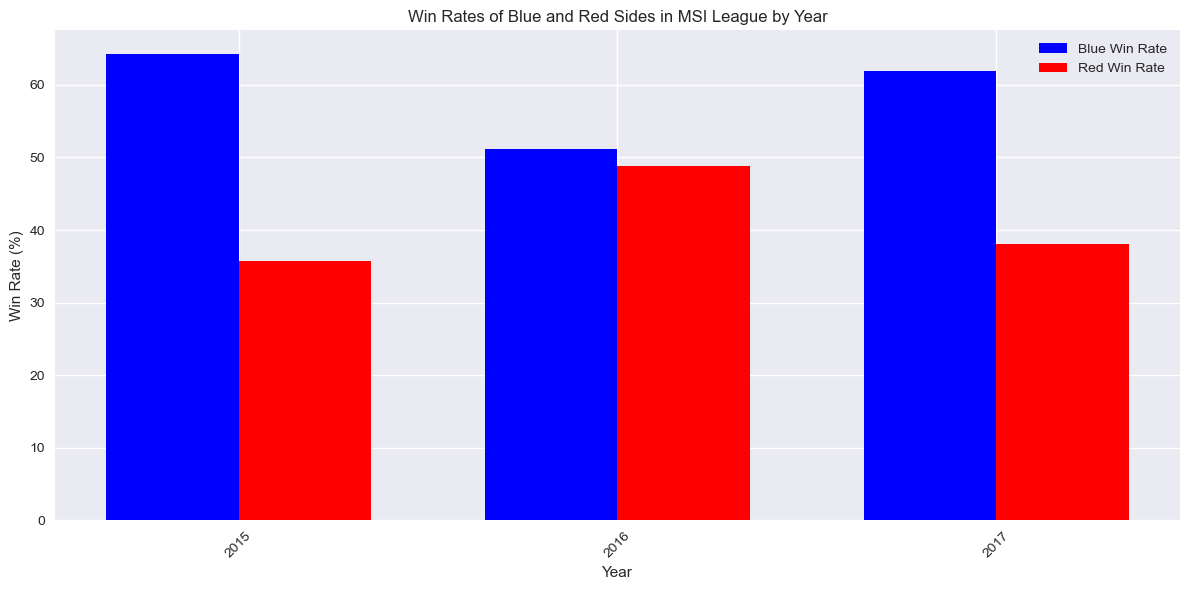

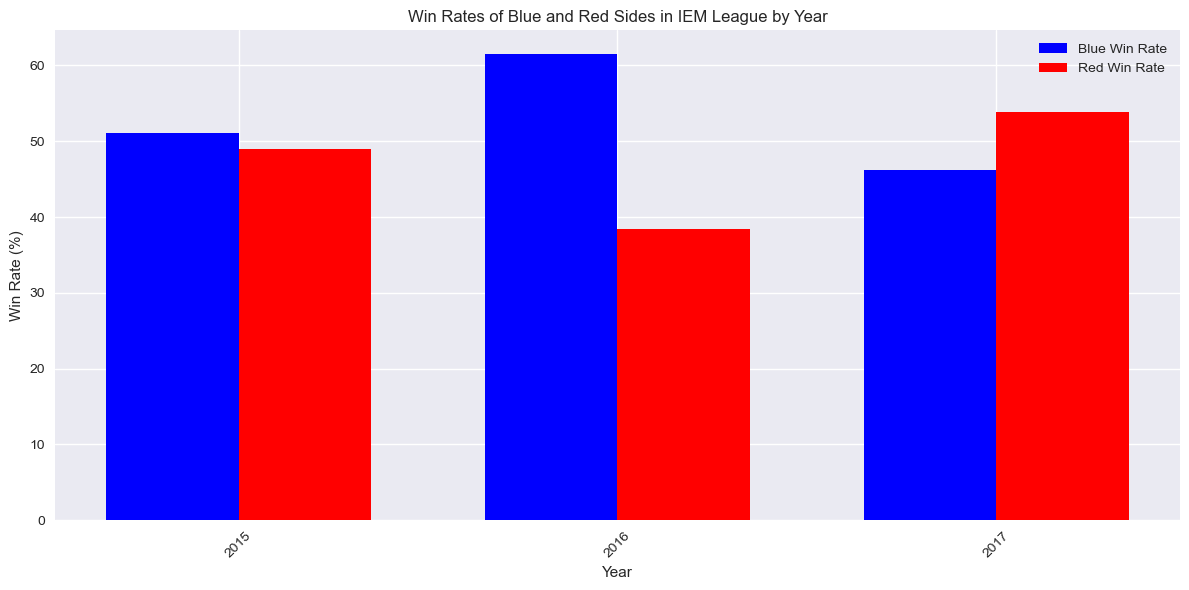

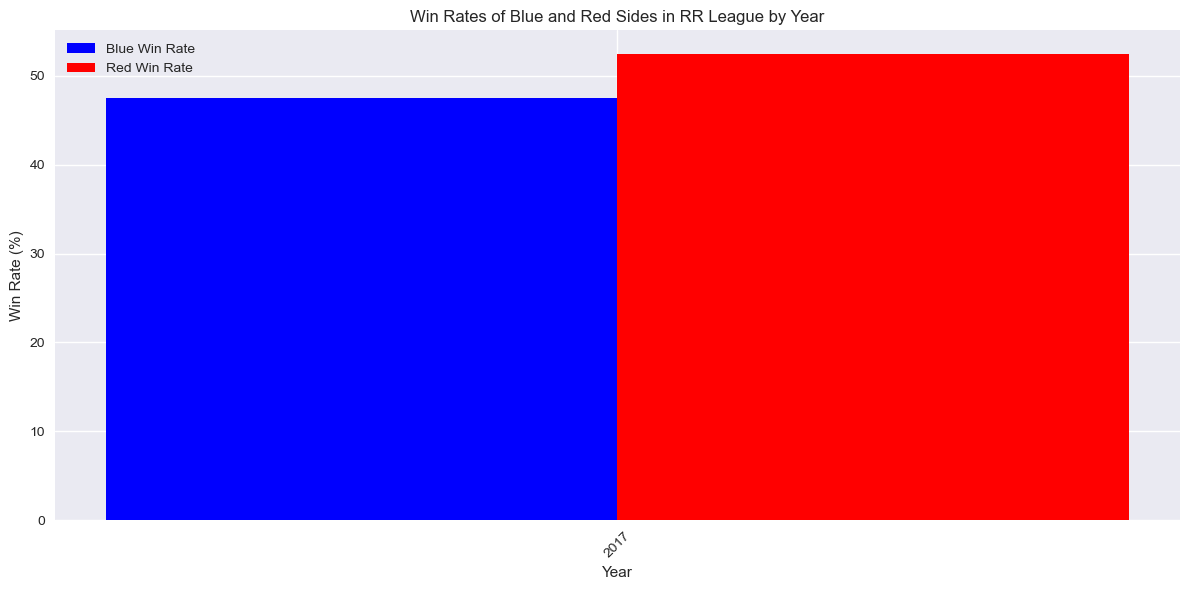

In [147]:
unique_leagues = lol_data['League'].unique()

for league in unique_leagues:

    league_data = lol_data[lol_data['League'] == league]


    grouped_data = league_data.groupby('Year')

    blue_win_rates = []
    red_win_rates = []
    years = []


    for year, group in grouped_data:
        blue_win_rate = (group['bResult'].sum() / len(group)) * 100
        red_win_rate = (group['rResult'].sum() / len(group)) * 100
        blue_win_rates.append(blue_win_rate)
        red_win_rates.append(red_win_rate)
        years.append(year)


    plt.figure(figsize=(12, 6))
    x = np.arange(len(years)) 
    width = 0.35
    plt.bar(x - width/2, blue_win_rates, width, label='Blue Win Rate', color='blue')
    plt.bar(x + width/2, red_win_rates, width, label='Red Win Rate', color='red')
    plt.xticks(x, years, rotation=45)
    plt.xlabel('Year')
    plt.ylabel('Win Rate (%)')
    plt.title(f'Win Rates of Blue and Red Sides in {league} League by Year')
    plt.legend()
    plt.tight_layout()
    plt.show()


Agora que já foi possivel observar que o lado azul tem mais vitórias vou levantar vou tentar encontrar possíveis motivos. Nesta etapa, vou investigar a relação entre o lado em que as equipes estão e a __realização dos principais objetivos do jogo.__ Dentro do LoL, existem três objetivos cruciais: Arauto, Dragão e Barão. Priorizar e conseguir realizar esses objetivos é fundamental para alcançar a vitória. A hipótese inicial é que o lado azul possui uma vantagem na realização desses objetivos, resultando em um maior número de conquistas por parte azuis em comparação com as equipes vermelhas.

### Dragões feitos por cada um dos lados

In [148]:
# Calcular o número total de dragões feitos por cada lado
drags_data = lol_data.copy()
drags_data = drags_data[['rDragons', 'bDragons']]

def sum_numbers_in_list_of_lists(lst):
    lst = ast.literal_eval(lst)
    return len(lst)

# Criação das colunas 'rDragons_sum' e 'bDragons_sum'
drags_data['rDragons_sum'] = drags_data['rDragons'].apply(sum_numbers_in_list_of_lists)
drags_data['bDragons_sum'] = drags_data['bDragons'].apply(sum_numbers_in_list_of_lists)

total_rDragons = drags_data['rDragons_sum'].sum()
total_bDragons = drags_data['bDragons_sum'].sum()

print(f'Total rDragons: {total_rDragons}')
print(f'Total bDragons: {total_bDragons}')


Total rDragons: 14658
Total bDragons: 14127


### Numero de barons para cada side

In [149]:
# Calcular o número total de barões feitos por cada lado
barons_data = lol_data.copy()
barons_data = barons_data[['rBarons', 'bBarons']]

def sum_numbers_in_list_of_lists(lst):
    lst = ast.literal_eval(lst)
    return len(lst)

# Criação das colunas 'rBarons_sum' e 'bBarons_sum'
barons_data['rBarons_sum'] = barons_data['rBarons'].apply(sum_numbers_in_list_of_lists)
barons_data['bBarons_sum'] = barons_data['bBarons'].apply(sum_numbers_in_list_of_lists)

total_rBarons = barons_data['rBarons_sum'].sum()
total_bBarons = barons_data['bBarons_sum'].sum()

print(f'Total rBarons: {total_rBarons}')
print(f'Total bBarons: {total_bBarons}')


Total rBarons: 5571
Total bBarons: 5524


### Numero de arautos para cada side

In [150]:
heralds_data = lol_data.copy()
# Calcular o número total de arautos feitos por cada lado
heralds_data = heralds_data[['rHeralds', 'bHeralds']]

def sum_numbers_in_list_of_lists(lst):
    lst = ast.literal_eval(lst)
    return len(lst)

# Criar novas colunas 'rHeralds_sum' e 'bHeralds_sum'
heralds_data['rHeralds_sum'] = heralds_data['rHeralds'].apply(sum_numbers_in_list_of_lists)
heralds_data['bHeralds_sum'] = heralds_data['bHeralds'].apply(sum_numbers_in_list_of_lists)

total_rHeralds = heralds_data['rHeralds_sum'].sum()
total_bHeralds = heralds_data['bHeralds_sum'].sum()

print(f'Total rHeralds: {total_rHeralds}')
print(f'Total bHeralds: {total_bHeralds}')


Total rHeralds: 1887
Total bHeralds: 2481


Aqui temos mais um resultado que me surpreendeu. O lado vermelho faz mais barões e principalmente dragões que o lado azul. O lado azul tem uma diferença significativa na realização dos arautos mas entre os três principais objetivos ele é o menos significantes quando o assunto é impacto na partida. Os Dragões e Barões oferecem benefícios significativos, como aumento de estatísticas, buffs de equipe e potencial para avançar no jogo. Então seguirei minha análise levantando outras possíveis ideias de o que poderia estar aumentando o número de vitórias para o lado azul.

### Campeões mais pickados em cada um dos sides

In [151]:
most_picked_champions = {'Red': {}, 'Blue': {}}

column_names = {
    'Top': {'Blue': 'blueTopChamp', 'Red': 'redTopChamp'},
    'Jungle': {'Blue': 'blueJungleChamp', 'Red': 'redJungleChamp'},
    'Mid': {'Blue': 'blueMiddleChamp', 'Red': 'redMiddleChamp'},
    'ADC': {'Blue': 'blueADCChamp', 'Red': 'redADCChamp'},
    'Support': {'Blue': 'blueSupportChamp', 'Red': 'redSupportChamp'}
}

#dicionário para armazenar o campeão mais escolhido para cada função em cada lado
for role, columns in column_names.items():
    for side in ['Red', 'Blue']:
        most_picked_champion = lol_data[columns[side]].mode().values[0]
        count = lol_data[lol_data[columns[side]] == most_picked_champion][columns[side]].count()       
        most_picked_champions[side][role] = {'Champion': most_picked_champion, 'Count': count}

for side in ['Red', 'Blue']:
    print(f"Most Picked Champions for the {side} Side:")
    for role in column_names.keys():
        champion = most_picked_champions[side][role]['Champion']
        count = most_picked_champions[side][role]['Count']
        print(f"{role}: {champion} (Count: {count})")
    print()

Most Picked Champions for the Red Side:
Top: Maokai (Count: 880)
Jungle: RekSai (Count: 1199)
Mid: Orianna (Count: 671)
ADC: Sivir (Count: 888)
Support: Braum (Count: 1036)

Most Picked Champions for the Blue Side:
Top: Maokai (Count: 827)
Jungle: RekSai (Count: 1123)
Mid: Orianna (Count: 643)
ADC: Lucian (Count: 797)
Support: Braum (Count: 1079)



Esses dados mostram uma semelhança nos campeões mais escolhidos para cada posição nos lados Blue e Red, com Maokai, Rek'Sai, Orianna e Braum aparecendo consistentemente em ambas as equipes. No entanto, algumas pequenas diferenças nas escolhas de ADC sugerem preferências ligeiramente distintas entre os lados, mas acredito que essas não impactam no maior número de vitórias para o blueside. É importante ressaltar que esses dados são específicos para um determinado período de tempo e podem variar conforme o metajogo e as atualizações do jogo ocorrem.

In [152]:
top_picked_champions = {'Red': {}, 'Blue': {}}

column_names = {
    'Top': {'Blue': 'blueTopChamp', 'Red': 'redTopChamp'},
    'Jungle': {'Blue': 'blueJungleChamp', 'Red': 'redJungleChamp'},
    'Mid': {'Blue': 'blueMiddleChamp', 'Red': 'redMiddleChamp'},
    'ADC': {'Blue': 'blueADCChamp', 'Red': 'redADCChamp'},
    'Support': {'Blue': 'blueSupportChamp', 'Red': 'redSupportChamp'}
}

# coletando os três campeões mais escolhidos para cada posição em cada lado
for role, columns in column_names.items():
    for side in ['Red', 'Blue']:
        picked_champions = lol_data[columns[side]].value_counts().head(3)
        

        top_picked_champions[side][role] = picked_champions

for side in ['Red', 'Blue']:
    print(f"Top 3 Most Picked Champions for the {side} Side:")
    for role in column_names.keys():
        champions = top_picked_champions[side][role]
        print(f"{role}:")
        for champion, count in champions.items():
            print(f"- {champion} (Count: {count})")
    print()

Top 3 Most Picked Champions for the Red Side:
Top:
- Maokai (Count: 880)
- Gnar (Count: 665)
- Shen (Count: 604)
Jungle:
- RekSai (Count: 1199)
- Gragas (Count: 1104)
- Elise (Count: 995)
Mid:
- Orianna (Count: 671)
- Viktor (Count: 604)
- Corki (Count: 518)
ADC:
- Sivir (Count: 888)
- Ashe (Count: 814)
- Lucian (Count: 798)
Support:
- Braum (Count: 1036)
- Thresh (Count: 968)
- Alistar (Count: 856)

Top 3 Most Picked Champions for the Blue Side:
Top:
- Maokai (Count: 827)
- Shen (Count: 657)
- Gnar (Count: 625)
Jungle:
- RekSai (Count: 1123)
- Elise (Count: 1065)
- Gragas (Count: 990)
Mid:
- Orianna (Count: 643)
- Viktor (Count: 621)
- Syndra (Count: 526)
ADC:
- Lucian (Count: 797)
- Sivir (Count: 794)
- Ashe (Count: 754)
Support:
- Braum (Count: 1079)
- Thresh (Count: 953)
- Alistar (Count: 765)



No lado Blue (Azul), as escolhas para cada posição são semelhantes às do lado Red, mas com algumas diferenças nas contagens de escolhas. Os campeões mais escolhidos para o topo são Maokai, Shen e Gnar, enquanto para a jungle são Rek'Sai, Elise e Gragas. Orianna, Viktor e Syndra são os meios mais escolhidos, e Lucian, Sivir e Ashe são os ADCs mais escolhidos. Braum, Thresh e Alistar são os suportes mais populares. Novamente essas diferentes escolhas não devem impactar tanto na diferença de win entre o Blue e o Red side. 

### Campeões priorizados no pick em cada um dos sides

In [153]:
# Create a dictionary to store the top 5 champions picked first for each side
top_picked_first_champions = {'Red': [], 'Blue': []}

# Get the column names for the first champion picked
column_names = {
    'Blue': 'blueBans',
    'Red': 'redBans'
}

# Iterate over each side
for side in ['Red', 'Blue']:
    # Get the bans for the side
    bans = lol_data[column_names[side]].str.split(',').apply(lambda x: x[0].strip())
    
    # Count the frequency of each champion
    champion_counts = bans.value_counts().head(5)
    
    # Store the top picked first champions for the side
    top_picked_first_champions[side] = list(champion_counts.index)

# Print the top 5 champions picked first for each side
for side in ['Red', 'Blue']:
    print(f"Top 5 Champions Picked First for {side} Side:")
    for champion in top_picked_first_champions[side]:
        print(f"- {champion}")
    print()

Top 5 Champions Picked First for Red Side:
- ['Zac'
- ['Kalista'
- ['Leblanc'
- ['Nidalee'
- ['Ryze'

Top 5 Champions Picked First for Blue Side:
- ['Leblanc'
- ['Shen'
- ['Malzahar'
- ['Nidalee'
- ['Ryze'



A seleção de campeões (champion select) no cenário competitivo de League of Legends (LoL) é uma etapa crucial antes do início de uma partida. Durante essa fase, as equipes têm a oportunidade de escolher e banir campeões de acordo com suas estratégias, composições de equipe e conhecimento do metajogo atual. A seleção de campeões muitas vezes envolve uma visão estratégica entre as equipes, com cada uma tentando esconder suas intenções e reagir às escolhas do oponente. Isso pode incluir a troca de posições esperadas para confundir a equipe adversária, selecionar campeões versáteis que podem se adequar a várias posições ou responder diretamente às escolhas inimigas com counters específicos. 

## Conclusão hipótese 3

Com base na hipótese apresentada, de que o Blue Side é o lado mais fácil de jogar no League of Legends devido ao controle da câmera, é importante considerar que essa percepção pode ser influenciada por diferentes fatores e variáveis do jogo. Considerando os dados apresentados, que indicam um total de 4146 vitórias para o lado Azul e 3474 vitórias para o lado Vermelho ao longo dos anos, observamos uma discrepância em favor do lado Azul. Essa diferença sugere que o lado Azul teve um desempenho ligeiramente superior em termos de vitórias acumuladas.

Embora não tenhamos uma explicação definitiva para essa diferença, é possível que diversos fatores tenham influenciado esses resultados. Além do possível impacto do controle da câmera no lado Azul, como mencionado anteriormente, outras variáveis, como estratégias de equipe, preferências de campeões, conhecimento do mapa e habilidades individuais dos jogadores, também podem ter contribuído para essas estatísticas.

É importante ressaltar que a disparidade nas vitórias não é necessariamente uma evidência conclusiva de que o lado Azul seja inerentemente mais fácil de jogar. O balanceamento do jogo é uma preocupação constante para os desenvolvedores, e eles trabalham para garantir que ambos os lados tenham oportunidades equilibradas de vitória.